## Questions
**1- Convergence**

**2- Formula for class_weight**

**3- weights = np.linspace(0.05,0.95,20)**

**4- {0: x, 1: 1.0-x} for x in weights**

# Logistic Regression

## Importing the libraries

In [1]:
import warnings
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from yellowbrick.classifier import ClassificationReport,DiscriminationThreshold,ROCAUC
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,roc_auc_score,plot_roc_curve, plot_precision_recall_curve, auc, precision_recall_curve,PrecisionRecallDisplay
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest,chi2, mutual_info_classif, f_regression,SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
np.set_printoptions(threshold=sys.maxsize)

## Importing the dataset

In [2]:
dataset = pd.read_excel('ROPAIprojectcombinedFINAL3-10-21ea.xlsx', header=None)
print(dataset)

         0          1        2       3             4            5   \
0      ID #  Family ID       GA     NaN  Birth weight   Death Date   
1       NaN        NaN  (Weeks)  (Days)          (gm)          NaN   
2    IH0001          1       26       1          1100            1   
3    IH0002          2       27       3          1080          NaN   
4    IH0003          3       26       4          1021          NaN   
..      ...        ...      ...     ...           ...          ...   
227  IH0225        194       29       1          1295          NaN   
228  IH0226        194       29       1          1125          NaN   
229  IH0227        195       27       6           880          NaN   
230  IH0228        196       29       0          1420          NaN   
231  IH0229        197       28       2           865          NaN   

                       6    7      8                  9   ...             43  \
0      Race & Ethinicity   Sex  SGA %  Prenatal Steroids  ...  Comment_Max36   

In [3]:
## Finding the NAN (missing)values in dataset
dataset.isnull().sum()

0       1
1       1
2       0
3       1
4       0
5     212
6       1
7       1
8       1
9       1
10      1
11      0
12     57
13    200
14    204
15    208
16    209
17    209
18    216
19    216
20    216
21    227
22    227
23    227
24    230
25    230
26    230
27    231
28    230
29    230
30    230
31    199
32    230
33    230
34    230
35     56
36     56
37     56
38     57
39     57
40     56
41     57
42     57
43    219
44     20
45     20
46     20
47     22
48     22
49     20
50     22
51     22
52    186
dtype: int64

In [4]:
## Finding the duplicate variables
dataset.columns.duplicated()
#dataset[dataset[12]].isnull() # shows the Nan Values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [5]:
dataset.drop(dataset.columns[6], axis=1, inplace=True)

In [6]:
#Excelfile=pd.ExcelFile('ROPAIprojectcombinedFINAL3-10-21ea.xlsx')
#print(Excelfile.sheet_names)

In [7]:
#dataset=Excelfile.parse('Sheet1')
#dataset

### Find the Unique variables in a column 

In [8]:
# uniqueValues = dataset[6].unique()
# uniqueValues

In [9]:
# dataset[6]= dataset[6].replace(['Non-Hispanic/ Black','Hiispanic/ white','Non- Hispanic/Asian', 'Hispanic/ white'],['Non- Hispanic/ Black','Hispanic/ White', 'Non- Hispanic/ Asian', 'Hispanic/ White'])
# dataset

In [10]:
# uniqueValues = dataset[6].unique()
# uniqueValues

In [11]:
dataset = dataset.drop(np.r_[0:2,14:53], axis = 1)
dataset

2       3             4            5    7      8   \
0         GA     NaN  Birth weight   Death Date  Sex  SGA %   
1    (Weeks)  (Days)          (gm)          NaN  NaN    NaN   
2         26       1          1100            1    M     94   
3         27       3          1080          NaN    M     65   
4         26       4          1021          NaN    M     75   
..       ...     ...           ...          ...  ...    ...   
227       29       1          1295          NaN    M     58   
228       29       1          1125          NaN    M     33   
229       27       6           880          NaN    M     21   
230       29       0          1420          NaN    F     85   
231       28       2           865          NaN    M     22   

                    9                 10                  11              12  \
0    Prenatal Steroids  Cesarean Section  Multiple Gestation             NaN   
1                  NaN               NaN              Yes/No  No. of Infants   
2                    0                 0                   0             NaN   
3                    1                 0                   0             NaN   
4                    0                 0                   1               2   
..                 ...               ...                 ...             ...   
227                  1                 0                   1               2   
228                  1                 0                   1               2   
229                  1                 1                   0               0   
230                  1                 1                   0               0   
231                  1                 1                   0               0   

                           13  
0          Primary outcome #1  
1    1=Type 1 around 36 weeks  
2                         NaN  
3                         NaN  
4                         NaN  
..                        ...  
227                       NaN  
228                       NaN  
229                       NaN  
230                       NaN  
231                       NaN  

[232 rows x 11 columns]

### Removing string from the first column

In [12]:
# dataset[0]= dataset[0].str.replace("[^0-9]", "")
# #dataset[6]= dataset[6].str.lower()
dataset= dataset.replace(np.nan, 0)
# #dataset[12]= np.where(dataset[12].isnull(),0,1)
dataset

2       3             4            5    7      8   \
0         GA       0  Birth weight   Death Date  Sex  SGA %   
1    (Weeks)  (Days)          (gm)            0    0      0   
2         26       1          1100            1    M     94   
3         27       3          1080            0    M     65   
4         26       4          1021            0    M     75   
..       ...     ...           ...          ...  ...    ...   
227       29       1          1295            0    M     58   
228       29       1          1125            0    M     33   
229       27       6           880            0    M     21   
230       29       0          1420            0    F     85   
231       28       2           865            0    M     22   

                    9                 10                  11              12  \
0    Prenatal Steroids  Cesarean Section  Multiple Gestation               0   
1                    0                 0              Yes/No  No. of Infants   
2                    0                 0                   0               0   
3                    1                 0                   0               0   
4                    0                 0                   1               2   
..                 ...               ...                 ...             ...   
227                  1                 0                   1               2   
228                  1                 0                   1               2   
229                  1                 1                   0               0   
230                  1                 1                   0               0   
231                  1                 1                   0               0   

                           13  
0          Primary outcome #1  
1    1=Type 1 around 36 weeks  
2                           0  
3                           0  
4                           0  
..                        ...  
227                         0  
228                         0  
229                         0  
230                         0  
231                         0  

[232 rows x 11 columns]

### Headers List

In [13]:
list(dataset.columns.values)

[2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13]

### Creating a Clean Dataset

In [14]:
dataset.to_excel('newfile.xlsx')
dataset1 = (pd.read_excel('newfile.xlsx', skiprows=1).dropna(how='all', axis=0))
dataset2 = dataset1.iloc[1: , :]
# print(dataset2.astype(int))
dataset2

0  GA 0.1 Birth weight   Death Date Sex  SGA %  Prenatal Steroids  \
1      2  26   1         1100            1   M     94                  0   
2      3  27   3         1080            0   M     65                  1   
3      4  26   4         1021            0   M     75                  0   
4      5  26   4         1000            0   M     71                  0   
5      6  25   3          640            1   F     25                  1   
..   ...  ..  ..          ...          ...  ..    ...                ...   
226  227  29   1         1295            0   M     58                  1   
227  228  29   1         1125            0   M     33                  1   
228  229  27   6          880            0   M     21                  1   
229  230  29   0         1420            0   F     85                  1   
230  231  28   2          865            0   M     22                  1   

     Cesarean Section Multiple Gestation 0.2 Primary outcome #1  
1                   0                  0   0                  0  
2                   0                  0   0                  0  
3                   0                  1   2                  0  
4                   0                  1   2                  0  
5                   0                  1   3                  0  
..                ...                ...  ..                ...  
226                 0                  1   2                  0  
227                 0                  1   2                  0  
228                 1                  0   0                  0  
229                 1                  0   0                  0  
230                 1                  0   0                  0  

[230 rows x 12 columns]

In [15]:
dtypes_dict = { 
    'GA': 'int',
}
dataset3 = dataset2.astype(dtypes_dict) 
dataset3

0  GA 0.1 Birth weight   Death Date Sex  SGA %  Prenatal Steroids  \
1      2  26   1         1100            1   M     94                  0   
2      3  27   3         1080            0   M     65                  1   
3      4  26   4         1021            0   M     75                  0   
4      5  26   4         1000            0   M     71                  0   
5      6  25   3          640            1   F     25                  1   
..   ...  ..  ..          ...          ...  ..    ...                ...   
226  227  29   1         1295            0   M     58                  1   
227  228  29   1         1125            0   M     33                  1   
228  229  27   6          880            0   M     21                  1   
229  230  29   0         1420            0   F     85                  1   
230  231  28   2          865            0   M     22                  1   

     Cesarean Section Multiple Gestation 0.2 Primary outcome #1  
1                   0                  0   0                  0  
2                   0                  0   0                  0  
3                   0                  1   2                  0  
4                   0                  1   2                  0  
5                   0                  1   3                  0  
..                ...                ...  ..                ...  
226                 0                  1   2                  0  
227                 0                  1   2                  0  
228                 1                  0   0                  0  
229                 1                  0   0                  0  
230                 1                  0   0                  0  

[230 rows x 12 columns]

### Remove the first column of Dataset 

In [16]:
# dataset2 = dataset1.drop(np.r_[0], axis = 1)
dataset4 = dataset3.drop(labels=0, axis=1)
dataset4['GA'] = 7 * dataset4['GA']
dataset4

GA 0.1 Birth weight   Death Date Sex  SGA %  Prenatal Steroids  \
1    182   1         1100            1   M     94                  0   
2    189   3         1080            0   M     65                  1   
3    182   4         1021            0   M     75                  0   
4    182   4         1000            0   M     71                  0   
5    175   3          640            1   F     25                  1   
..   ...  ..          ...          ...  ..    ...                ...   
226  203   1         1295            0   M     58                  1   
227  203   1         1125            0   M     33                  1   
228  189   6          880            0   M     21                  1   
229  203   0         1420            0   F     85                  1   
230  196   2          865            0   M     22                  1   

     Cesarean Section Multiple Gestation 0.2 Primary outcome #1  
1                   0                  0   0                  0  
2                   0                  0   0                  0  
3                   0                  1   2                  0  
4                   0                  1   2                  0  
5                   0                  1   3                  0  
..                ...                ...  ..                ...  
226                 0                  1   2                  0  
227                 0                  1   2                  0  
228                 1                  0   0                  0  
229                 1                  0   0                  0  
230                 1                  0   0                  0  

[230 rows x 11 columns]

#### Renaming Headers

In [17]:
dataset5 = dataset4.rename(columns={'GA': 'GA (Weeks)', '0.1': 'GA (Days)','Birth weight': 'Birth weight (gm)',' Death Date':'Death Date','Multiple Gestation':'Multiple Gestation (Yes/No)','0.2':'Multiple Gestation (No. of Infants)' ,'Primary outcome #1':'Primary_outcome1'})
dataset5

GA (Weeks) GA (Days) Birth weight (gm)  Death Date Sex  SGA %  \
1           182         1              1100           1   M     94   
2           189         3              1080           0   M     65   
3           182         4              1021           0   M     75   
4           182         4              1000           0   M     71   
5           175         3               640           1   F     25   
..          ...       ...               ...         ...  ..    ...   
226         203         1              1295           0   M     58   
227         203         1              1125           0   M     33   
228         189         6               880           0   M     21   
229         203         0              1420           0   F     85   
230         196         2               865           0   M     22   

     Prenatal Steroids  Cesarean Section Multiple Gestation (Yes/No)  \
1                    0                 0                           0   
2                    1                 0                           0   
3                    0                 0                           1   
4                    0                 0                           1   
5                    1                 0                           1   
..                 ...               ...                         ...   
226                  1                 0                           1   
227                  1                 0                           1   
228                  1                 1                           0   
229                  1                 1                           0   
230                  1                 1                           0   

    Multiple Gestation (No. of Infants) Primary_outcome1  
1                                     0                0  
2                                     0                0  
3                                     2                0  
4                                     2                0  
5                                     3                0  
..                                  ...              ...  
226                                   2                0  
227                                   2                0  
228                                   0                0  
229                                   0                0  
230                                   0                0  

[230 rows x 11 columns]

### Remove the first Row of Dataset 

In [18]:
# dataset4 = dataset3.drop(labels=0, axis=0)
# dataset4

In [19]:
dataset5.shape

(230, 11)

In [20]:
dataset5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 1 to 230
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   GA (Weeks)                           230 non-null    int64 
 1   GA (Days)                            230 non-null    object
 2   Birth weight (gm)                    230 non-null    object
 3   Death Date                           230 non-null    int64 
 4   Sex                                  230 non-null    object
 5   SGA %                                230 non-null    int64 
 6   Prenatal Steroids                    230 non-null    int64 
 7   Cesarean Section                     230 non-null    int64 
 8   Multiple Gestation (Yes/No)          230 non-null    object
 9   Multiple Gestation (No. of Infants)  230 non-null    object
 10  Primary_outcome1                     230 non-null    object
dtypes: int64(5), object(6)
memory usage: 21.6+ KB

In [21]:
dataset5.dtypes

GA (Weeks)                              int64
GA (Days)                              object
Birth weight (gm)                      object
Death Date                              int64
Sex                                    object
SGA %                                   int64
Prenatal Steroids                       int64
Cesarean Section                        int64
Multiple Gestation (Yes/No)            object
Multiple Gestation (No. of Infants)    object
Primary_outcome1                       object
dtype: object

In [22]:
#dataset5['GA (Weeks+Days)'] = dataset5['GA (Weeks)'] + dataset5['GA (Days)'] 
dataset5['GA (Weeks+Days)'] = dataset5.iloc[:,[0,1]].sum(axis=1)
# Agar datatype object bashe nemitoni 2ta columns ro sum koni, behet zero column mide, baraye halesh aval datatype ro bokon int bas sum kon
dataset5

GA (Weeks) GA (Days) Birth weight (gm)  Death Date Sex  SGA %  \
1           182         1              1100           1   M     94   
2           189         3              1080           0   M     65   
3           182         4              1021           0   M     75   
4           182         4              1000           0   M     71   
5           175         3               640           1   F     25   
..          ...       ...               ...         ...  ..    ...   
226         203         1              1295           0   M     58   
227         203         1              1125           0   M     33   
228         189         6               880           0   M     21   
229         203         0              1420           0   F     85   
230         196         2               865           0   M     22   

     Prenatal Steroids  Cesarean Section Multiple Gestation (Yes/No)  \
1                    0                 0                           0   
2                    1                 0                           0   
3                    0                 0                           1   
4                    0                 0                           1   
5                    1                 0                           1   
..                 ...               ...                         ...   
226                  1                 0                           1   
227                  1                 0                           1   
228                  1                 1                           0   
229                  1                 1                           0   
230                  1                 1                           0   

    Multiple Gestation (No. of Infants) Primary_outcome1  GA (Weeks+Days)  
1                                     0                0            183.0  
2                                     0                0            192.0  
3                                     2                0            186.0  
4                                     2                0            186.0  
5                                     3                0            178.0  
..                                  ...              ...              ...  
226                                   2                0            204.0  
227                                   2                0            204.0  
228                                   0                0            195.0  
229                                   0                0            203.0  
230                                   0                0            198.0  

[230 rows x 12 columns]

In [23]:
dtypes_dict = { 
    'GA (Days)': 'int',
    'Birth weight (gm)': 'int',
    'Multiple Gestation (Yes/No)': 'int',
    'Multiple Gestation (No. of Infants)':'int',
    'Primary_outcome1' : 'int'
}
dataset6 = dataset5.astype(dtypes_dict)  

In [24]:
dataset6.shape

(230, 12)

In [25]:
dataset6.dtypes

GA (Weeks)                               int64
GA (Days)                                int64
Birth weight (gm)                        int64
Death Date                               int64
Sex                                     object
SGA %                                    int64
Prenatal Steroids                        int64
Cesarean Section                         int64
Multiple Gestation (Yes/No)              int64
Multiple Gestation (No. of Infants)      int64
Primary_outcome1                         int64
GA (Weeks+Days)                        float64
dtype: object

In [26]:
# Remove GA(Weeks) & GA(Days) Columns
dataset7 = dataset6.drop(dataset5.iloc[:, 0:2], axis = 1)
dataset8 = dataset7.drop(['Death Date','Multiple Gestation (No. of Infants)'], axis = 1)
#data = data[['GA (Weeks+Days)']]
dataset8

Birth weight (gm) Sex  SGA %  Prenatal Steroids  Cesarean Section  \
1                 1100   M     94                  0                 0   
2                 1080   M     65                  1                 0   
3                 1021   M     75                  0                 0   
4                 1000   M     71                  0                 0   
5                  640   F     25                  1                 0   
..                 ...  ..    ...                ...               ...   
226               1295   M     58                  1                 0   
227               1125   M     33                  1                 0   
228                880   M     21                  1                 1   
229               1420   F     85                  1                 1   
230                865   M     22                  1                 1   

     Multiple Gestation (Yes/No)  Primary_outcome1  GA (Weeks+Days)  
1                              0                 0            183.0  
2                              0                 0            192.0  
3                              1                 0            186.0  
4                              1                 0            186.0  
5                              1                 0            178.0  
..                           ...               ...              ...  
226                            1                 0            204.0  
227                            1                 0            204.0  
228                            0                 0            195.0  
229                            0                 0            203.0  
230                            0                 0            198.0  

[230 rows x 8 columns]

In [27]:
#a, b = cols.index('GA (Weeks+Days)'), cols.index('Primary_outcome1')
#cols[a], cols[b] = cols[b], cols[a]
cols = list(dataset8.columns)
cols = cols[-1:] + cols[:-1]
dataset9 = dataset8[cols]
dataset9

GA (Weeks+Days)  Birth weight (gm) Sex  SGA %  Prenatal Steroids  \
1              183.0               1100   M     94                  0   
2              192.0               1080   M     65                  1   
3              186.0               1021   M     75                  0   
4              186.0               1000   M     71                  0   
5              178.0                640   F     25                  1   
..               ...                ...  ..    ...                ...   
226            204.0               1295   M     58                  1   
227            204.0               1125   M     33                  1   
228            195.0                880   M     21                  1   
229            203.0               1420   F     85                  1   
230            198.0                865   M     22                  1   

     Cesarean Section  Multiple Gestation (Yes/No)  Primary_outcome1  
1                   0                            0                 0  
2                   0                            0                 0  
3                   0                            1                 0  
4                   0                            1                 0  
5                   0                            1                 0  
..                ...                          ...               ...  
226                 0                            1                 0  
227                 0                            1                 0  
228                 1                            0                 0  
229                 1                            0                 0  
230                 1                            0                 0  

[230 rows x 8 columns]

In [28]:
#data = dataset8.drop(['GA (Weeks+Days)'], axis = 1)#GA (Weeks+Days), Birth weight (gm)
#data

In [29]:
label_encoder = LabelEncoder()
dataset9.iloc[:,2]= label_encoder.fit_transform(dataset9.iloc[:,2]).astype('float128')
#dataset9.iloc[:,3]= label_encoder.fit_transform(dataset9.iloc[:,3]).astype('float128')

In [30]:
dataset9.dtypes

GA (Weeks+Days)                 float64
Birth weight (gm)                 int64
Sex                            float128
SGA %                             int64
Prenatal Steroids                 int64
Cesarean Section                  int64
Multiple Gestation (Yes/No)       int64
Primary_outcome1                  int64
dtype: object

In [31]:
dtypes_dict = { 
    'GA (Weeks+Days)': 'int',
}
data = dataset9.astype(dtypes_dict)
data

GA (Weeks+Days)  Birth weight (gm)  Sex  SGA %  Prenatal Steroids  \
1                183               1100  1.0     94                  0   
2                192               1080  1.0     65                  1   
3                186               1021  1.0     75                  0   
4                186               1000  1.0     71                  0   
5                178                640  0.0     25                  1   
..               ...                ...  ...    ...                ...   
226              204               1295  1.0     58                  1   
227              204               1125  1.0     33                  1   
228              195                880  1.0     21                  1   
229              203               1420  0.0     85                  1   
230              198                865  1.0     22                  1   

     Cesarean Section  Multiple Gestation (Yes/No)  Primary_outcome1  
1                   0                            0                 0  
2                   0                            0                 0  
3                   0                            1                 0  
4                   0                            1                 0  
5                   0                            1                 0  
..                ...                          ...               ...  
226                 0                            1                 0  
227                 0                            1                 0  
228                 1                            0                 0  
229                 1                            0                 0  
230                 1                            0                 0  

[230 rows x 8 columns]

In [32]:
data.dtypes

GA (Weeks+Days)                   int64
Birth weight (gm)                 int64
Sex                            float128
SGA %                             int64
Prenatal Steroids                 int64
Cesarean Section                  int64
Multiple Gestation (Yes/No)       int64
Primary_outcome1                  int64
dtype: object

In [33]:
# Looking at the dependent variable to observe the classes
data.Primary_outcome1.value_counts() #/len(dataset4)

0    200
1     30
Name: Primary_outcome1, dtype: int64

In [34]:
data.to_excel('newfile1.xlsx')
datas_main = (pd.read_excel('newfile1.xlsx', skiprows=1).dropna(how='all', axis=0))

### Spliting Dependent and Independent Variables

In [35]:
main_data = pd.read_excel('newfile1.xlsx', index_col=0)
main_data

GA (Weeks+Days)  Birth weight (gm)  Sex  SGA %  Prenatal Steroids  \
1                183               1100    1     94                  0   
2                192               1080    1     65                  1   
3                186               1021    1     75                  0   
4                186               1000    1     71                  0   
5                178                640    0     25                  1   
..               ...                ...  ...    ...                ...   
226              204               1295    1     58                  1   
227              204               1125    1     33                  1   
228              195                880    1     21                  1   
229              203               1420    0     85                  1   
230              198                865    1     22                  1   

     Cesarean Section  Multiple Gestation (Yes/No)  Primary_outcome1  
1                   0                            0                 0  
2                   0                            0                 0  
3                   0                            1                 0  
4                   0                            1                 0  
5                   0                            1                 0  
..                ...                          ...               ...  
226                 0                            1                 0  
227                 0                            1                 0  
228                 1                            0                 0  
229                 1                            0                 0  
230                 1                            0                 0  

[230 rows x 8 columns]

In [36]:
#normalization
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(main_data)
# transform training data
main_data_norm = norm.transform(main_data)
df= pd.DataFrame(main_data_norm)
print(df)
df.to_excel('newfile2.xlsx',index=False, header=True)

            0         1    2         3    4    5    6    7
0    0.269231  0.397727  1.0  0.938776  0.0  0.0  0.0  0.0
1    0.384615  0.385101  1.0  0.642857  1.0  0.0  0.0  0.0
2    0.307692  0.347854  1.0  0.744898  0.0  0.0  1.0  0.0
3    0.307692  0.334596  1.0  0.704082  0.0  0.0  1.0  0.0
4    0.205128  0.107323  0.0  0.234694  1.0  0.0  1.0  0.0
..        ...       ...  ...       ...  ...  ...  ...  ...
225  0.538462  0.520833  1.0  0.571429  1.0  0.0  1.0  0.0
226  0.538462  0.413510  1.0  0.316327  1.0  0.0  1.0  0.0
227  0.423077  0.258838  1.0  0.193878  1.0  1.0  0.0  0.0
228  0.525641  0.599747  0.0  0.846939  1.0  1.0  0.0  0.0
229  0.461538  0.249369  1.0  0.204082  1.0  1.0  0.0  0.0

[230 rows x 8 columns]


In [112]:
#X = data.iloc[:, :-1] # or X = dataset4.drop(labels=['Primary_outcome1'],axis=1) // 
X = main_data.iloc[:, :-1]  #: causes'numpy.ndarray' object has no attribute 'columns'// 
#X = data.iloc[:, :-1].values
#y = data.iloc[:, -1]  # or y = data['Primary_outcome1']
#X = data.iloc[:, :-1].values

#X = data.drop(labels=['Primary_outcome1'],axis=1)
y = main_data.iloc[:, -1].values
#X = X.astype('int')
#y = y.astype('int')

## Univariate Selection

In [113]:
X

GA (Weeks+Days)  Birth weight (gm)  Sex  SGA %  Prenatal Steroids  \
1                183               1100    1     94                  0   
2                192               1080    1     65                  1   
3                186               1021    1     75                  0   
4                186               1000    1     71                  0   
5                178                640    0     25                  1   
..               ...                ...  ...    ...                ...   
226              204               1295    1     58                  1   
227              204               1125    1     33                  1   
228              195                880    1     21                  1   
229              203               1420    0     85                  1   
230              198                865    1     22                  1   

     Cesarean Section  Multiple Gestation (Yes/No)  
1                   0                            0  
2                   0                            0  
3                   0                            1  
4                   0                            1  
5                   0                            1  
..                ...                          ...  
226                 0                            1  
227                 0                            1  
228                 1                            0  
229                 1                            0  
230                 1                            0  

[230 rows x 7 columns]

In [114]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [115]:
#normalization
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(X)
# transform training data
X_norm = norm.transform(X)
X_norm

array([[0.26923077, 0.39772727, 1.        , 0.93877551, 0.        ,
        0.        , 0.        ],
       [0.38461538, 0.38510101, 1.        , 0.64285714, 1.        ,
        0.        , 0.        ],
       [0.30769231, 0.34785354, 1.        , 0.74489796, 0.        ,
        0.        , 1.        ],
       [0.30769231, 0.33459596, 1.        , 0.70408163, 0.        ,
        0.        , 1.        ],
       [0.20512821, 0.10732323, 0.        , 0.23469388, 1.        ,
        0.        , 1.        ],
       [0.57692308, 0.57449495, 1.        , 0.58163265, 1.        ,
        0.        , 0.        ],
       [0.85897436, 0.5239899 , 1.        , 0.03061224, 0.        ,
        1.        , 0.        ],
       [1.        , 0.94065657, 0.        , 0.26530612, 0.        ,
        1.        , 0.        ],
       [0.37179487, 0.29671717, 0.        , 0.51020408, 1.        ,
        1.        , 0.        ],
       [0.42307692, 0.30934343, 1.        , 0.31632653, 0.        ,
        1.        , 0. 

## Apply SelectKBest Algorithm

In [116]:
Best_feature = SelectKBest(score_func = chi2, k = 7)
ordered_Feature = Best_feature.fit(X_norm,y)
ordered_Feature.scores_
Feature_scores = pd.DataFrame(ordered_Feature.scores_, columns=['Score'])
Feature_scores
datacolumns = pd.DataFrame(X.columns)

In [117]:
Feature_rank = pd.concat([datacolumns,Feature_scores], axis=1)

In [118]:
Feature_rank.columns = ['Features', 'Score']
Feature_rank

Features     Score
0              GA (Weeks+Days)  3.475549
1            Birth weight (gm)  3.082321
2                          Sex  0.829646
3                        SGA %  0.263944
4            Prenatal Steroids  0.108651
5             Cesarean Section  0.005518
6  Multiple Gestation (Yes/No)  0.440238

In [119]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [120]:
# Sorting from higest to lowest
Feature_rank.sort_values('Score', ascending=False)
#Feature_rank.nlargest(10)

Features     Score
0              GA (Weeks+Days)  3.475549
1            Birth weight (gm)  3.082321
2                          Sex  0.829646
6  Multiple Gestation (Yes/No)  0.440238
3                        SGA %  0.263944
4            Prenatal Steroids  0.108651
5             Cesarean Section  0.005518

In [121]:
X0_Reduced= X[['GA (Weeks+Days)']]
#X0_Reduced = StandardScaler().fit_transform(X0_Reduced)
X1_Reduced= X[['Birth weight (gm)']]
#X1_Reduced = StandardScaler().fit_transform(X1_Reduced)
X2_Reduced= X[['Birth weight (gm)','GA (Weeks+Days)']]
# X2_Reduced = StandardScaler().fit_transform(X2_Reduced)
X3_Reduced= X[['Birth weight (gm)','GA (Weeks+Days)', 'SGA %']]
# X3_Reduced = StandardScaler().fit_transform(X3_Reduced)
X4_Reduced= X[['Birth weight (gm)','GA (Weeks+Days)', 'SGA %','Sex']]
#X4_Reduced = StandardScaler().fit_transform(X4_Reduced)
X5_Reduced= X[['GA (Weeks+Days)', 'SGA %','Prenatal Steroids']]
#X5_Reduced = StandardScaler().fit_transform(X5_Reduced)


In [122]:
# Reduced_feature_list=[]
# X_reduced=[]
# feature_name= ['Birth weight (gm)','GA (Weeks+Days)', 'SGA %','Sex']
# for n in feature_name:
#     Reduced_feature_list.append(n)   
#     print(Reduced_feature_list)
#     X_reduced[Reduced_feature_list] 
#     print(X_reduced)
# # #     print(X_Reduced.shape)

In [123]:
# print("Feature data dimension: ", X.shape) 
# select = SelectKBest(score_func=chi2, k=3)
# z = select.fit(X,y)
# print("After selecting best 3 features:", z.shape) 
# filter = select.get_support()
# features = np.array(data.feature_names)
# print("All features:")
# print(features)
# print("Selected best 3:")
# print(features[filter])
# print(z) 

## Feature Importance

In [124]:
model = ExtraTreesClassifier()   # TypeError: fit() missing 1 required positional argument: ‘y’ when you () of ExtraTreesClassifier()
model.fit(X_norm,y)

ExtraTreesClassifier()

In [125]:
print(model.feature_importances_)

[0.35824382 0.29609428 0.0327651  0.23724117 0.01053201 0.0328462
 0.03227743]


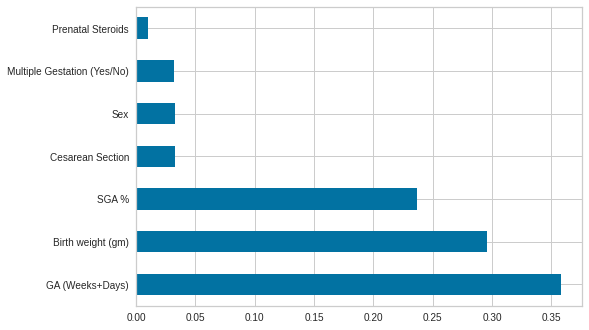

In [126]:
ranked_features = pd.Series(model.feature_importances_, index=X.columns)
ranked_features.nlargest(10).plot(kind="barh")
plt.show()

## Correlation

<AxesSubplot:>

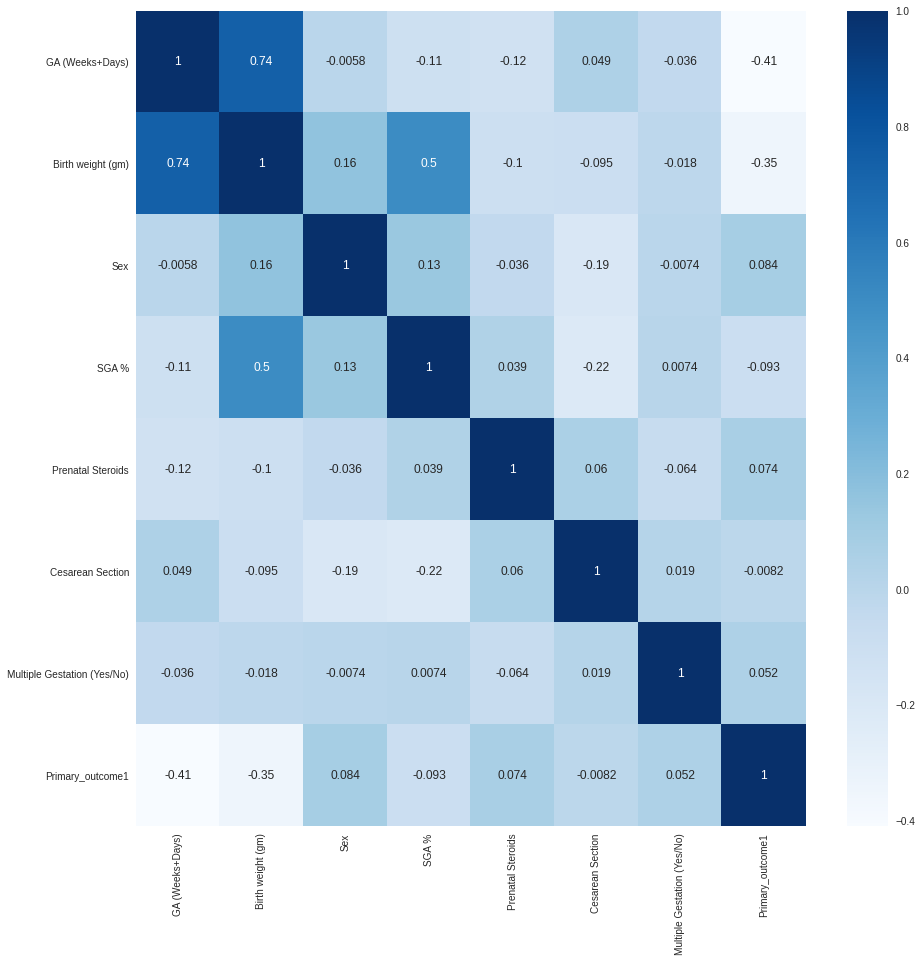

In [127]:
cor = main_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True,cmap=plt.cm.Blues)

In [128]:
#Correlation with output variable
cor_target = abs(cor['Primary_outcome1'])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.8]
relevant_features

Primary_outcome1    1.0
Name: Primary_outcome1, dtype: float64

In [129]:
threshold = 0.5

In [130]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr
               

In [131]:
correlation(data, threshold)

{'Birth weight (gm)', 'SGA %'}

In [132]:
print(data[['SGA %','Birth weight (gm)']].corr()) #Birth weight (gm) GA (Weeks+Days)

                      SGA %  Birth weight (gm)
SGA %              1.000000           0.503036
Birth weight (gm)  0.503036           1.000000


## Information gain

In [133]:
mutual_info = mutual_info_classif(X,y)
mutual_data = pd.Series(mutual_info, index = X.columns)
mutual_data.sort_values( ascending=False )

Birth weight (gm)              0.099077
GA (Weeks+Days)                0.090417
Prenatal Steroids              0.039420
Multiple Gestation (Yes/No)    0.010994
Cesarean Section               0.000933
SGA %                          0.000000
Sex                            0.000000
dtype: float64

### Encoding categorical data

In [134]:
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
# X = np.array(ct.fit_transform(X_norm))  # in ja yadet nare 3 marbot be race ro ezafe koni badan

In [135]:
#X1= pd.get_dummies(data, prefix=None, dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [136]:
# X.shape

In [137]:
# print(X)

In [138]:
# new_X = pd.DataFrame(X)
# new_X

In [139]:
# cor = new_X.corr()   # X.corr() 'numpy.ndarray' object has no attribute 'corr' error ----> first convert it to pd.DataFrame(X).corr()
# plt.figure(figsize=(15,15))
# sns.heatmap(cor, annot=True,cmap=plt.cm.Blues)

In [140]:
# # X = X[:,1:]
# #new_X = pd.DataFrame(X).iloc[:, pd.DataFrame(X).columns != 0]
# new_X1 = new_X.drop(new_X.columns[[0]], axis = 1)
# print(new_X1)

In [141]:
# cor = new_X1.corr()   # X.corr() 'numpy.ndarray' object has no attribute 'corr' error ----> first convert it to pd.DataFrame(X).corr()
# plt.figure(figsize=(15,15))
# sns.heatmap(cor, annot=True,cmap=plt.cm.Blues)

In [231]:
#Lasso
from sklearn.model_selection import train_test_split
indices = np.arange(230)
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size = 0.30, stratify=y, random_state = 152)
X_train.shape, X_test.shape
indices_train,indices_test
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

#lasso regularisation
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'))
sel_.fit(X_train, y_train)
filter = sel_.get_support()
filter
# selected_feat = X_train.columns[(sel_.get_support())]
# np.sum(sel_.estimator_.coef_ == 0)
# removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
# # removed_feats

array([ True, False,  True,  True,  True, False, False])

## Splitting the dataset into the Training set and Test set

train_set 1
[ 58 180 183  43 153 189  87  11 123 214  86 124 149 211  66  80 171 198
  47 108 162   4 204 190 126  29   2  96   5 196 182 227 105 146 177 226
 110  28  70 209 165 181 107 141  73   7  82  97 212  57 156 168 161  20
  63 207  54 213  45 106  92  26 208 117  14 175  24 157 176  85 172  32
  12 140  89 160  69 113  35  19 197  42  50 137  55  68 167 185  53 164
 225 127 224 184 103 158   6 216  49 102  74  27  71 130  60 121 210 221
  99 120 122  84 148  39  67  98 201  16  13 166   0  56 139 133 178  23
 152  10  15  90  52 228 217   3 132  18 147 136 125 155  22 194 143  72
 109 215 229 174  61 111 193   8  79 142  77 114 104 119 219 188  46]

test_set 1
[195  40 173 112   1 129 151 200  44  65 203  34 159 199 170  38  78  94
  21  37 101 191  36  17 218  88  59 205 135  41 202 100 131 150 187  76
  25 115  64 154 145  95  30 134 118  93 186  33   9 169 163  51  83  91
 128 206 116  31 138  81 220 223  75 144 192 222 179  62  48]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 

[[-1.60582393 -0.50874155  0.58956261 -0.45232834  0.58738102  0.01097259
   0.35864404]]


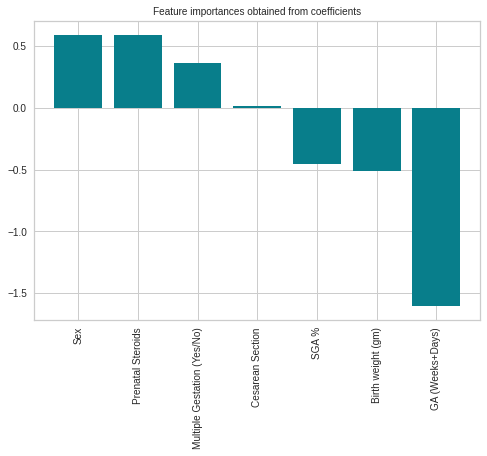

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 1
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]

Confusion matrix 1
[[55  5]
 [ 2  7]]

Accuracy 1
0.8985507246376812

Sensitivity 1
0.7777777777777778

Sensitivity 1
False Negative Rate, Logistic Regression:  0.9166666666666666

f1_score 1
0.6666666666666666
----------------------------------------------------------------------
train_set 2
[191   6 193 169 105 127 214 112 117 122 111 138  93 106 118 227 192 172
 197   5 130 144 190 228 216   4  61 213

[[-1.91140897  0.17379422  0.27806655 -0.6380529   0.37549826  0.08125951
   0.24993054]]


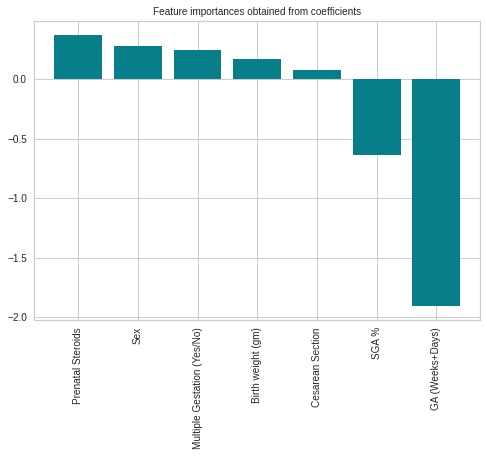

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 2
[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 2
[[51  9]
 [ 1  8]]

Accuracy 2
0.855072463768116

Sensitivity 2
0.8888888888888888

Sensitivity 2
False Negative Rate, Logistic Regression:  0.85

f1_score 2
0.6153846153846153
----------------------------------------------------------------------
train_set 3
[ 23 212  11  95 192  76  72 191 198 185  77 202   9  20 104  36  60  29
 121  81 217  52 164 163 179  93 171  28 187 159  71 11

[[-2.19697482 -1.33258969  0.70513954 -0.59149862  0.71521161  0.26636532
   0.36740056]]


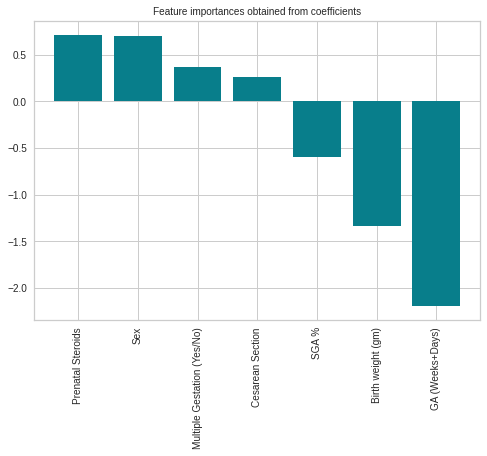

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 3
[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 3
[[46 14]
 [ 2  7]]

Accuracy 3
0.7681159420289855

Sensitivity 3
0.7777777777777778

Sensitivity 3
False Negative Rate, Logistic Regression:  0.7666666666666667

f1_score 3
0.4666666666666666
----------------------------------------------------------------------
train_set 4
[114 108 158 121  97 122  32  63 133 190 126 220  49 185  70 138  83 123
 113 118 143  84 202 178  11 152 102 216

[[-1.85175448  0.10789879  0.23463343 -0.47484161  0.45384879  0.11826164
   0.28051499]]


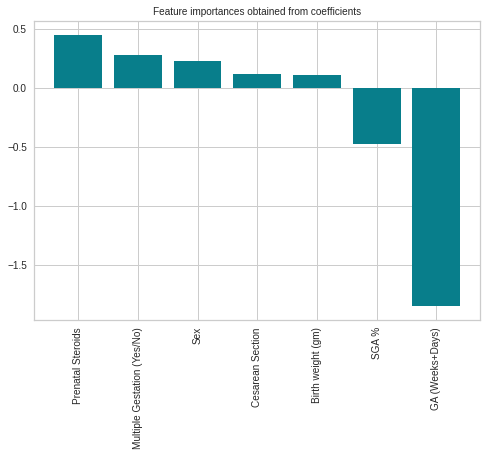

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 4
[[1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 4
[[53  7]
 [ 2  7]]

Accuracy 4
0.8695652173913043

Sensitivity 4
0.7777777777777778

Sensitivity 4
False Negative Rate, Logistic Regression:  0.8833333333333333

f1_score 4
0.6086956521739131
----------------------------------------------------------------------
train_set 5
[163 121 170  76  16  72 229 124  85 141 110 218 130  51 214   9  27  20
   1 104  99 132 126  87  13  92   5 144

[[-1.56686862 -0.33974957  0.40638492 -0.18880035  0.33592569  0.1909087
   0.38808793]]


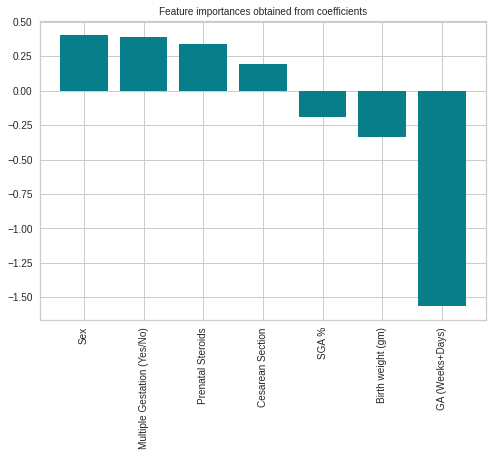

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 5
[[0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]

Confusion matrix 5
[[50 10]
 [ 1  8]]

Accuracy 5
0.8405797101449275

Sensitivity 5
0.8888888888888888

Sensitivity 5
False Negative Rate, Logistic Regression:  0.8333333333333334

f1_score 5
0.5925925925925926
----------------------------------------------------------------------
train_set 6
[ 93  52 227 144  34  63 154  72  73 102  64  49 139  82 215  55 151  37
 198  90 142 167 110  17 194 221  12 224

[[-1.55640314 -0.25027312 -0.02532406 -0.34733039  0.9353019   0.38169734
   0.46494665]]


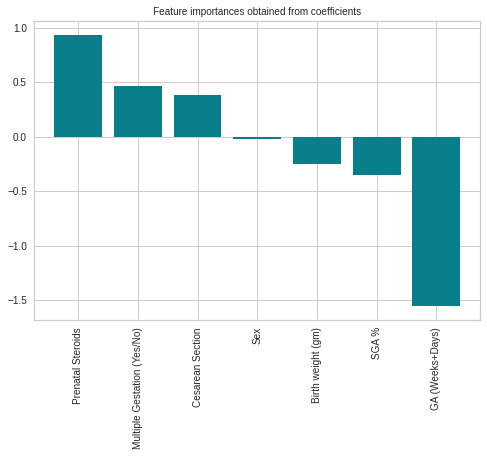

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 6
[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]]

Confusion matrix 6
[[51  9]
 [ 6  3]]

Accuracy 6
0.782608695652174

Sensitivity 6
0.3333333333333333

Sensitivity 6
False Negative Rate, Logistic Regression:  0.85

f1_score 6
0.28571428571428575
----------------------------------------------------------------------
train_set 7
[190 213  85 111  32  95  37  93  82 108 130 196 212  75 194 136  28 187
 186 102 115  60  74  83  87  14 165 204 183  20 222  

[[-1.44593648 -1.03551617  0.50541491 -0.35839529  0.45645942  0.09669207
   0.4723708 ]]


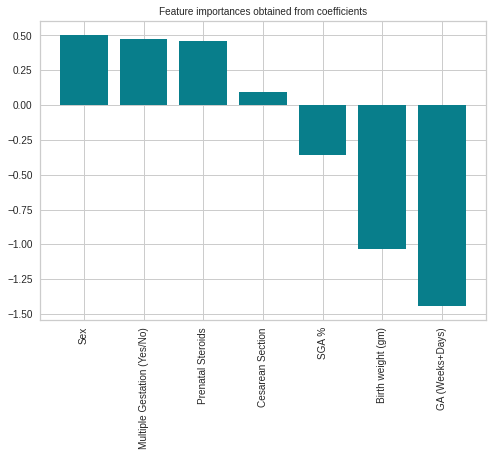

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 7
[[1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]]

Confusion matrix 7
[[50 10]
 [ 1  8]]

Accuracy 7
0.8405797101449275

Sensitivity 7
0.8888888888888888

Sensitivity 7
False Negative Rate, Logistic Regression:  0.8333333333333334

f1_score 7
0.5925925925925926
----------------------------------------------------------------------
train_set 8
[ 48 103 119  31 218 129  85  91 195 117 147  45  92 222  33 169 184 110
  13 136 123  38  67 128  81 161 217  58

[[-1.60863406 -0.21435597  0.18803773 -0.27526896  0.97882507  0.24237261
   0.30469903]]


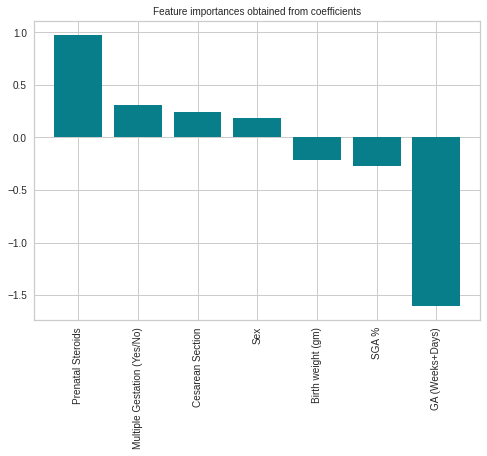

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 8
[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]]

Confusion matrix 8
[[45 15]
 [ 1  8]]

Accuracy 8
0.7681159420289855

Sensitivity 8
0.8888888888888888

Sensitivity 8
False Negative Rate, Logistic Regression:  0.75

f1_score 8
0.5
----------------------------------------------------------------------
train_set 9
[ 29  26  95 150 194 229 196  78 110 154  75 113 160  10 100 137 147  12
  88   0 211  60 159 128 103  90 220 133 201 119  89  24  58 161  87 

[[-2.06756258 -0.55218299  0.4123733  -0.39705625  0.62952162  0.03803093
   0.23311612]]


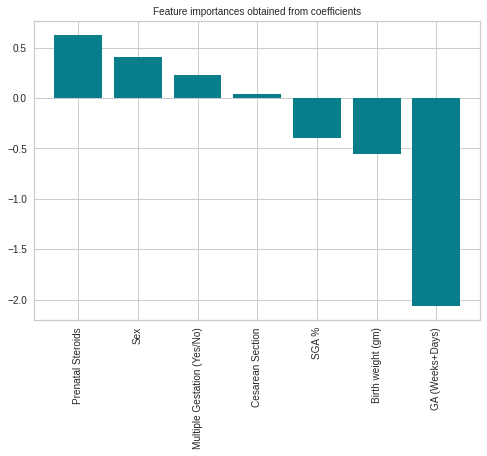

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 9
[[0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]]

Confusion matrix 9
[[50 10]
 [ 1  8]]

Accuracy 9
0.8405797101449275

Sensitivity 9
0.8888888888888888

Sensitivity 9
False Negative Rate, Logistic Regression:  0.8333333333333334

f1_score 9
0.5925925925925926
----------------------------------------------------------------------
train_set 10
[228  99 217  60  44 205 177 199 123  15 196  39 120  86 203  79  67 109
 195  78  77  47  97 220  14 157 216 14

[[-2.23259271 -0.29686665  0.47158252 -0.63153285  0.29327274  0.02931206
   0.01964984]]


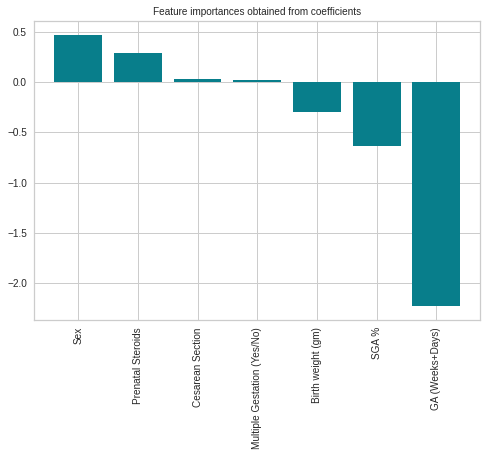

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 10
[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]

Confusion matrix 10
[[51  9]
 [ 3  6]]

Accuracy 10
0.8260869565217391

Sensitivity 10
0.6666666666666666

Sensitivity 10
False Negative Rate, Logistic Regression:  0.85

f1_score 10
0.5
----------------------------------------------------------------------
train_set 11
[ 70 167  58  90 194  79 147 115 112 226 188 191 186  46  80 166 204  24
 170  52 168 209 121 125  69 126 157 229 192 131   5 217 116 1

[[-1.88584101 -0.18314144  0.40915597 -0.96558634  0.56282219 -0.09699324
   0.37791692]]


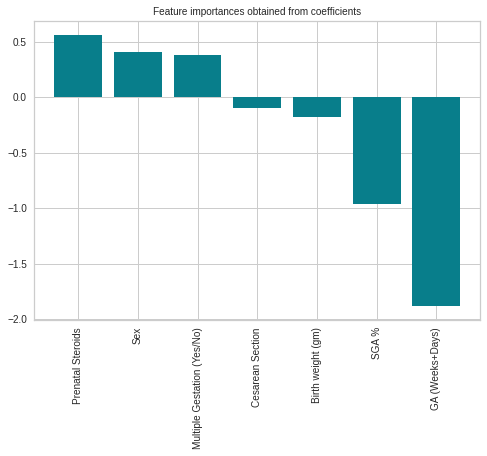

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 11
[[0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 11
[[56  4]
 [ 5  4]]

Accuracy 11
0.8695652173913043

Sensitivity 11
0.4444444444444444

Sensitivity 11
False Negative Rate, Logistic Regression:  0.9333333333333333

f1_score 11
0.47058823529411764
----------------------------------------------------------------------
train_set 12
[143 181   2 138   4  12  40 188  64  42  55  65  48  62  53 133  68 101
  14 169 201 178 136 208  18  43

[[-1.9301473   0.29686206  0.11068283 -0.7466081   0.42448839  0.23656539
   0.10256506]]


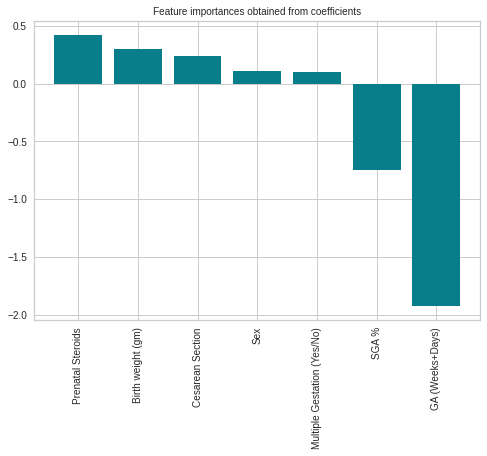

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 12
[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]]

Confusion matrix 12
[[50 10]
 [ 2  7]]

Accuracy 12
0.8260869565217391

Sensitivity 12
0.7777777777777778

Sensitivity 12
False Negative Rate, Logistic Regression:  0.8333333333333334

f1_score 12
0.5384615384615384
----------------------------------------------------------------------
train_set 13
[ 48  88  93 212 216 135 114  41  92  78 217 221 192 209 130 228 106   5
  55 176 229 105 101  26  76  50 

[[-1.99514931 -0.50261646  0.37649071 -0.47435493  0.49361867 -0.05678546
   0.04765757]]


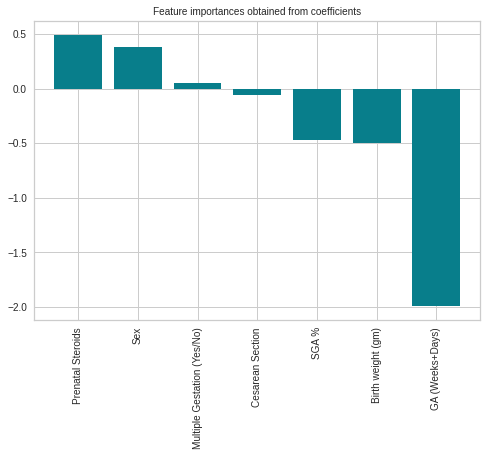

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 13
[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 13
[[54  6]
 [ 3  6]]

Accuracy 13
0.8695652173913043

Sensitivity 13
0.6666666666666666

Sensitivity 13
False Negative Rate, Logistic Regression:  0.9

f1_score 13
0.5714285714285715
----------------------------------------------------------------------
train_set 14
[ 57 109 188  63  56 173 117 124 150 185 191  89  23  52 145 186  75  21
 146  39 164  44  78  41 147  71 149  96 213 222

[[-1.60721694 -0.51968924  0.29956299 -0.74226616  0.51420734 -0.05740389
   0.38815142]]


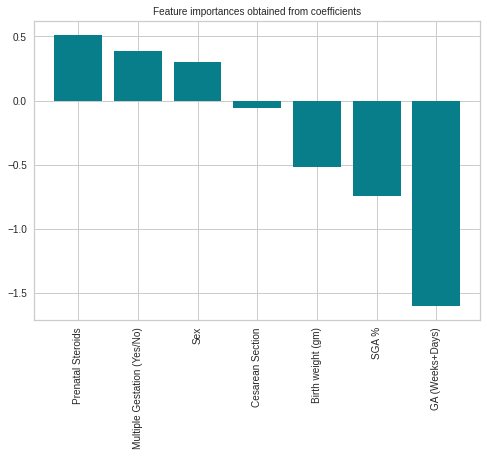

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 14
[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 14
[[52  8]
 [ 4  5]]

Accuracy 14
0.8260869565217391

Sensitivity 14
0.5555555555555556

Sensitivity 14
False Negative Rate, Logistic Regression:  0.8666666666666667

f1_score 14
0.4545454545454546
----------------------------------------------------------------------
train_set 15
[125 217 189 128 119 126 168 219  84  41  26  11 183 131 103  52  60  14
 138 107 213  72 147 174 137 229 

[[-2.28626503 -0.11689896  0.28822334 -0.65619757  0.66184191 -0.23567104
   0.14906031]]


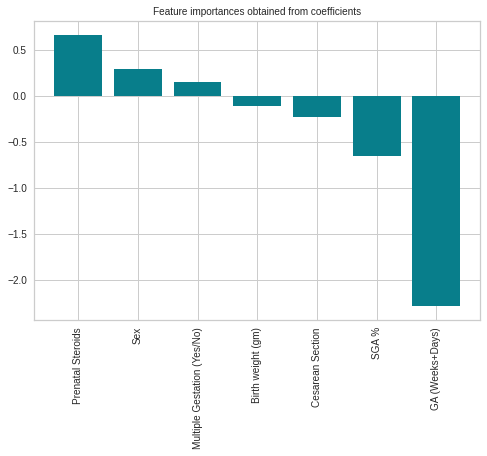

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 15
[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]]

Confusion matrix 15
[[50 10]
 [ 2  7]]

Accuracy 15
0.8260869565217391

Sensitivity 15
0.7777777777777778

Sensitivity 15
False Negative Rate, Logistic Regression:  0.8333333333333334

f1_score 15
0.5384615384615384
----------------------------------------------------------------------
train_set 16
[216  34 213  12 220  70 191  94 142 209  40 208  58  80 228  29 226 163
  51  92  73 126  76 214  81   9 

[[-1.31271133 -0.52348071  0.23406879 -0.16410804  0.84673082  0.03028427
   0.28470843]]


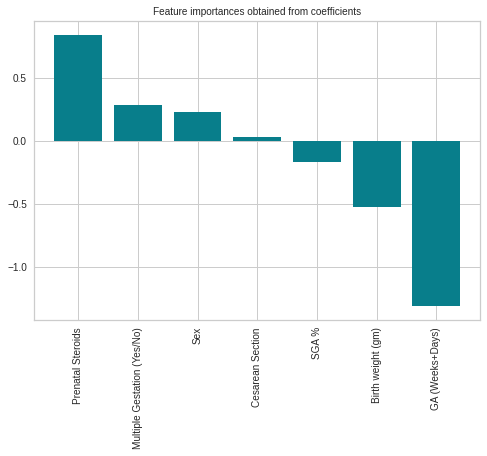

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 16
[[1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]]

Confusion matrix 16
[[47 13]
 [ 1  8]]

Accuracy 16
0.7971014492753623

Sensitivity 16
0.8888888888888888

Sensitivity 16
False Negative Rate, Logistic Regression:  0.7833333333333333

f1_score 16
0.5333333333333333
----------------------------------------------------------------------
train_set 17
[206 102 218  35 190 217  26 100  77 155  11 164  89 199  38 174  97  10
 175  34 159 178 180 121 172 176 

[[-1.49301728 -0.56927705  0.30832949 -0.70510904  1.14706287 -0.1413767
   0.47864728]]


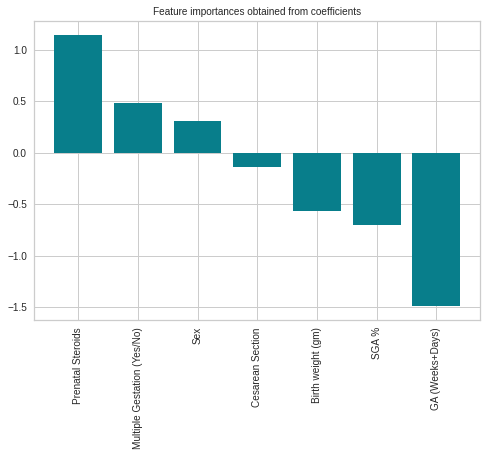

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 17
[[0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 17
[[53  7]
 [ 3  6]]

Accuracy 17
0.855072463768116

Sensitivity 17
0.6666666666666666

Sensitivity 17
False Negative Rate, Logistic Regression:  0.8833333333333333

f1_score 17
0.5454545454545455
----------------------------------------------------------------------
train_set 18
[ 40 130  88  19 109  37 150   1 187 129 196 207 225 134 158  44   9 165
  97  58  45 176  61 143 161   4 1

[[-2.1972169   0.09302938  0.67002641 -0.84548029  0.80066557  0.0330539
  -0.20436477]]


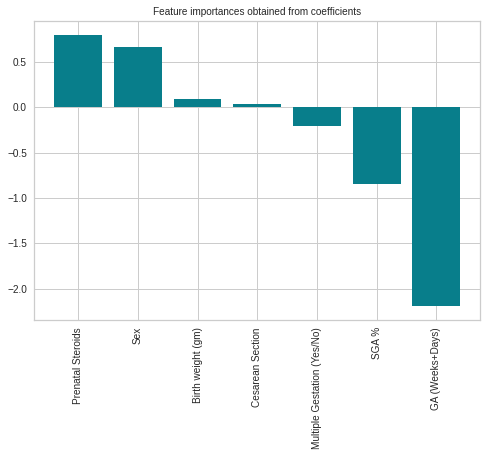

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 18
[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]]

Confusion matrix 18
[[50 10]
 [ 4  5]]

Accuracy 18
0.7971014492753623

Sensitivity 18
0.5555555555555556

Sensitivity 18
False Negative Rate, Logistic Regression:  0.8333333333333334

f1_score 18
0.4166666666666667
----------------------------------------------------------------------
train_set 19
[104 130  43 114  56 160 146 229 219 173  85  68 138  82 181 115 162  55
  87 180  23 117  57  24  12  90 

[[-1.99333389 -0.53045224  0.23394799 -0.23399929  0.61545676 -0.03254784
   0.24448748]]


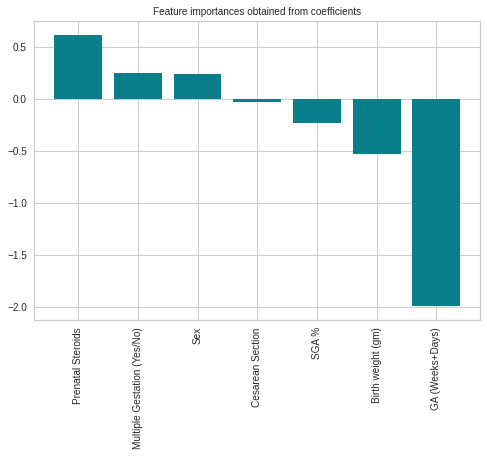

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 19
[[0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]

Confusion matrix 19
[[49 11]
 [ 2  7]]

Accuracy 19
0.8115942028985508

Sensitivity 19
0.7777777777777778

Sensitivity 19
False Negative Rate, Logistic Regression:  0.8166666666666667

f1_score 19
0.5185185185185185
----------------------------------------------------------------------
train_set 20
[115 197  27 209 108 171 102  75 105  31 107 200  50 152   5  66 227 141
  38  20 143 223  79  84 116  91 

[[-1.95682469 -1.58034569  0.7404735  -0.43437947  0.56067658 -0.24914564
   0.53604644]]


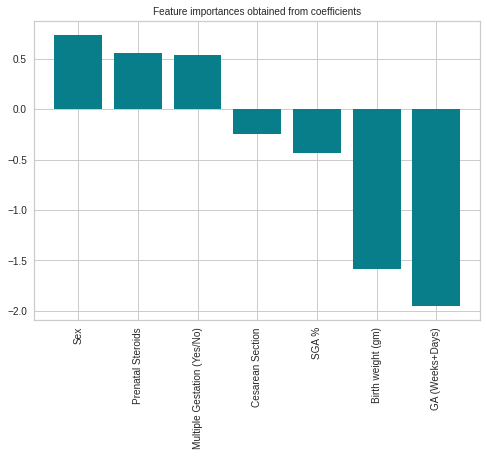

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 20
[[0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]]

Confusion matrix 20
[[49 11]
 [ 3  6]]

Accuracy 20
0.7971014492753623

Sensitivity 20
0.6666666666666666

Sensitivity 20
False Negative Rate, Logistic Regression:  0.8166666666666667

f1_score 20
0.46153846153846156
----------------------------------------------------------------------
train_set 21
[155  30 109  52 193 119 123  65 222  12  84 192 122 129  55 203  47 153
 217 225  85   2 213 226  21 227

[[-1.86496559  0.26359677  0.43208162 -0.58331547  1.08328951  0.08160777
   0.35217521]]


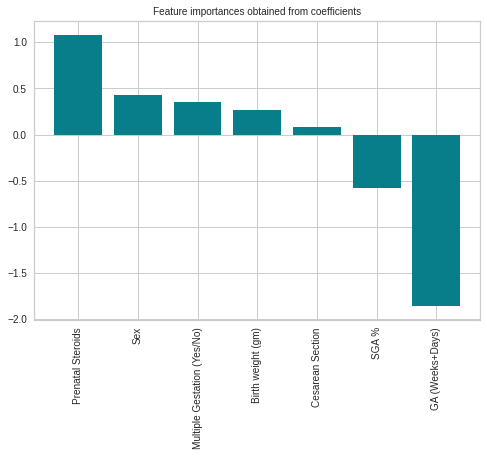

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 21
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 21
[[50 10]
 [ 2  7]]

Accuracy 21
0.8260869565217391

Sensitivity 21
0.7777777777777778

Sensitivity 21
False Negative Rate, Logistic Regression:  0.8333333333333334

f1_score 21
0.5384615384615384
----------------------------------------------------------------------
train_set 22
[144 213 206  81 167 225 191  99 129 219  60 173  79  38 107  93 140   7
  14 172 161  89  54 176  41 139 

[[-1.96511279 -0.28039116  0.46689624 -0.76854194  0.52908895 -0.1776108
   0.46964369]]


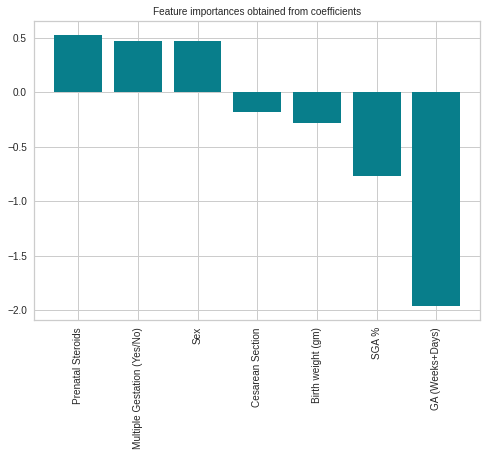

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 22
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]]

Confusion matrix 22
[[49 11]
 [ 2  7]]

Accuracy 22
0.8115942028985508

Sensitivity 22
0.7777777777777778

Sensitivity 22
False Negative Rate, Logistic Regression:  0.8166666666666667

f1_score 22
0.5185185185185185
----------------------------------------------------------------------
train_set 23
[146 203 148 204   6 206  92 226  33  13 162  81 216 132  32 170  48 159
 219 183  20  44  85 213 105  21 

[[-2.06515057  0.23343059  0.48980421 -0.27520393  0.52132597  0.25485376
   0.2299625 ]]


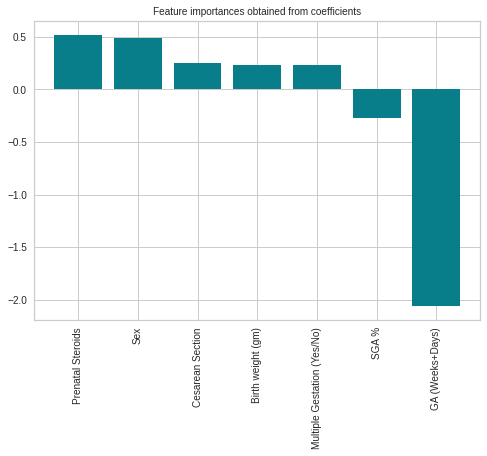

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 23
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]]

Confusion matrix 23
[[45 15]
 [ 2  7]]

Accuracy 23
0.7536231884057971

Sensitivity 23
0.7777777777777778

Sensitivity 23
False Negative Rate, Logistic Regression:  0.75

f1_score 23
0.45161290322580644
----------------------------------------------------------------------
train_set 24
[ 24 188  58  59 211 191  70 205  61  35 206  19 126 143 140 110 119 112
 137 229 221 197 142  66  11 172  99 152  48  

[[-2.13793471 -0.41835673  0.37178445 -0.39209734  0.38797453  0.34346103
   0.08387995]]


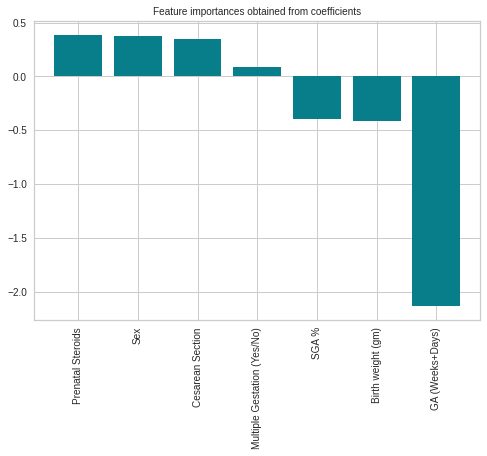

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 24
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]

Confusion matrix 24
[[50 10]
 [ 3  6]]

Accuracy 24
0.8115942028985508

Sensitivity 24
0.6666666666666666

Sensitivity 24
False Negative Rate, Logistic Regression:  0.8333333333333334

f1_score 24
0.4800000000000001
----------------------------------------------------------------------
train_set 25
[ 96 224 197  57   0  83  19 218 200  97 178  11 127  42 208 226  79 116
  17 196 181 125  16  27  62 103 

[[-2.02306376 -0.19004086  0.37316711 -0.68077694  0.60941     0.01617824
   0.1570887 ]]


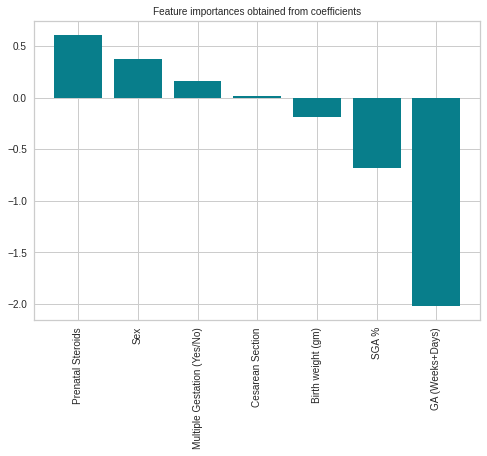

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 25
[[0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 25
[[45 15]
 [ 1  8]]

Accuracy 25
0.7681159420289855

Sensitivity 25
0.8888888888888888

Sensitivity 25
False Negative Rate, Logistic Regression:  0.75

f1_score 25
0.5
----------------------------------------------------------------------
train_set 26
[224 129 175  32  45  13 170  85 215  91   0  66 107 159  62  16  17  54
  84  37 206  19  33 145  48  27  77 127 200 220 169 219  31  

[[-1.595695   -0.40579142  0.38281563 -0.0696609   0.3693551   0.07822407
   0.32284159]]


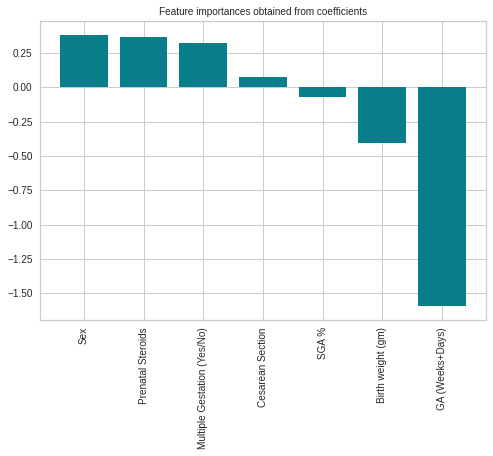

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 26
[[1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]

Confusion matrix 26
[[50 10]
 [ 1  8]]

Accuracy 26
0.8405797101449275

Sensitivity 26
0.8888888888888888

Sensitivity 26
False Negative Rate, Logistic Regression:  0.8333333333333334

f1_score 26
0.5925925925925926
----------------------------------------------------------------------
train_set 27
[ 80 193 127 174 130 207  25  43  90 113  83  71  31 216  92  98 135 158
  44 215 149 104 141 199  78  36 

[[-1.95591743 -0.19360352  0.15523225 -0.23726358  0.42220306  0.33294064
   0.37390914]]


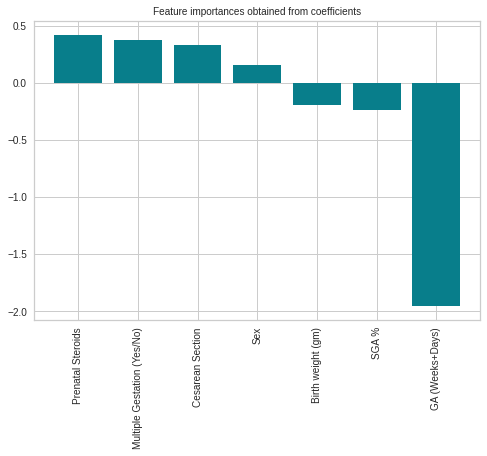

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 27
[[0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]

Confusion matrix 27
[[52  8]
 [ 5  4]]

Accuracy 27
0.8115942028985508

Sensitivity 27
0.4444444444444444

Sensitivity 27
False Negative Rate, Logistic Regression:  0.8666666666666667

f1_score 27
0.380952380952381
----------------------------------------------------------------------
train_set 28
[ 99  73   9 136 105 134 190 170  81  28  45 217 174 180 126 227 171  10
   8  79 130  14  51 215 187  40 1

[[-1.62963969 -0.18487887  0.18414815 -0.50625416  0.19393479  0.23371015
   0.25019573]]


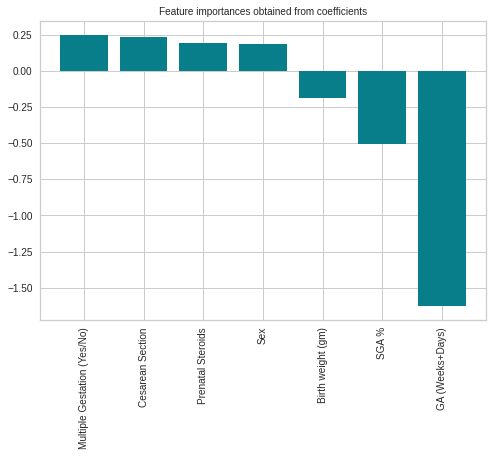

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 28
[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]]

Confusion matrix 28
[[49 11]
 [ 2  7]]

Accuracy 28
0.8115942028985508

Sensitivity 28
0.7777777777777778

Sensitivity 28
False Negative Rate, Logistic Regression:  0.8166666666666667

f1_score 28
0.5185185185185185
----------------------------------------------------------------------
train_set 29
[106  11 177  77 108 121 131 151 138 104 152 206  74 218 134  57 179 142
 155 168 140 227 210 200 149  97 

[[-1.41227055 -0.54292894  0.30758497 -0.12936108  1.01066327  0.30940659
   0.11700239]]


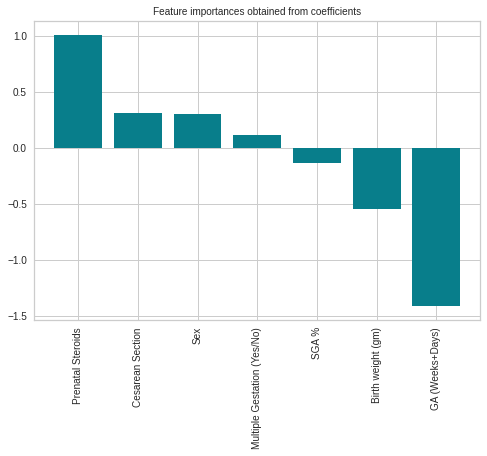

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 29
[[1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]

Confusion matrix 29
[[46 14]
 [ 3  6]]

Accuracy 29
0.7536231884057971

Sensitivity 29
0.6666666666666666

Sensitivity 29
False Negative Rate, Logistic Regression:  0.7666666666666667

f1_score 29
0.41379310344827586
----------------------------------------------------------------------
train_set 30
[ 91  39  73  54 204 224 214 157  68 219 146  37 175  22 140 176  30 147
 134 112 184  59 215 208 197  72

[[-2.34759321 -0.28526218  0.42242824 -0.59389394  0.39388167 -0.10170783
   0.08619399]]


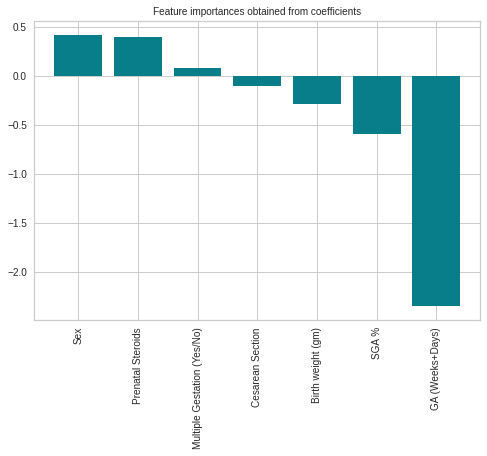

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 30
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]]

Confusion matrix 30
[[45 15]
 [ 2  7]]

Accuracy 30
0.7536231884057971

Sensitivity 30
0.7777777777777778

Sensitivity 30
False Negative Rate, Logistic Regression:  0.75

f1_score 30
0.45161290322580644
----------------------------------------------------------------------
train_set 31
[198 126  28  35  67  47 138 168  37 172 174  92 144  91  85  96   0 114
  25 124  65 101 128 193  24 137  84 212 215 2

[[-1.80908702 -0.30196811  0.50515482 -0.18213989  1.20651255  0.20648955
   0.24384792]]


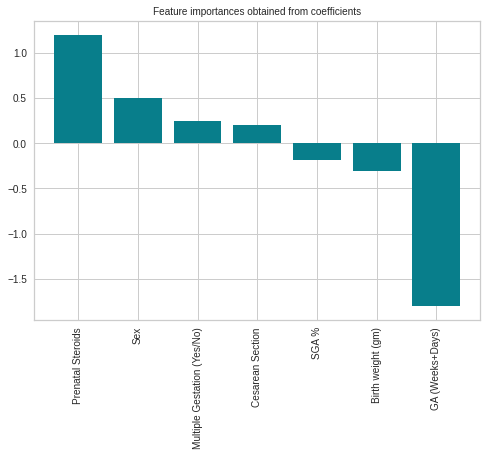

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 31
[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]]

Confusion matrix 31
[[53  7]
 [ 3  6]]

Accuracy 31
0.855072463768116

Sensitivity 31
0.6666666666666666

Sensitivity 31
False Negative Rate, Logistic Regression:  0.8833333333333333

f1_score 31
0.5454545454545455
----------------------------------------------------------------------
train_set 32
[ 85 184 188 191  70 102   3 223  81  32  97 202  75 155 207  19  37  80
 149  38 136 118 214 169  56  52 1

[[-1.51333997 -0.40467909  0.30619877 -0.44613116  0.43816069  0.32808645
   0.27840886]]


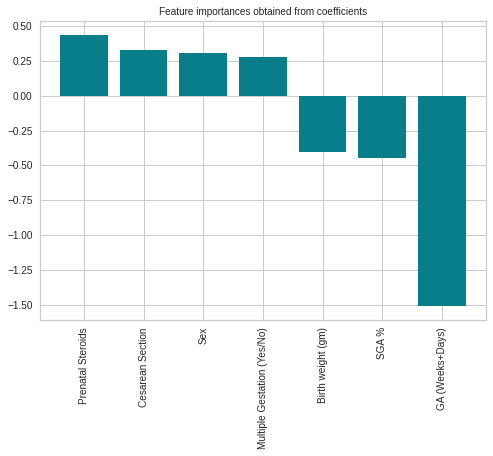

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 32
[[1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]]

Confusion matrix 32
[[50 10]
 [ 2  7]]

Accuracy 32
0.8260869565217391

Sensitivity 32
0.7777777777777778

Sensitivity 32
False Negative Rate, Logistic Regression:  0.8333333333333334

f1_score 32
0.5384615384615384
----------------------------------------------------------------------
train_set 33
[ 80  13  36 228 213  52 206  27 188  23 121 117 162 137  96 194  78  59
 145 147  66  53 195 203  81 120 

[[-1.67558451 -0.54488857  0.70695122 -0.91613344  0.45569071  0.06935924
   0.47326137]]


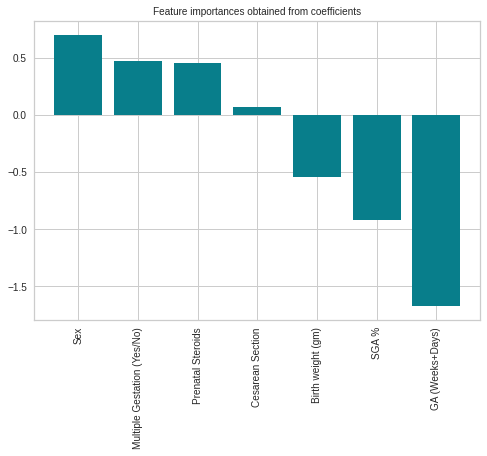

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 33
[[0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]]

Confusion matrix 33
[[49 11]
 [ 4  5]]

Accuracy 33
0.782608695652174

Sensitivity 33
0.5555555555555556

Sensitivity 33
False Negative Rate, Logistic Regression:  0.8166666666666667

f1_score 33
0.39999999999999997
----------------------------------------------------------------------
train_set 34
[ 24 104 108 173 100 187  21 130 140  17 219   4 217  76   2 176 123 122
  43 208 134 212  15 214 146 129 

[[-1.72175632 -0.43670994  0.668659   -0.8770519   0.64587064  0.05099814
   0.53088125]]


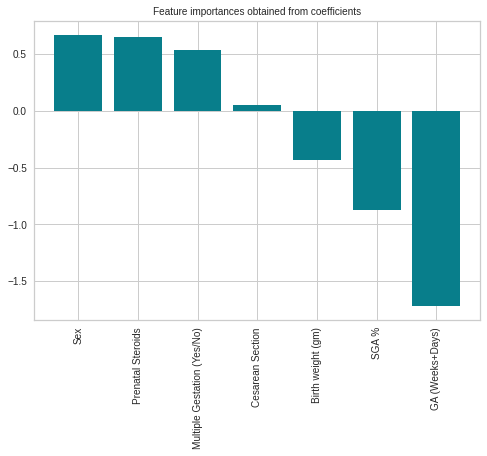

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 34
[[0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]]

Confusion matrix 34
[[49 11]
 [ 3  6]]

Accuracy 34
0.7971014492753623

Sensitivity 34
0.6666666666666666

Sensitivity 34
False Negative Rate, Logistic Regression:  0.8166666666666667

f1_score 34
0.46153846153846156
----------------------------------------------------------------------
train_set 35
[ 70  46 202  15  62 124  92 128  99  26 116 200 201  14 223  96  48  24
 216 117  53 188   6 110 125 121

[[-1.66980666  0.07374466  0.23951718 -0.77995958  0.53082635  0.0052411
   0.30566983]]


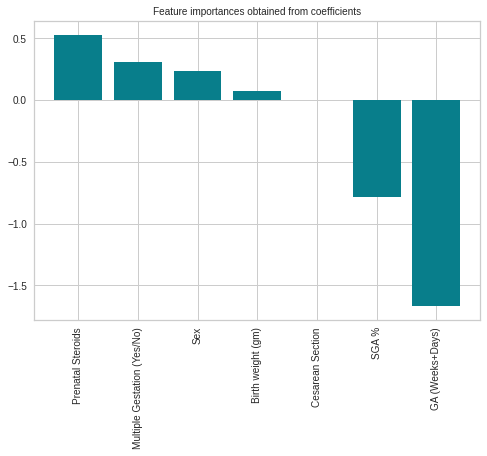

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 35
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]]

Confusion matrix 35
[[52  8]
 [ 1  8]]

Accuracy 35
0.8695652173913043

Sensitivity 35
0.8888888888888888

Sensitivity 35
False Negative Rate, Logistic Regression:  0.8666666666666667

f1_score 35
0.64
----------------------------------------------------------------------
train_set 36
[ 85   7  96  81 132 102 184 223 173  67 107   8 182 110 205  37   4  12
  84  39  82  33 185 175 176 192  92  26  29 10

[[-1.43939678 -0.33314128  0.47592411 -0.33852566  0.47932177  0.0466389
   0.16595029]]


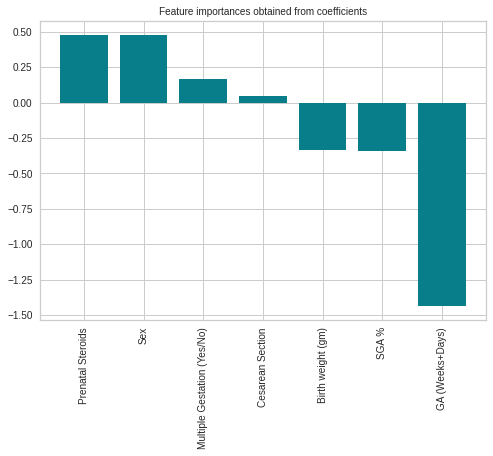

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 36
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]

Confusion matrix 36
[[53  7]
 [ 1  8]]

Accuracy 36
0.8840579710144928

Sensitivity 36
0.8888888888888888

Sensitivity 36
False Negative Rate, Logistic Regression:  0.8833333333333333

f1_score 36
0.6666666666666667
----------------------------------------------------------------------
train_set 37
[ 85  43  64  40  37 130 178  86  68  71 214  30 216  36 164  15 148 157
 106 109  73  97 187 107 165   2 

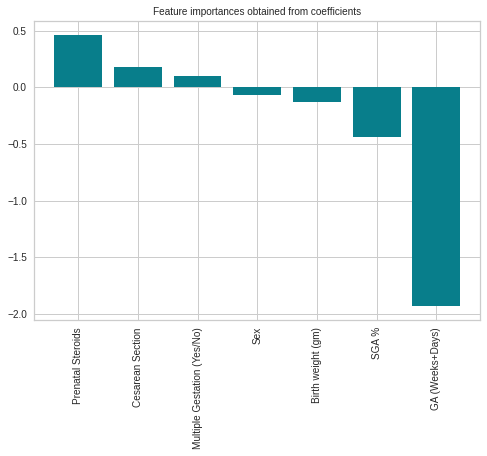

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 37
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]

Confusion matrix 37
[[49 11]
 [ 2  7]]

Accuracy 37
0.8115942028985508

Sensitivity 37
0.7777777777777778

Sensitivity 37
False Negative Rate, Logistic Regression:  0.8166666666666667

f1_score 37
0.5185185185185185
----------------------------------------------------------------------
train_set 38
[142 119  16 218 140  40 125 115 139  83 220  32  88 100  43 224  39 138
 160 185  27  31  13  28  61  58 

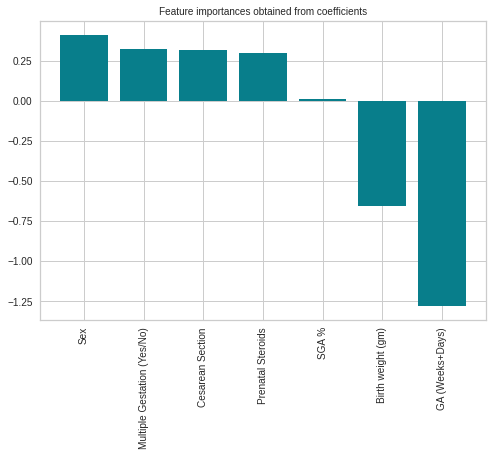

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 38
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 38
[[51  9]
 [ 1  8]]

Accuracy 38
0.855072463768116

Sensitivity 38
0.8888888888888888

Sensitivity 38
False Negative Rate, Logistic Regression:  0.85

f1_score 38
0.6153846153846153
----------------------------------------------------------------------
train_set 39
[212 164  92 136 187  64 211 119 200 130   1  33 155 138  15 148 124 185
  99  96 191 167  42   9 149  72 123  93 228 214

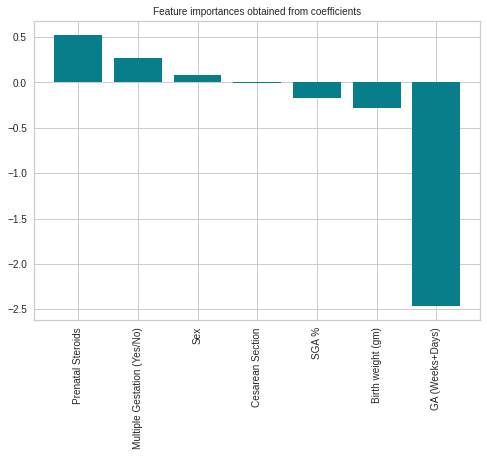

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 39
[[0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]]

Confusion matrix 39
[[48 12]
 [ 5  4]]

Accuracy 39
0.7536231884057971

Sensitivity 39
0.4444444444444444

Sensitivity 39
False Negative Rate, Logistic Regression:  0.8

f1_score 39
0.32
----------------------------------------------------------------------
train_set 40
[ 66 179 195 172 187 189 131  34  17  67 151 174 125 106 115 146  30 180
 190 223 152  99 212  61  92  28 201 175 192 218 148 226 193 1

[[-1.73375702 -0.11123866  0.33699056 -0.4683914   0.511795   -0.15178735
   0.4358191 ]]


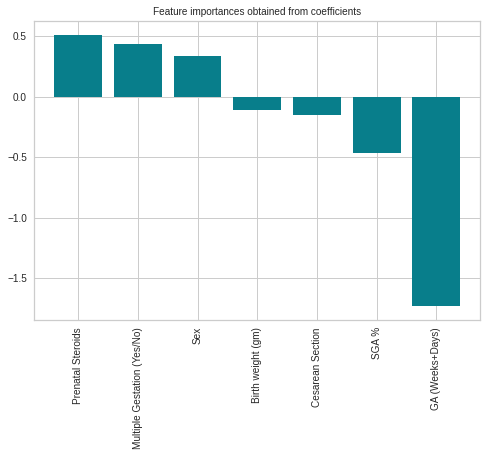

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 40
[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]]

Confusion matrix 40
[[52  8]
 [ 2  7]]

Accuracy 40
0.855072463768116

Sensitivity 40
0.7777777777777778

Sensitivity 40
False Negative Rate, Logistic Regression:  0.8666666666666667

f1_score 40
0.5833333333333334
----------------------------------------------------------------------
train_set 41
[ 24  37 141 120  52  65  58 189  57  86 195  18  21  53 150  47  39   0
 221  71 126  49  51  48 134 115 1

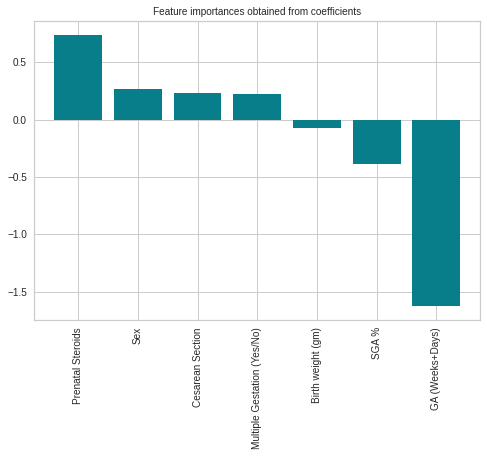

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 41
[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]]

Confusion matrix 41
[[53  7]
 [ 3  6]]

Accuracy 41
0.855072463768116

Sensitivity 41
0.6666666666666666

Sensitivity 41
False Negative Rate, Logistic Regression:  0.8833333333333333

f1_score 41
0.5454545454545455
----------------------------------------------------------------------
train_set 42
[163  32 207  24 110  11 194 119 196   2  41  10  86 201 156  48 213 133
  14 193  53 171 216 117  28  63  

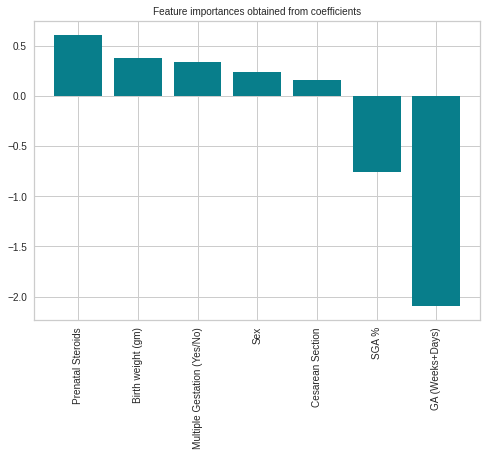

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 42
[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]]

Confusion matrix 42
[[51  9]
 [ 4  5]]

Accuracy 42
0.8115942028985508

Sensitivity 42
0.5555555555555556

Sensitivity 42
False Negative Rate, Logistic Regression:  0.85

f1_score 42
0.43478260869565216
----------------------------------------------------------------------
train_set 43
[113 145 137  84 144 110  40 160 198  74  49  46  33 155 117 200  25 216
 212  99 207  10 178 108 205 175 158  86  34  

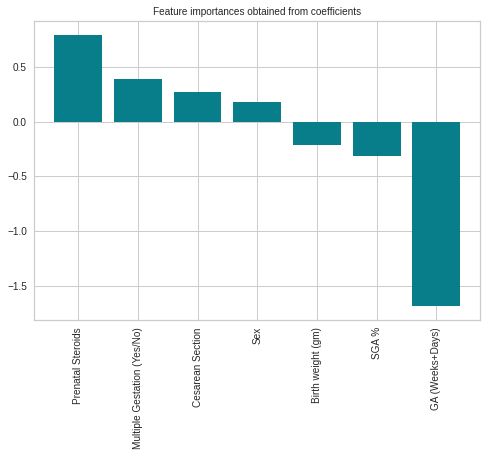

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 43
[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]]

Confusion matrix 43
[[45 15]
 [ 3  6]]

Accuracy 43
0.7391304347826086

Sensitivity 43
0.6666666666666666

Sensitivity 43
False Negative Rate, Logistic Regression:  0.75

f1_score 43
0.4
----------------------------------------------------------------------
train_set 44
[195 191 127 169  87  46  92 168 158  98 121  68   2 110   9 148   0  82
  41 183 161 203  42 166 134  44 114 118 151  48  88 116 143 2

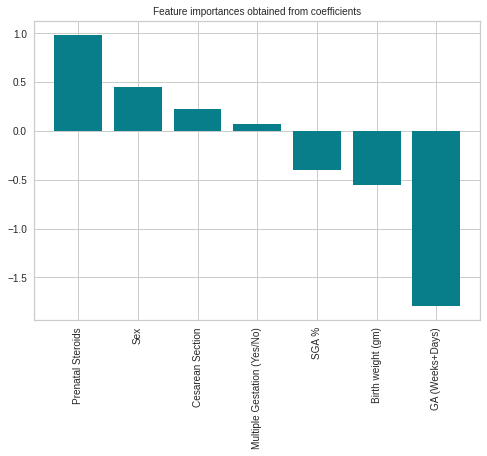

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 44
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 44
[[48 12]
 [ 2  7]]

Accuracy 44
0.7971014492753623

Sensitivity 44
0.7777777777777778

Sensitivity 44
False Negative Rate, Logistic Regression:  0.8

f1_score 44
0.5
----------------------------------------------------------------------
train_set 45
[216 157  58  13 182  43  38  98 210  88 227  25 180   3 111  49 140  52
 107  92  11 112 215  26 222 178 146 167  29 187  95  86 220  2

[[-1.59875292 -0.17725666  0.16722869 -0.48572014  0.93986665 -0.08906926
   0.21022406]]


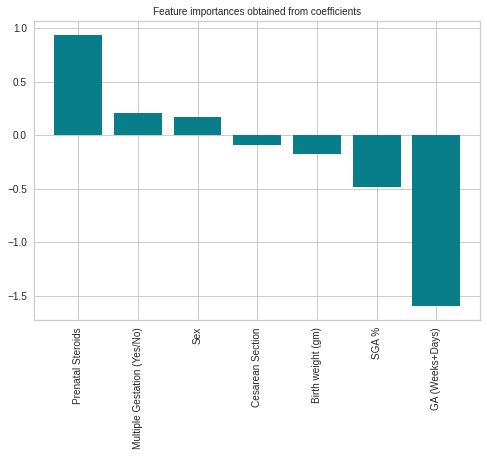

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 45
[[0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 45
[[49 11]
 [ 1  8]]

Accuracy 45
0.8260869565217391

Sensitivity 45
0.8888888888888888

Sensitivity 45
False Negative Rate, Logistic Regression:  0.8166666666666667

f1_score 45
0.5714285714285714
----------------------------------------------------------------------
train_set 46
[ 72  21  76 204 109  82 137 195 127 175 132  46 213  78 207  25   4  10
 145 102 150  43   1 173  53 142 

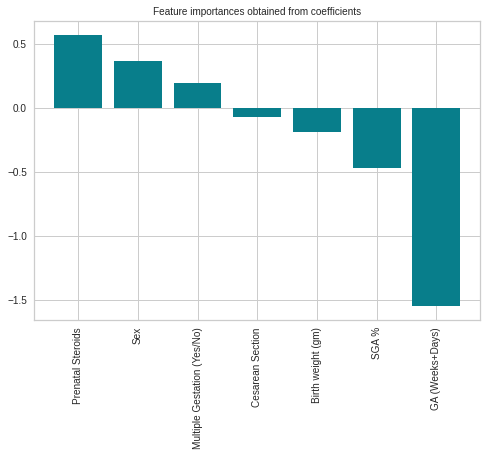

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 46
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]]

Confusion matrix 46
[[53  7]
 [ 1  8]]

Accuracy 46
0.8840579710144928

Sensitivity 46
0.8888888888888888

Sensitivity 46
False Negative Rate, Logistic Regression:  0.8833333333333333

f1_score 46
0.6666666666666667
----------------------------------------------------------------------
train_set 47
[142 101 158  46  84  11 220  56  20  17  98  13 152  31  51 192  18  85
 196 109 218 201 191  95 202  88 

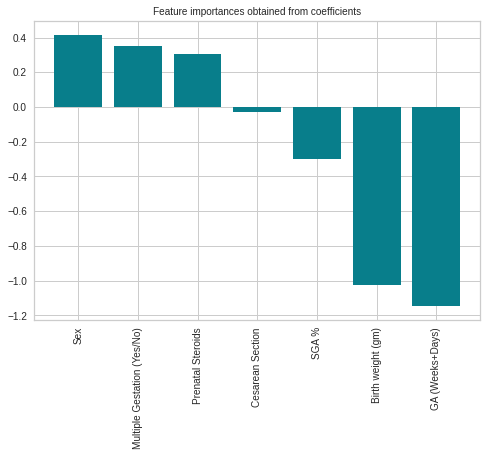

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 47
[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 47
[[55  5]
 [ 1  8]]

Accuracy 47
0.9130434782608695

Sensitivity 47
0.8888888888888888

Sensitivity 47
False Negative Rate, Logistic Regression:  0.9166666666666666

f1_score 47
0.7272727272727274
----------------------------------------------------------------------
train_set 48
[168 144 124  27 163 175  40 217 106   0 122 221  15   6 216 110 150 178
  41 143  93  63 183  80 224  87 

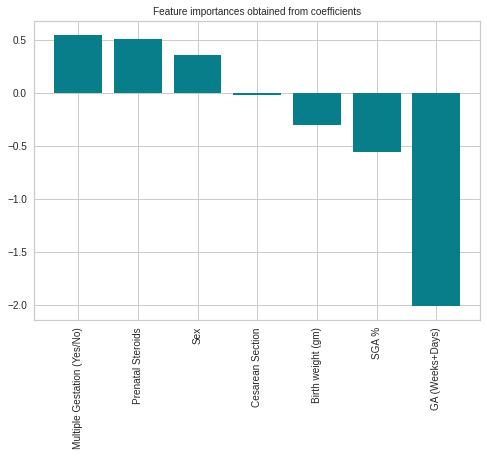

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 48
[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]]

Confusion matrix 48
[[49 11]
 [ 2  7]]

Accuracy 48
0.8115942028985508

Sensitivity 48
0.7777777777777778

Sensitivity 48
False Negative Rate, Logistic Regression:  0.8166666666666667

f1_score 48
0.5185185185185185
----------------------------------------------------------------------
train_set 49
[163   3  11  94 156 229 132  89 191  82  90 134 217 205  86  59 155 116
  58 118 207 103  47 130   4 199 

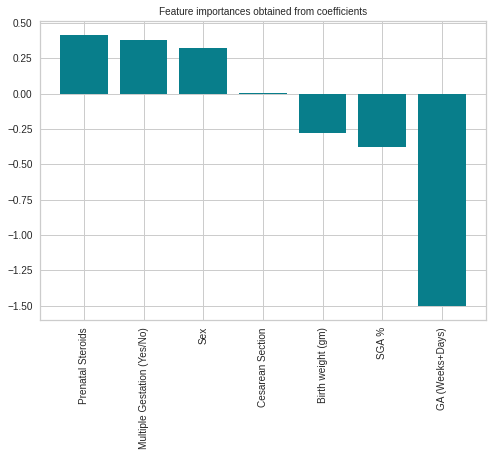

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 49
[[1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 49
[[47 13]
 [ 0  9]]

Accuracy 49
0.8115942028985508

Sensitivity 49
1.0

Sensitivity 49
False Negative Rate, Logistic Regression:  0.7833333333333333

f1_score 49
0.5806451612903226
----------------------------------------------------------------------
train_set 50
[137  32  53  13  26  87 215  86 217 185  78 100  52   9 130 183 160  35
 139  44  97   1 154 208  17  90  80 103  46 106

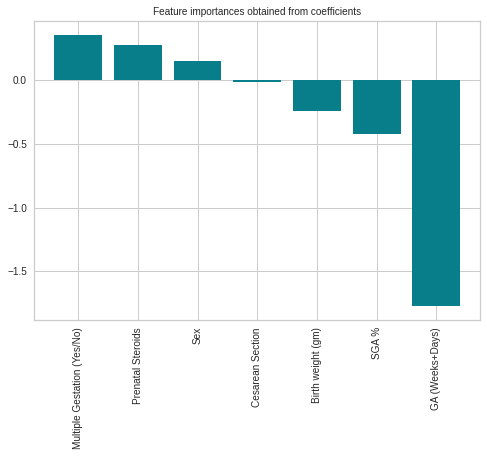

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 50
[[0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]]

Confusion matrix 50
[[49 11]
 [ 2  7]]

Accuracy 50
0.8115942028985508

Sensitivity 50
0.7777777777777778

Sensitivity 50
False Negative Rate, Logistic Regression:  0.8166666666666667

f1_score 50
0.5185185185185185
----------------------------------------------------------------------

accuracy of each fold : [0.8985507246376812, 0.855072463768116, 0.7681159420289855, 0.8695652173913043, 0.840579710144

/home/AD/sra251/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/AD/sra251/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/home/AD/sra251/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/AD/sra251/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/home/AD/sra251/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/AD/sra251/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

indices = np.arange(230)
score = []
conf_matrix_list = [] 
F1_score_list = []
roc_auc_list = []
Sensitivity_list = []
Specificity_list=[]
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
fig, ax = plt.subplots()
weight= [0,1,2,3,4,5,10,15,20,50,100]
j=1
for Random in range(50):
#for i in range(20):
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size = 0.30, stratify=y, random_state = Random) #None
    X_train.shape, X_test.shape
    print('train_set' , j)
    print(indices_train)
    #print(X_train)
    #print(y_train)
    print('\ntest_set' , j)
    print(indices_test)
    #print(X_test)
    print(y_test)
    
    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    print('\nhello' , j)
    print(X_train)
    #print(X_test)
  
    #Training the Logistic Regression model on the Training set
    classifier = LogisticRegression(random_state=0, max_iter=10, n_jobs=-1, class_weight= {0:1, 1:4})#class_weight= {0:1, 1:4}) or #'balanced' {0:1, 1:3}
    classifier.fit(X_train, y_train) #, sample_weight=np.where(y_train==1,4,1))
    print(classifier.coef_)
    importances = pd.DataFrame(data={'Attribute': X.columns,'Importance': classifier.coef_[0]})
    importances = importances.sort_values(by='Importance', ascending=False)
    plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
    plt.title('Feature importances obtained from coefficients', size=10)
    plt.xticks(rotation='vertical')
    plt.show()
    sel.get_support()
    selected_feat= X.columns[(sel.get_support())]
    len(selected_feat)
    print(selected_feat)
    
    #Predicting the Test set results
    print('\nPredicting the Test set results' , j)
    y_pred = classifier.predict(X_test)
    print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    
    #Confusion matrix
    print('\nConfusion matrix' , j)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    conf_matrix_list.append(cm)
#     plot_confusion_matrix(cm)
#     plt.title('Confusion matrix', y=1.1)
    
    #Accuracy
    print('\nAccuracy' , j)
    acc = accuracy_score(y_pred , y_test)
    print(acc)
    score.append(acc)
    
    # Sensitivity
    print('\nSensitivity' , j)
    Sensitivity= recall_score(y_test, y_pred)
    print(Sensitivity)
    Sensitivity_list.append(Sensitivity)
    
    # Specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
    print('\nSensitivity' , j)
    #FPR = fp / (tn + fp)
    #FNR =  fn / (tp + fn)
    TNR = tn / (tn+fp)
    #print('False Positive Rate, Logistic Regression: ', FPR)
    #print('False Negative Rate, Logistic Regression: ', FNR)
    print('False Negative Rate, Logistic Regression: ', TNR)
    Specificity_list.append(TNR)
    
    #f1_Score
    print('\nf1_score' , j)
    F1 = f1_score(y_test, y_pred)#, pos_label=1)
    print(F1)
    F1_score_list.append(F1)
    
    warnings.filterwarnings('ignore')
    print('----------------------------------------------------------------------')
    j=j+1
    
    # ROC Curve
    viz = plot_roc_curve(classifier, X_test, y_test,
                         name='ROC fold {}'.format(j),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()


mean_of_score= np.mean(score,axis=0)
mean_of_conf_matrix = sum(conf_matrix_list)
mean_of_Sensitivity = np.mean(Sensitivity_list, axis=0)
mean_of_Specificity = np.mean(Specificity_list, axis=0)
mean_of_F1_score = np.mean(F1_score_list, axis=0)

print('\naccuracy of each fold : {}'.format(score))
print('\nconfusion matrix of each fold : \n{}'.format(conf_matrix_list))
print('\nSensitivity of each fold : \n{}'.format(Sensitivity_list))
print('\nSpecificity of each fold : \n{}'.format(Specificity_list))
print('\nF1 score of each fold : {}'.format(F1_score_list))

print('mean of accuracy : {:.2f} %'.format(mean_of_score*100))
print('mean of confusion matrix : \n{}'.format(mean_of_conf_matrix))
print('mean of Sensitivity : {}'.format(mean_of_Sensitivity))
print('mean of Specificity : {}'.format(mean_of_Specificity))
print('mean of F1_score : {}'.format(mean_of_F1_score))

train_set 1
[ 58 180 183  43 153 189  87  11 123 214  86 124 149 211  66  80 171 198
  47 108 162   4 204 190 126  29   2  96   5 196 182 227 105 146 177 226
 110  28  70 209 165 181 107 141  73   7  82  97 212  57 156 168 161  20
  63 207  54 213  45 106  92  26 208 117  14 175  24 157 176  85 172  32
  12 140  89 160  69 113  35  19 197  42  50 137  55  68 167 185  53 164
 225 127 224 184 103 158   6 216  49 102  74  27  71 130  60 121 210 221
  99 120 122  84 148  39  67  98 201  16  13 166   0  56 139 133 178  23
 152  10  15  90  52 228 217   3 132  18 147 136 125 155  22 194 143  72
 109 215 229 174  61 111 193   8  79 142  77 114 104 119 219 188  46]

test_set 1
[195  40 173 112   1 129 151 200  44  65 203  34 159 199 170  38  78  94
  21  37 101 191  36  17 218  88  59 205 135  41 202 100 131 150 187  76
  25 115  64 154 145  95  30 134 118  93 186  33   9 169 163  51  83  91
 128 206 116  31 138  81 220 223  75 144 192 222 179  62  48]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 

train_set 2
[191   6 193 169 105 127 214 112 117 122 111 138  93 106 118 227 192 172
 197   5 130 144 190 228 216   4  61 213 148 143 108 103 209 196  41 223
  31 137 140 187 212 189  36  37  89 110  57  21  72   9 170  34  28  18
 132 155   0  95 126   2  19 185 119 120  23 200 101 107 203 102  78  62
 225 104 161 100 141  98  47  51  96  42  49  30 134 181 184 210 205 116
 207  77  90  56 202  14 199  53  50 174  40 157  11  12  85  38  46  84
 142  29  13 229 221  59 186 133 131  10  97 180  35 167 176 217 211 115
 164 128  16 124  71 183 177 139  88 194  66 182  94  65  81  63 215  60
  80 146  17  52  67 219 150  75  44 135 113 175  33 166 224  86 206]

test_set 2
[158 153 121   3  48  91  92  69 218 178 179  68  43 149  74 147  45  39
 162 114 226  70 222  25 204 156 220  76 160   8  73 198  15 154 168  58
   7  54  87 201  27 125 129 151 208 123  83 163  24  26  64  55 195  32
 188  20 159  22  82  79 165 109   1 145 171  99 136 173 152]
[0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 2
[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 2
[[57  3]
 [ 9  0]]

Accuracy 2
0.8260869565217391

Sensitivity 2
0.0

Sensitivity 2
False Negative Rate, Logistic Regression:  0.95

f1_score 2
0.0
----------------------------------------------------------------------
train_set 3
[ 23 212  11  95 192  76  72 191 198 185  77 202   9  20 104  36  60  29
 121  81 217  52 164 163 179  93 171  28 187 159  71 113  61 221 145 227
   6 210 12

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 3
[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 3
[[56  4]
 [ 6  3]]

Accuracy 3
0.855072463768116

Sensitivity 3
0.3333333333333333

Sensitivity 3
False Negative Rate, Logistic Regression:  0.9333333333333333

f1_score 3
0.375
----------------------------------------------------------------------
train_set 4
[114 108 158 121  97 122  32  63 133 190 126 220  49 185  70 138  83 123
 113 118 143  84 202 178  11 152 102 216  66 212 207  

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 4
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 4
[[58  2]
 [ 7  2]]

Accuracy 4
0.8695652173913043

Sensitivity 4
0.2222222222222222

Sensitivity 4
False Negative Rate, Logistic Regression:  0.9666666666666667

f1_score 4
0.30769230769230765
----------------------------------------------------------------------
train_set 5
[163 121 170  76  16  72 229 124  85 141 110 218 130  51 214   9  27  20
   1 104  99 132 126  87  13  92   5 14

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 5
[[0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]

Confusion matrix 5
[[57  3]
 [ 5  4]]

Accuracy 5
0.8840579710144928

Sensitivity 5
0.4444444444444444

Sensitivity 5
False Negative Rate, Logistic Regression:  0.95

f1_score 5
0.5
----------------------------------------------------------------------
train_set 6
[ 93  52 227 144  34  63 154  72  73 102  64  49 139  82 215  55 151  37
 198  90 142 167 110  17 194 221  12 224  48 191  45 213 193 170  26 

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 6
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]]

Confusion matrix 6
[[59  1]
 [ 8  1]]

Accuracy 6
0.8695652173913043

Sensitivity 6
0.1111111111111111

Sensitivity 6
False Negative Rate, Logistic Regression:  0.9833333333333333

f1_score 6
0.1818181818181818
----------------------------------------------------------------------
train_set 7
[190 213  85 111  32  95  37  93  82 108 130 196 212  75 194 136  28 187
 186 102 115  60  74  83  87  14 165 204

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 7
[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 7
[[56  4]
 [ 5  4]]

Accuracy 7
0.8695652173913043

Sensitivity 7
0.4444444444444444

Sensitivity 7
False Negative Rate, Logistic Regression:  0.9333333333333333

f1_score 7
0.47058823529411764
----------------------------------------------------------------------
train_set 8
[ 48 103 119  31 218 129  85  91 195 117 147  45  92 222  33 169 184 110
  13 136 123  38  67 128  81 161 217  5

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 8
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 8
[[57  3]
 [ 7  2]]

Accuracy 8
0.855072463768116

Sensitivity 8
0.2222222222222222

Sensitivity 8
False Negative Rate, Logistic Regression:  0.95

f1_score 8
0.2857142857142857
----------------------------------------------------------------------
train_set 9
[ 29  26  95 150 194 229 196  78 110 154  75 113 160  10 100 137 147  12
  88   0 211  60 159 128 103  90 220 133 201 119  89  2

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 9
[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]]

Confusion matrix 9
[[57  3]
 [ 5  4]]

Accuracy 9
0.8840579710144928

Sensitivity 9
0.4444444444444444

Sensitivity 9
False Negative Rate, Logistic Regression:  0.95

f1_score 9
0.5
----------------------------------------------------------------------
train_set 10
[228  99 217  60  44 205 177 199 123  15 196  39 120  86 203  79  67 109
 195  78  77  47  97 220  14 157 216 146  32 168  82  23  29 154  20

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 10
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]]

Confusion matrix 10
[[54  6]
 [ 5  4]]

Accuracy 10
0.8405797101449275

Sensitivity 10
0.4444444444444444

Sensitivity 10
False Negative Rate, Logistic Regression:  0.9

f1_score 10
0.4210526315789474
----------------------------------------------------------------------
train_set 11
[ 70 167  58  90 194  79 147 115 112 226 188 191 186  46  80 166 204  24
 170  52 168 209 121 125  69 126 157 229 192 131

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 11
[[0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 11
[[59  1]
 [ 8  1]]

Accuracy 11
0.8695652173913043

Sensitivity 11
0.1111111111111111

Sensitivity 11
False Negative Rate, Logistic Regression:  0.9833333333333333

f1_score 11
0.1818181818181818
----------------------------------------------------------------------
train_set 12
[143 181   2 138   4  12  40 188  64  42  55  65  48  62  53 133  68 101
  14 169 201 178 136 208  18  43 

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 12
[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 12
[[57  3]
 [ 8  1]]

Accuracy 12
0.8405797101449275

Sensitivity 12
0.1111111111111111

Sensitivity 12
False Negative Rate, Logistic Regression:  0.95

f1_score 12
0.15384615384615383
----------------------------------------------------------------------
train_set 13
[ 48  88  93 212 216 135 114  41  92  78 217 221 192 209 130 228 106   5
  55 176 229 105 101  26  76  50 214 162  64  

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 13
[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 13
[[59  1]
 [ 5  4]]

Accuracy 13
0.9130434782608695

Sensitivity 13
0.4444444444444444

Sensitivity 13
False Negative Rate, Logistic Regression:  0.9833333333333333

f1_score 13
0.5714285714285714
----------------------------------------------------------------------
train_set 14
[ 57 109 188  63  56 173 117 124 150 185 191  89  23  52 145 186  75  21
 146  39 164  44  78  41 147  71 

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 14
[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 14
[[59  1]
 [ 5  4]]

Accuracy 14
0.9130434782608695

Sensitivity 14
0.4444444444444444

Sensitivity 14
False Negative Rate, Logistic Regression:  0.9833333333333333

f1_score 14
0.5714285714285714
----------------------------------------------------------------------
train_set 15
[125 217 189 128 119 126 168 219  84  41  26  11 183 131 103  52  60  14
 138 107 213  72 147 174 137 229 

/home/AD/sra251/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 15
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 15
[[57  3]
 [ 8  1]]

Accuracy 15
0.8405797101449275

Sensitivity 15
0.1111111111111111

Sensitivity 15
False Negative Rate, Logistic Regression:  0.95

f1_score 15
0.15384615384615383
----------------------------------------------------------------------
train_set 16
[216  34 213  12 220  70 191  94 142 209  40 208  58  80 228  29 226 163
  51  92  73 126  76 214  81   9  53 165  30  

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 16
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 16
[[59  1]
 [ 7  2]]

Accuracy 16
0.8840579710144928

Sensitivity 16
0.2222222222222222

Sensitivity 16
False Negative Rate, Logistic Regression:  0.9833333333333333

f1_score 16
0.3333333333333333
----------------------------------------------------------------------
train_set 17
[206 102 218  35 190 217  26 100  77 155  11 164  89 199  38 174  97  10
 175  34 159 178 180 121 172 176 

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 17
[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 17
[[58  2]
 [ 8  1]]

Accuracy 17
0.855072463768116

Sensitivity 17
0.1111111111111111

Sensitivity 17
False Negative Rate, Logistic Regression:  0.9666666666666667

f1_score 17
0.16666666666666666
----------------------------------------------------------------------
train_set 18
[ 40 130  88  19 109  37 150   1 187 129 196 207 225 134 158  44   9 165
  97  58  45 176  61 143 161   4 

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 18
[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]]

Confusion matrix 18
[[56  4]
 [ 7  2]]

Accuracy 18
0.8405797101449275

Sensitivity 18
0.2222222222222222

Sensitivity 18
False Negative Rate, Logistic Regression:  0.9333333333333333

f1_score 18
0.26666666666666666
----------------------------------------------------------------------
train_set 19
[104 130  43 114  56 160 146 229 219 173  85  68 138  82 181 115 162  55
  87 180  23 117  57  24  12  90

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 19
[[0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]

Confusion matrix 19
[[57  3]
 [ 7  2]]

Accuracy 19
0.855072463768116

Sensitivity 19
0.2222222222222222

Sensitivity 19
False Negative Rate, Logistic Regression:  0.95

f1_score 19
0.2857142857142857
----------------------------------------------------------------------
train_set 20
[115 197  27 209 108 171 102  75 105  31 107 200  50 152   5  66 227 141
  38  20 143 223  79  84 116  91   3 148 222  60

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 20
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]]

Confusion matrix 20
[[53  7]
 [ 8  1]]

Accuracy 20
0.782608695652174

Sensitivity 20
0.1111111111111111

Sensitivity 20
False Negative Rate, Logistic Regression:  0.8833333333333333

f1_score 20
0.11764705882352941
----------------------------------------------------------------------
train_set 21
[155  30 109  52 193 119 123  65 222  12  84 192 122 129  55 203  47 153
 217 225  85   2 213 226  21 227 

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 21
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]]

Confusion matrix 21
[[55  5]
 [ 6  3]]

Accuracy 21
0.8405797101449275

Sensitivity 21
0.3333333333333333

Sensitivity 21
False Negative Rate, Logistic Regression:  0.9166666666666666

f1_score 21
0.35294117647058826
----------------------------------------------------------------------
train_set 22
[144 213 206  81 167 225 191  99 129 219  60 173  79  38 107  93 140   7
  14 172 161  89  54 176  41 139

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 22
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]]

Confusion matrix 22
[[55  5]
 [ 6  3]]

Accuracy 22
0.8405797101449275

Sensitivity 22
0.3333333333333333

Sensitivity 22
False Negative Rate, Logistic Regression:  0.9166666666666666

f1_score 22
0.35294117647058826
----------------------------------------------------------------------
train_set 23
[146 203 148 204   6 206  92 226  33  13 162  81 216 132  32 170  48 159
 219 183  20  44  85 213 105  21

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 23
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 23
[[59  1]
 [ 8  1]]

Accuracy 23
0.8695652173913043

Sensitivity 23
0.1111111111111111

Sensitivity 23
False Negative Rate, Logistic Regression:  0.9833333333333333

f1_score 23
0.1818181818181818
----------------------------------------------------------------------
train_set 24
[ 24 188  58  59 211 191  70 205  61  35 206  19 126 143 140 110 119 112
 137 229 221 197 142  66  11 172 

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 24
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]

Confusion matrix 24
[[60  0]
 [ 6  3]]

Accuracy 24
0.9130434782608695

Sensitivity 24
0.3333333333333333

Sensitivity 24
False Negative Rate, Logistic Regression:  1.0

f1_score 24
0.5
----------------------------------------------------------------------
train_set 25
[ 96 224 197  57   0  83  19 218 200  97 178  11 127  42 208 226  79 116
  17 196 181 125  16  27  62 103 140  23 168 163 229 219 215 12

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 25
[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 25
[[56  4]
 [ 5  4]]

Accuracy 25
0.8695652173913043

Sensitivity 25
0.4444444444444444

Sensitivity 25
False Negative Rate, Logistic Regression:  0.9333333333333333

f1_score 25
0.47058823529411764
----------------------------------------------------------------------
train_set 26
[224 129 175  32  45  13 170  85 215  91   0  66 107 159  62  16  17  54
  84  37 206  19  33 145  48  27

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 26
[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]]

Confusion matrix 26
[[59  1]
 [ 6  3]]

Accuracy 26
0.8985507246376812

Sensitivity 26
0.3333333333333333

Sensitivity 26
False Negative Rate, Logistic Regression:  0.9833333333333333

f1_score 26
0.46153846153846156
----------------------------------------------------------------------
train_set 27
[ 80 193 127 174 130 207  25  43  90 113  83  71  31 216  92  98 135 158
  44 215 149 104 141 199  78  36

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 27
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]]

Confusion matrix 27
[[59  1]
 [ 6  3]]

Accuracy 27
0.8985507246376812

Sensitivity 27
0.3333333333333333

Sensitivity 27
False Negative Rate, Logistic Regression:  0.9833333333333333

f1_score 27
0.46153846153846156
----------------------------------------------------------------------
train_set 28
[ 99  73   9 136 105 134 190 170  81  28  45 217 174 180 126 227 171  10
   8  79 130  14  51 215 187  40

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 28
[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]]

Confusion matrix 28
[[57  3]
 [ 6  3]]

Accuracy 28
0.8695652173913043

Sensitivity 28
0.3333333333333333

Sensitivity 28
False Negative Rate, Logistic Regression:  0.95

f1_score 28
0.4
----------------------------------------------------------------------
train_set 29
[106  11 177  77 108 121 131 151 138 104 152 206  74 218 134  57 179 142
 155 168 140 227 210 200 149  97 196 194  20 116 160 162  35 1

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 29
[[0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]]

Confusion matrix 29
[[57  3]
 [ 6  3]]

Accuracy 29
0.8695652173913043

Sensitivity 29
0.3333333333333333

Sensitivity 29
False Negative Rate, Logistic Regression:  0.95

f1_score 29
0.4
----------------------------------------------------------------------
train_set 30
[ 91  39  73  54 204 224 214 157  68 219 146  37 175  22 140 176  30 147
 134 112 184  59 215 208 197  72  25 126  18  56  75 154   7  

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 30
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 30
[[55  5]
 [ 6  3]]

Accuracy 30
0.8405797101449275

Sensitivity 30
0.3333333333333333

Sensitivity 30
False Negative Rate, Logistic Regression:  0.9166666666666666

f1_score 30
0.35294117647058826
----------------------------------------------------------------------
train_set 31
[198 126  28  35  67  47 138 168  37 172 174  92 144  91  85  96   0 114
  25 124  65 101 128 193  24 137

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 31
[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 31
[[58  2]
 [ 8  1]]

Accuracy 31
0.855072463768116

Sensitivity 31
0.1111111111111111

Sensitivity 31
False Negative Rate, Logistic Regression:  0.9666666666666667

f1_score 31
0.16666666666666666
----------------------------------------------------------------------
train_set 32
[ 85 184 188 191  70 102   3 223  81  32  97 202  75 155 207  19  37  80
 149  38 136 118 214 169  56  52 

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 32
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]]

Confusion matrix 32
[[57  3]
 [ 6  3]]

Accuracy 32
0.8695652173913043

Sensitivity 32
0.3333333333333333

Sensitivity 32
False Negative Rate, Logistic Regression:  0.95

f1_score 32
0.4
----------------------------------------------------------------------
train_set 33
[ 80  13  36 228 213  52 206  27 188  23 121 117 162 137  96 194  78  59
 145 147  66  53 195 203  81 120 204 172  64  22 170  39  38  

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 33
[[0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 33
[[55  5]
 [ 7  2]]

Accuracy 33
0.8260869565217391

Sensitivity 33
0.2222222222222222

Sensitivity 33
False Negative Rate, Logistic Regression:  0.9166666666666666

f1_score 33
0.25
----------------------------------------------------------------------
train_set 34
[ 24 104 108 173 100 187  21 130 140  17 219   4 217  76   2 176 123 122
  43 208 134 212  15 214 146 129  46  75  52  1

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 34
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 34
[[58  2]
 [ 8  1]]

Accuracy 34
0.855072463768116

Sensitivity 34
0.1111111111111111

Sensitivity 34
False Negative Rate, Logistic Regression:  0.9666666666666667

f1_score 34
0.16666666666666666
----------------------------------------------------------------------
train_set 35
[ 70  46 202  15  62 124  92 128  99  26 116 200 201  14 223  96  48  24
 216 117  53 188   6 110 125 121 

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 35
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 35
[[57  3]
 [ 9  0]]

Accuracy 35
0.8260869565217391

Sensitivity 35
0.0

Sensitivity 35
False Negative Rate, Logistic Regression:  0.95

f1_score 35
0.0
----------------------------------------------------------------------
train_set 36
[ 85   7  96  81 132 102 184 223 173  67 107   8 182 110 205  37   4  12
  84  39  82  33 185 175 176 192  92  26  29 104  83  34 117 135  50 124
 146

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 36
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]]

Confusion matrix 36
[[59  1]
 [ 6  3]]

Accuracy 36
0.8985507246376812

Sensitivity 36
0.3333333333333333

Sensitivity 36
False Negative Rate, Logistic Regression:  0.9833333333333333

f1_score 36
0.46153846153846156
----------------------------------------------------------------------
train_set 37
[ 85  43  64  40  37 130 178  86  68  71 214  30 216  36 164  15 148 157
 106 109  73  97 187 107 165   2

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 37
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]

Confusion matrix 37
[[57  3]
 [ 7  2]]

Accuracy 37
0.855072463768116

Sensitivity 37
0.2222222222222222

Sensitivity 37
False Negative Rate, Logistic Regression:  0.95

f1_score 37
0.2857142857142857
----------------------------------------------------------------------
train_set 38
[142 119  16 218 140  40 125 115 139  83 220  32  88 100  43 224  39 138
 160 185  27  31  13  28  61  58  99  24  29 132

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 38
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 38
[[58  2]
 [ 6  3]]

Accuracy 38
0.8840579710144928

Sensitivity 38
0.3333333333333333

Sensitivity 38
False Negative Rate, Logistic Regression:  0.9666666666666667

f1_score 38
0.42857142857142855
----------------------------------------------------------------------
train_set 39
[212 164  92 136 187  64 211 119 200 130   1  33 155 138  15 148 124 185
  99  96 191 167  42   9 149  72

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 39
[[0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]]

Confusion matrix 39
[[56  4]
 [ 8  1]]

Accuracy 39
0.8260869565217391

Sensitivity 39
0.1111111111111111

Sensitivity 39
False Negative Rate, Logistic Regression:  0.9333333333333333

f1_score 39
0.14285714285714285
----------------------------------------------------------------------
train_set 40
[ 66 179 195 172 187 189 131  34  17  67 151 174 125 106 115 146  30 180
 190 223 152  99 212  61  92  28

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 40
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]]

Confusion matrix 40
[[58  2]
 [ 5  4]]

Accuracy 40
0.8985507246376812

Sensitivity 40
0.4444444444444444

Sensitivity 40
False Negative Rate, Logistic Regression:  0.9666666666666667

f1_score 40
0.5333333333333333
----------------------------------------------------------------------
train_set 41
[ 24  37 141 120  52  65  58 189  57  86 195  18  21  53 150  47  39   0
 221  71 126  49  51  48 134 115 

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 41
[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 41
[[58  2]
 [ 9  0]]

Accuracy 41
0.8405797101449275

Sensitivity 41
0.0

Sensitivity 41
False Negative Rate, Logistic Regression:  0.9666666666666667

f1_score 41
0.0
----------------------------------------------------------------------
train_set 42
[163  32 207  24 110  11 194 119 196   2  41  10  86 201 156  48 213 133
  14 193  53 171 216 117  28  63  78   8  44  39 179  71 189 13

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 42
[[1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 42
[[58  2]
 [ 7  2]]

Accuracy 42
0.8695652173913043

Sensitivity 42
0.2222222222222222

Sensitivity 42
False Negative Rate, Logistic Regression:  0.9666666666666667

f1_score 42
0.30769230769230765
----------------------------------------------------------------------
train_set 43
[113 145 137  84 144 110  40 160 198  74  49  46  33 155 117 200  25 216
 212  99 207  10 178 108 205 175

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 43
[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]]

Confusion matrix 43
[[55  5]
 [ 6  3]]

Accuracy 43
0.8405797101449275

Sensitivity 43
0.3333333333333333

Sensitivity 43
False Negative Rate, Logistic Regression:  0.9166666666666666

f1_score 43
0.35294117647058826
----------------------------------------------------------------------
train_set 44
[195 191 127 169  87  46  92 168 158  98 121  68   2 110   9 148   0  82
  41 183 161 203  42 166 134  44

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 44
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 44
[[58  2]
 [ 7  2]]

Accuracy 44
0.8695652173913043

Sensitivity 44
0.2222222222222222

Sensitivity 44
False Negative Rate, Logistic Regression:  0.9666666666666667

f1_score 44
0.30769230769230765
----------------------------------------------------------------------
train_set 45
[216 157  58  13 182  43  38  98 210  88 227  25 180   3 111  49 140  52
 107  92  11 112 215  26 222 178

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 45
[[0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 45
[[57  3]
 [ 6  3]]

Accuracy 45
0.8695652173913043

Sensitivity 45
0.3333333333333333

Sensitivity 45
False Negative Rate, Logistic Regression:  0.95

f1_score 45
0.4
----------------------------------------------------------------------
train_set 46
[ 72  21  76 204 109  82 137 195 127 175 132  46 213  78 207  25   4  10
 145 102 150  43   1 173  53 142 217  56 134  23 210  81 192 2

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 46
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]]

Confusion matrix 46
[[58  2]
 [ 7  2]]

Accuracy 46
0.8695652173913043

Sensitivity 46
0.2222222222222222

Sensitivity 46
False Negative Rate, Logistic Regression:  0.9666666666666667

f1_score 46
0.30769230769230765
----------------------------------------------------------------------
train_set 47
[142 101 158  46  84  11 220  56  20  17  98  13 152  31  51 192  18  85
 196 109 218 201 191  95 202  88

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 47
[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 47
[[58  2]
 [ 6  3]]

Accuracy 47
0.8840579710144928

Sensitivity 47
0.3333333333333333

Sensitivity 47
False Negative Rate, Logistic Regression:  0.9666666666666667

f1_score 47
0.42857142857142855
----------------------------------------------------------------------
train_set 48
[168 144 124  27 163 175  40 217 106   0 122 221  15   6 216 110 150 178
  41 143  93  63 183  80 224  87

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 48
[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]]

Confusion matrix 48
[[56  4]
 [ 6  3]]

Accuracy 48
0.855072463768116

Sensitivity 48
0.3333333333333333

Sensitivity 48
False Negative Rate, Logistic Regression:  0.9333333333333333

f1_score 48
0.375
----------------------------------------------------------------------
train_set 49
[163   3  11  94 156 229 132  89 191  82  90 134 217 205  86  59 155 116
  58 118 207 103  47 130   4 199 135   1 195 21

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 49
[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 49
[[59  1]
 [ 7  2]]

Accuracy 49
0.8840579710144928

Sensitivity 49
0.2222222222222222

Sensitivity 49
False Negative Rate, Logistic Regression:  0.9833333333333333

f1_score 49
0.3333333333333333
----------------------------------------------------------------------
train_set 50
[137  32  53  13  26  87 215  86 217 185  78 100  52   9 130 183 160  35
 139  44  97   1 154 208  17  90 

Index(['GA (Weeks+Days)', 'Birth weight (gm)', 'SGA %'], dtype='object')

Predicting the Test set results 50
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]]

Confusion matrix 50
[[56  4]
 [ 8  1]]

Accuracy 50
0.8260869565217391

Sensitivity 50
0.1111111111111111

Sensitivity 50
False Negative Rate, Logistic Regression:  0.9333333333333333

f1_score 50
0.14285714285714285
----------------------------------------------------------------------


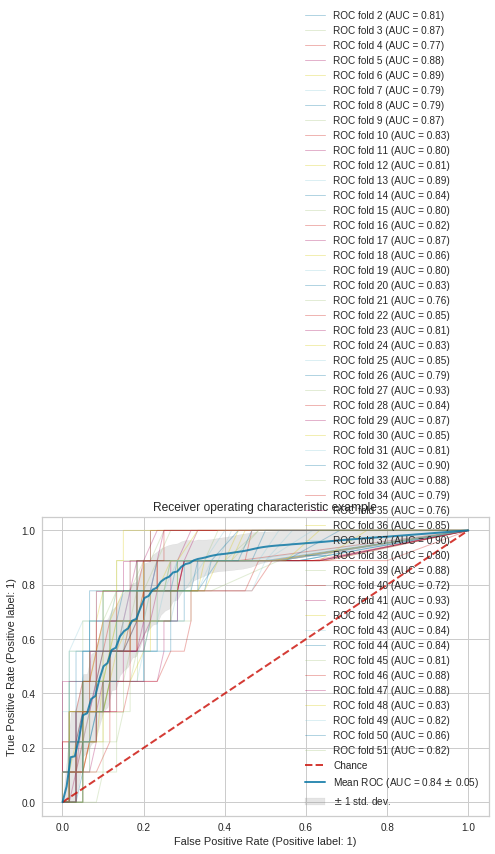


accuracy of each fold : [0.8840579710144928, 0.8260869565217391, 0.855072463768116, 0.8695652173913043, 0.8840579710144928, 0.8695652173913043, 0.8695652173913043, 0.855072463768116, 0.8840579710144928, 0.8405797101449275, 0.8695652173913043, 0.8405797101449275, 0.9130434782608695, 0.9130434782608695, 0.8405797101449275, 0.8840579710144928, 0.855072463768116, 0.8405797101449275, 0.855072463768116, 0.782608695652174, 0.8405797101449275, 0.8405797101449275, 0.8695652173913043, 0.9130434782608695, 0.8695652173913043, 0.8985507246376812, 0.8985507246376812, 0.8695652173913043, 0.8695652173913043, 0.8405797101449275, 0.855072463768116, 0.8695652173913043, 0.8260869565217391, 0.855072463768116, 0.8260869565217391, 0.8985507246376812, 0.855072463768116, 0.8840579710144928, 0.8260869565217391, 0.8985507246376812, 0.8405797101449275, 0.8695652173913043, 0.8405797101449275, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8840579710144928, 0.855072463768116, 0.8840579710144928, 0.8

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

indices = np.arange(230)
score = []
conf_matrix_list = [] 
F1_score_list = []
roc_auc_list = []
Sensitivity_list = []
Specificity_list=[]
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
fig, ax = plt.subplots()
weight= [0,1,2,3,4,5,10,15,20,50,100]
j=1
for Random in range(50):
#for i in range(20):
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size = 0.30, stratify=y, random_state = Random) #None
    X_train.shape, X_test.shape
    print('train_set' , j)
    print(indices_train)
    #print(X_train)
    #print(y_train)
    print('\ntest_set' , j)
    print(indices_test)
    #print(X_test)
    print(y_test)
    
    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    print('\nhello' , j)
    print(X_train)
    #print(X_test)
  
    #Training the  Random Forest model on the Training set
    classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0,class_weight= {0:1, 1:4})
    classifier.fit(X_train, y_train)
    sel = SelectFromModel(classifier)
    sel.fit(X_train, y_train)
    sel.get_support()
    selected_feat= X.columns[(sel.get_support())]
    len(selected_feat)
    print(selected_feat)
    
    #Predicting the Test set results
    print('\nPredicting the Test set results' , j)
    y_pred = classifier.predict(X_test)
    print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    
    #Confusion matrix
    print('\nConfusion matrix' , j)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    conf_matrix_list.append(cm)
#     plot_confusion_matrix(cm)
#     plt.title('Confusion matrix', y=1.1)
    
    #Accuracy
    print('\nAccuracy' , j)
    acc = accuracy_score(y_pred , y_test)
    print(acc)
    score.append(acc)
    
    # Sensitivity
    print('\nSensitivity' , j)
    Sensitivity= recall_score(y_test, y_pred)
    print(Sensitivity)
    Sensitivity_list.append(Sensitivity)
    
    # Specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
    print('\nSensitivity' , j)
    #FPR = fp / (tn + fp)
    #FNR =  fn / (tp + fn)
    TNR = tn / (tn+fp)
    #print('False Positive Rate, Logistic Regression: ', FPR)
    #print('False Negative Rate, Logistic Regression: ', FNR)
    print('False Negative Rate, Logistic Regression: ', TNR)
    Specificity_list.append(TNR)
    
    #f1_Score
    print('\nf1_score' , j)
    F1 = f1_score(y_test, y_pred)#, pos_label=1)
    print(F1)
    F1_score_list.append(F1)
    
    warnings.filterwarnings('ignore')
    print('----------------------------------------------------------------------')
    j=j+1
    
    # ROC Curve
    viz = plot_roc_curve(classifier, X_test, y_test,
                         name='ROC fold {}'.format(j),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()


mean_of_score= np.mean(score,axis=0)
mean_of_conf_matrix = sum(conf_matrix_list)
mean_of_Sensitivity = np.mean(Sensitivity_list, axis=0)
mean_of_Specificity = np.mean(Specificity_list, axis=0)
mean_of_F1_score = np.mean(F1_score_list, axis=0)

print('\naccuracy of each fold : {}'.format(score))
print('\nconfusion matrix of each fold : \n{}'.format(conf_matrix_list))
print('\nSensitivity of each fold : \n{}'.format(Sensitivity_list))
print('\nSpecificity of each fold : \n{}'.format(Specificity_list))
print('\nF1 score of each fold : {}'.format(F1_score_list))

print('mean of accuracy : {:.2f} %'.format(mean_of_score*100))
print('mean of confusion matrix : \n{}'.format(mean_of_conf_matrix))
print('mean of Sensitivity : {}'.format(mean_of_Sensitivity))
print('mean of Specificity : {}'.format(mean_of_Specificity))
print('mean of F1_score : {}'.format(mean_of_F1_score))

train_set 1
[ 58 180 183  43 153 189  87  11 123 214  86 124 149 211  66  80 171 198
  47 108 162   4 204 190 126  29   2  96   5 196 182 227 105 146 177 226
 110  28  70 209 165 181 107 141  73   7  82  97 212  57 156 168 161  20
  63 207  54 213  45 106  92  26 208 117  14 175  24 157 176  85 172  32
  12 140  89 160  69 113  35  19 197  42  50 137  55  68 167 185  53 164
 225 127 224 184 103 158   6 216  49 102  74  27  71 130  60 121 210 221
  99 120 122  84 148  39  67  98 201  16  13 166   0  56 139 133 178  23
 152  10  15  90  52 228 217   3 132  18 147 136 125 155  22 194 143  72
 109 215 229 174  61 111 193   8  79 142  77 114 104 119 219 188  46]

test_set 1
[195  40 173 112   1 129 151 200  44  65 203  34 159 199 170  38  78  94
  21  37 101 191  36  17 218  88  59 205 135  41 202 100 131 150 187  76
  25 115  64 154 145  95  30 134 118  93 186  33   9 169 163  51  83  91
 128 206 116  31 138  81 220 223  75 144 192 222 179  62  48]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 

[[ 0.07023472 -1.19534478 -1.03155347 -1.81617712 -3.11982906  0.82285074
  -0.63245553]
 [ 0.3800372   0.15084624 -1.03155347  0.14214597  0.32053038  0.82285074
  -0.63245553]
 [-1.09152458 -0.75689071  0.9694117   0.06534899  0.32053038  0.82285074
   1.58113883]
 [-1.1689752  -1.33921253 -1.03155347 -1.27859823  0.32053038  0.82285074
  -0.63245553]
 [ 0.3800372   1.28123565  0.9694117   1.52449168  0.32053038 -1.21528724
  -0.63245553]
 [-0.23956776 -1.45910231 -1.03155347 -1.93137259  0.32053038  0.82285074
  -0.63245553]
 [ 0.61238906  0.44200715  0.9694117  -0.04984649  0.32053038  0.82285074
  -0.63245553]
 [ 1.5417965   1.486761    0.9694117   0.14214597  0.32053038  0.82285074
  -0.63245553]
 [-0.7817221  -0.75689071  0.9694117  -0.54902688  0.32053038  0.82285074
  -0.63245553]
 [-0.394469   -0.38009424  0.9694117  -0.16504197  0.32053038 -1.21528724
   1.58113883]
 [-0.08466652 -1.0309245  -1.03155347 -1.58578617  0.32053038  0.82285074
  -0.63245553]
 [ 0.84474092  1.0585

AxesSubplot(0.125,0.125;0.775x0.755)
GA (Weeks+Days)               -0.0
Birth weight (gm)             -0.0
Sex                            0.0
SGA %                         -0.0
Prenatal Steroids              0.0
Cesarean Section              -0.0
Multiple Gestation (Yes/No)    0.0
dtype: float64

Predicting the Test set results 5
[[0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]]

Confusion matrix 5
[[52  8]
 [ 2  7]]

Accuracy 5
0.855072463768116

Sensitivity 5
0.7777777777777778

Sensitivity 5
False Negative Rate, Logistic Regression:  0.8666666666666667

f1_

Sensitivity 7
False Negative Rate, Logistic Regression:  0.8

f1_score 7
0.4444444444444444
----------------------------------------------------------------------
train_set 8
[ 48 103 119  31 218 129  85  91 195 117 147  45  92 222  33 169 184 110
  13 136 123  38  67 128  81 161 217  58   7 201  64 200 101 125 194  59
  72  68 152 170 145 209 135 150 160 118 224  11  53 185  41  27  75 171
 181 182 114 112 227 121 122  74 131 211  17 146  42  50 148 107  89 179
 108 143 180 221 109  55 229  95  99   8 205 183  12 177  98  73  60  26
 213  22 127  52 198 130 188  51  39 104 196  62  16  28  43 149 134 212
  76 141 154  49  69  24 207 138  94  66   2  15 189 159 120 164  20  34
 158  18 175 137 208  30  29 225 157 140  84 162  77 192 151  14 186 111
  88   5 202  65  87 172 214  93 115  97 176  21  57 216  54   3   9]

test_set 8
[203  61   4   0 133 156  37 223 116 168 220  83 197  46  36 187 173  78
 124   6 132  90  10 139  96  79 178 142 155 226 215  80 163 166 106  86
  82 193  56 

[[ 1.09591399e+00  1.47160403e+00 -9.93807990e-01  1.06965207e+00
   3.32181919e-01  7.50404422e-01 -6.42090883e-01]
 [-8.54122077e-01 -8.28064217e-01 -9.93807990e-01 -7.23016158e-02
   3.32181919e-01  7.50404422e-01 -6.42090883e-01]
 [-1.64858122e+00 -1.05803104e+00 -9.93807990e-01  8.85465991e-01
   3.32181919e-01 -1.33261475e+00 -6.42090883e-01]
 [ 5.90349083e-01 -9.26621428e-01 -9.93807990e-01 -1.72997632e+00
   3.32181919e-01  7.50404422e-01 -6.42090883e-01]
 [ 4.45901967e-01  1.20878480e+00  1.00623059e+00  7.01279913e-01
   3.32181919e-01 -1.33261475e+00 -6.42090883e-01]
 [-1.50413410e+00 -9.26621428e-01  1.00623059e+00  4.80256619e-01
   3.32181919e-01  7.50404422e-01  1.55741193e+00]
 [ 8.47841768e-02 -1.71016146e-01 -9.93807990e-01 -7.23016158e-02
   3.32181919e-01  7.50404422e-01  1.55741193e+00]
 [ 8.79243315e-01  1.58658745e+00  1.00623059e+00  1.25383815e+00
   3.32181919e-01  7.50404422e-01 -6.42090883e-01]
 [ 1.38480822e+00  1.24163721e+00  1.00623059e+00 -3.54644002e-0

AxesSubplot(0.125,0.125;0.775x0.755)
GA (Weeks+Days)               -0.0
Birth weight (gm)             -0.0
Sex                            0.0
SGA %                         -0.0
Prenatal Steroids              0.0
Cesarean Section              -0.0
Multiple Gestation (Yes/No)    0.0
dtype: float64

Predicting the Test set results 13
[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 13
[[55  5]
 [ 3  6]]

Accuracy 13
0.8840579710144928

Sensitivity 13
0.6666666666666666

Sensitivity 13
False Negative Rate, Logistic Regression:  0.916666666666666

AxesSubplot(0.125,0.125;0.775x0.755)
GA (Weeks+Days)               -0.0
Birth weight (gm)             -0.0
Sex                            0.0
SGA %                         -0.0
Prenatal Steroids              0.0
Cesarean Section              -0.0
Multiple Gestation (Yes/No)    0.0
dtype: float64

Predicting the Test set results 16
[[1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 16
[[47 13]
 [ 0  9]]

Accuracy 16
0.8115942028985508

Sensitivity 16
1.0

Sensitivity 16
False Negative Rate, Logistic Regression:  0.7833333333333333

f1_score 16


train_set 18
[ 40 130  88  19 109  37 150   1 187 129 196 207 225 134 158  44   9 165
  97  58  45 176  61 143 161   4 190  85 204   5 162 177  50 114 159  65
 169 193  51  75 218 100 198 205 178 221  94  92 142  74  18 206  78 141
 123  93 184 101 227  13 144 146 186  67  14  80 154  95  87  30 113 115
 156  91  16 208  39 183 167  49 185 116 135 108 181 170  36 220 107  76
 118 180  42  25 203 157 137  98 228 229 133 148  82 119 138  11 166  23
 189 171 174  77 226  86 111 163 179   0   3 128 145 112 200 212  35  48
  59 173 223 222 126  60  24 120  89 103 155  57  72 122 224  99 175 213
  31 140 102  52 217 121 168 127 105 106  84 110  66  81 210  90  47]

test_set 18
[ 38  55  83  15  62  29 136 211 139  54  10  73  34 151 219  32  20  27
 195  64 125 153 182 202 104 209 124  96 172 214  43 188  21   7  33  28
 199   6 149 160 117  69  71 152 197  63  41  56  70 215  22  17 216 147
 164 132  68  79 192 194  12 201   8 131  46  26  53 191   2]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 

train_set 20
[115 197  27 209 108 171 102  75 105  31 107 200  50 152   5  66 227 141
  38  20 143 223  79  84 116  91   3 148 222  60 162 199 157 144 211 170
   8 121  49 133  68 129  24 187  51 130 118 149 224   6 185 155  89  33
  97 146 179  13 181  56 189  40 136   2 150 210 226 167   1 180  35  88
 177 216 225 159  16 126 164  29 160 166 174  18 212 132  76   0   7  63
 100  70 228 112 208 125  23  44  28  78 123 217  45  94 213  14  74 184
  92 229 103 220 195  67 134 192  86 169 219 153 173  42 202 218  65 104
  47  39 172 206 168 165  25 109  62  57  30 205  83  36 142 161  43 190
 188  32 147 131 207  26 176  69 135 221 120  96  72  81 178 163  87]

test_set 20
[145  61 158 193  19  54  34 214 128  15  10 215 175 201  82  90 114  46
  22  77  80 124 139 111  71   9 196 138 198 156 140  41  37  21 117  64
  73 183  95  12  98 191 203  11  52 110 186 127 194  59  58  93 151 182
 113 119 101  48 204 106   4  53  55  85 122 137  99 154  17]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 

train_set 22
[144 213 206  81 167 225 191  99 129 219  60 173  79  38 107  93 140   7
  14 172 161  89  54 176  41 139 212 194 159  72 120 122 201  47  95  50
 179  53  46  44 108 183 142  11 182 155 147  36 154 165  31  29 130 211
  85 166 110 222   2 125  34 148 105 203 186 171  51 106 198 118 181  90
  98  26 100 164 128 104  16 178  74 117 132  58  17 196 146 214  43 221
  21  49  40  69 131  68 127 174 163 169 187 189   6   1 204 112  13 115
 141 228  23  91  86 102 224 158   3 149  45 205 114 119  62 210  88 202
   0  42 208  84 223 193  10 157  19 153   9 101 168 207  96  48 185  57
  20 215  75 190 109  56  22  33  78  39 229 160 220  64 200  61 192]

test_set 22
[156  80  63  59 227 143  25 199  92 103 135  28 133  94 197 226  87 180
 136 151  82  71 195  65 188  97 217  37  52  12 123   8 170   5 145  15
  18 124  30 116 216 218 126 111  73  27 113  70 134 150  66 121  32  24
  67 209  77 177  55 152   4 175 162 137  35  76  83 184 138]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 

AxesSubplot(0.125,0.125;0.775x0.755)
GA (Weeks+Days)               -0.0
Birth weight (gm)             -0.0
Sex                            0.0
SGA %                         -0.0
Prenatal Steroids              0.0
Cesarean Section              -0.0
Multiple Gestation (Yes/No)    0.0
dtype: float64

Predicting the Test set results 24
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]

Confusion matrix 24
[[52  8]
 [ 4  5]]

Accuracy 24
0.8260869565217391

Sensitivity 24
0.5555555555555556

Sensitivity 24
False Negative Rate, Logistic Regression:  0.866666666666666

hello 27
[[ 3.37724834e-01  1.73219055e+00 -9.81536874e-01  1.60147144e+00
   3.20530382e-01  8.12276932e-01  1.51185789e+00]
 [-1.48201072e+00 -1.24146006e+00 -9.81536874e-01 -2.33394578e-01
   3.20530382e-01  8.12276932e-01 -6.61437828e-01]
 [-3.90169386e-01 -1.95780723e-01  1.01881043e+00  4.16453804e-01
   3.20530382e-01  8.12276932e-01 -6.61437828e-01]
 [-1.04527418e+00 -4.08184337e-01  1.01881043e+00  1.10452856e+00
   3.20530382e-01  8.12276932e-01 -6.61437828e-01]
 [-6.08537652e-01 -9.77482855e-02 -9.81536874e-01  1.21920769e+00
   3.20530382e-01  8.12276932e-01 -6.61437828e-01]
 [-1.55480014e+00 -1.04539518e+00 -9.81536874e-01  7.98717559e-01
   3.20530382e-01  8.12276932e-01 -6.61437828e-01]
 [-3.90169386e-01 -1.04539518e+00  1.01881043e+00 -1.72422322e+00
   3.20530382e-01  8.12276932e-01 -6.61437828e-01]
 [-2.62222762e-02 -2.93813160e-01 -9.81536874e-01 -9.21469336e-01
   3.20530382e-01  8.12276932e-01 -6.61437828e-01]
 [-1.70037898e+00 -1.14342762e+00  1.01881043e+00  1.10


Sensitivity 28
False Negative Rate, Logistic Regression:  0.85

f1_score 28
0.6666666666666666
----------------------------------------------------------------------
train_set 29
[106  11 177  77 108 121 131 151 138 104 152 206  74 218 134  57 179 142
 155 168 140 227 210 200 149  97 196 194  20 116 160 162  35 111 166  39
 221 204 203  86 120  46  32  37 109 195  13 136  54 188   6 189 208 212
  81  64  15 125 119 165 145 157 103  72 211 175  19 137 190  36 176  89
 135 161 193 129  18  68  88  76 113 143  47  14 187  91  41 144  90 201
  94 132  53   9  85  24  52  21  31  23  55 207  63  40 163  73 156 192
 172 114 126  66  67 225  87 128  80  45  38 202 124  58 178 153 182  98
 217 127 122 213 146  29  93  75 224 216  61 170 112 139  28  78 199 102
   0 205  84  44  60 169  59 105  50  48  16  51 226  70 101  42 118]

test_set 29
[ 10  71 185 133  12  92 173   8 222 107 150  99  56   2  65   3 100 229
  96 117   4 148 223 209 123 164  22 191 115  82 186   5 184  26 215  79
  62  4

train_set 30
[ 91  39  73  54 204 224 214 157  68 219 146  37 175  22 140 176  30 147
 134 112 184  59 215 208 197  72  25 126  18  56  75 154   7  19  61 149
  85   5 159 167  58 116 145  87 216 119 211  96  57 153  43 195  92  17
 185  67 210   6  94  33  12 223 220  88 191 141 200 180 190  84 198 227
  52  10 138 188  40 108 160   8 199  82 164  86 163 137  99  29  44  21
  47   0 179 158  32 111  38 100  93 114  71 131 102 122 132   9 222 228
 121 142 192 143 181 171 218   2 104 165 113  81  63 106 212 135 178 225
 161  48  64 151  49 166 105 123 226  28 103 130  60 155 125  35 128 144
  41  83  98  79  14  45 168  70 124 101 213 206 156  69  95 186 209]

test_set 30
[118  50 109 136 189  23  51 169 172  89  27  66 127  62  55   4 221 201
  15 183 202 205 129  11 187  76  97  34  78 110 115  42 229  24  53  20
   3 117  16 194  31  26  80 217  74 170  77 174  65  90 133 203 139 150
 162  46 120 173 148 152 177   1  36 107  13 193 196 207 182]
[0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 

AxesSubplot(0.125,0.125;0.775x0.755)
GA (Weeks+Days)               -0.0
Birth weight (gm)             -0.0
Sex                            0.0
SGA %                         -0.0
Prenatal Steroids              0.0
Cesarean Section              -0.0
Multiple Gestation (Yes/No)    0.0
dtype: float64

Predicting the Test set results 32
[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]]

Confusion matrix 32
[[53  7]
 [ 1  8]]

Accuracy 32
0.8840579710144928

Sensitivity 32
0.8888888888888888

Sensitivity 32
False Negative Rate, Logistic Regression:  0.883333333333333

train_set 35
[ 70  46 202  15  62 124  92 128  99  26 116 200 201  14 223  96  48  24
 216 117  53 188   6 110 125 121 222 150  87 101  25   3 159  22  80 193
 213  66 171 146 152 182 219 196 157  34  41  74 199 203  52 112 164 228
  61 187   0 178  32 108 194  75  16 129 138 120  95 224   9 192 141 214
  47  56 195 172 229 149 105 122  78 168 226 163 165 218 212 181  51 217
  57  35   4 126  86 127  82  49 151 104  69 183  71 111  17  85 144  10
  90  76 176  29  59 140  54 174 173  12 191  63 166  42 132   8 180  67
  60  30 169  11 221  91 185   2  55 225   7  50  93  64 114 147  84 167
  58  94  89 207  73 106  43 204 100 139 175 145 153 215 134 210  68]

test_set 35
[ 44 137  88 113 205  33 109 102 227 177   1 162  98 115 130 107 161  79
 119 206 198   5 160  77 186 118  28 155  81 123 220 197 158  31 184  45
 133 142  13 148 154  36  21 208  37  40  27  19 189  39  38 131  20 135
 103  65  23 170 211 209  97  83 136 179 190  18  72 143 156]
[0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 

InSample_accuracy
MAE: 0.20723861797966803
MSE: 0.0895861870315109
RMSE: 0.2993095171081449
R2 Score: 0.21014845100551238
---------------------------
OutSample_accuracy
MAE: 0.2151187877016409
MSE: 0.09603853367342333
RMSE: 0.30990084490595265
R2 Score: 0.1532602614459846
AxesSubplot(0.125,0.125;0.775x0.755)
GA (Weeks+Days)               -0.0
Birth weight (gm)             -0.0
Sex                            0.0
SGA %                         -0.0
Prenatal Steroids              0.0
Cesarean Section              -0.0
Multiple Gestation (Yes/No)    0.0
dtype: float64

Predicting the Test set results 37
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [


hello 39
[[ 3.82636262e-01  1.42952622e-01 -9.93807990e-01  1.12130177e-01
   2.83790262e-01  7.20324874e-01 -6.51750536e-01]
 [ 1.19419174e+00  1.40328623e+00  1.00623059e+00  5.69167099e-01
   2.83790262e-01  7.20324874e-01  1.53432939e+00]
 [ 1.37474106e-02 -2.43549684e-01 -9.93807990e-01 -7.83018743e-02
   2.83790262e-01  7.20324874e-01  1.53432939e+00]
 [-7.24030293e-01 -3.44376373e-01  1.00623059e+00  6.45339919e-01
   2.83790262e-01 -1.38826249e+00 -6.51750536e-01]
 [-1.60936354e+00 -1.41986105e+00 -9.93807990e-01 -8.01943667e-01
   2.83790262e-01 -1.38826249e+00  1.53432939e+00]
 [ 1.12041397e+00  2.26974862e-01  1.00623059e+00 -1.18280777e+00
   2.83790262e-01 -1.38826249e+00 -6.51750536e-01]
 [ 6.77747344e-01  1.30245954e+00 -9.93807990e-01  1.40706812e+00
   2.83790262e-01  7.20324874e-01 -6.51750536e-01]
 [-8.71585834e-01 -5.12420854e-01 -9.93807990e-01  9.11944790e-01
   2.83790262e-01 -1.38826249e+00 -6.51750536e-01]
 [-8.71585834e-01 -7.81292023e-01  1.00623059e+00 -3.8


hello 41
[[ 5.02459065e-01  8.73553099e-02  1.00623059e+00 -5.99898212e-01
   2.70801280e-01  7.50404422e-01 -6.90698357e-01]
 [ 5.02459065e-01  1.43524884e+00 -9.93807990e-01  1.57642250e+00
  -3.69274473e+00  7.50404422e-01 -6.90698357e-01]
 [-4.22946953e-01 -6.57533222e-01 -9.93807990e-01 -4.12284358e-01
   2.70801280e-01  7.50404422e-01 -6.90698357e-01]
 [ 1.19651358e+00  1.61260326e+00 -9.93807990e-01  1.08862647e+00
   2.70801280e-01 -1.33261475e+00 -6.90698357e-01]
 [-1.42547014e+00 -9.76771164e-01 -9.93807990e-01  6.75875996e-01
   2.70801280e-01  7.50404422e-01  1.44781002e+00]
 [ 1.50498225e+00 -2.49618074e-01 -9.93807990e-01 -1.61301302e+00
   2.70801280e-01  7.50404422e-01  1.44781002e+00]
 [-1.34835297e+00 -9.41300282e-01  1.00623059e+00  4.66121377e-04
   2.70801280e-01  7.50404422e-01  1.44781002e+00]
 [-1.14478281e-01 -4.44707927e-01 -9.93807990e-01 -3.74761587e-01
   2.70801280e-01  7.50404422e-01  1.44781002e+00]
 [-1.34835297e+00 -6.93004104e-01  1.00623059e+00  8.2

AxesSubplot(0.125,0.125;0.775x0.755)
GA (Weeks+Days)               -0.0
Birth weight (gm)             -0.0
Sex                            0.0
SGA %                         -0.0
Prenatal Steroids              0.0
Cesarean Section              -0.0
Multiple Gestation (Yes/No)    0.0
dtype: float64

Predicting the Test set results 41
[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]]

Confusion matrix 41
[[51  9]
 [ 3  6]]

Accuracy 41
0.8260869565217391

Sensitivity 41
0.6666666666666666

Sensitivity 41
False Negative Rate, Logistic Regression:  0.85

f1_score 41

AxesSubplot(0.125,0.125;0.775x0.755)
GA (Weeks+Days)               -0.0
Birth weight (gm)             -0.0
Sex                            0.0
SGA %                         -0.0
Prenatal Steroids              0.0
Cesarean Section              -0.0
Multiple Gestation (Yes/No)    0.0
dtype: float64

Predicting the Test set results 43
[[0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]]

Confusion matrix 43
[[45 15]
 [ 1  8]]

Accuracy 43
0.7681159420289855

Sensitivity 43
0.8888888888888888

Sensitivity 43
False Negative Rate, Logistic Regression:  0.75

f1_score 43

AxesSubplot(0.125,0.125;0.775x0.755)
GA (Weeks+Days)               -0.0
Birth weight (gm)             -0.0
Sex                            0.0
SGA %                         -0.0
Prenatal Steroids              0.0
Cesarean Section              -0.0
Multiple Gestation (Yes/No)    0.0
dtype: float64

Predicting the Test set results 45
[[0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 45
[[49 11]
 [ 0  9]]

Accuracy 45
0.8405797101449275

Sensitivity 45
1.0

Sensitivity 45
False Negative Rate, Logistic Regression:  0.8166666666666667

f1_score 45


AxesSubplot(0.125,0.125;0.775x0.755)
GA (Weeks+Days)               -0.0
Birth weight (gm)             -0.0
Sex                            0.0
SGA %                         -0.0
Prenatal Steroids              0.0
Cesarean Section              -0.0
Multiple Gestation (Yes/No)    0.0
dtype: float64

Predicting the Test set results 47
[[0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 47
[[55  5]
 [ 2  7]]

Accuracy 47
0.8985507246376812

Sensitivity 47
0.7777777777777778

Sensitivity 47
False Negative Rate, Logistic Regression:  0.916666666666666

MAE: 0.22490419902465708
MSE: 0.09003306582821176
RMSE: 0.300055104652815
R2 Score: 0.20620846961459993
AxesSubplot(0.125,0.125;0.775x0.755)
GA (Weeks+Days)               -0.0
Birth weight (gm)             -0.0
Sex                            0.0
SGA %                         -0.0
Prenatal Steroids              0.0
Cesarean Section              -0.0
Multiple Gestation (Yes/No)    0.0
dtype: float64

Predicting the Test set results 49
[[1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]

Confusion matrix 49
[[47 13]
 [ 0  9]]

Accuracy 49
0.8115942028985508

Sensit

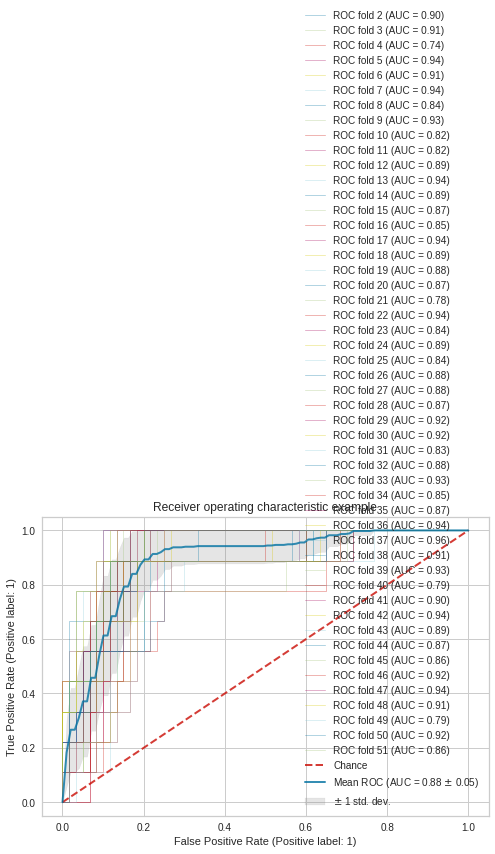

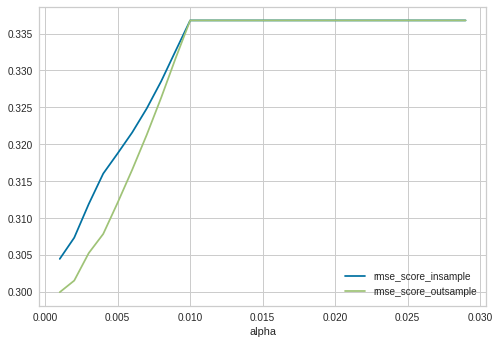

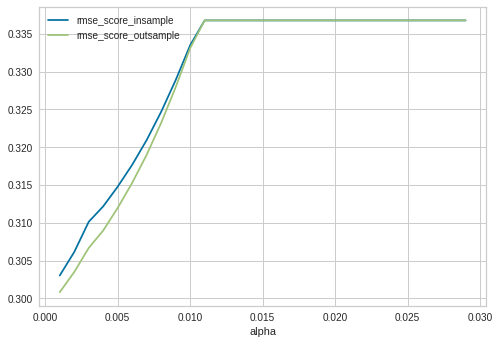

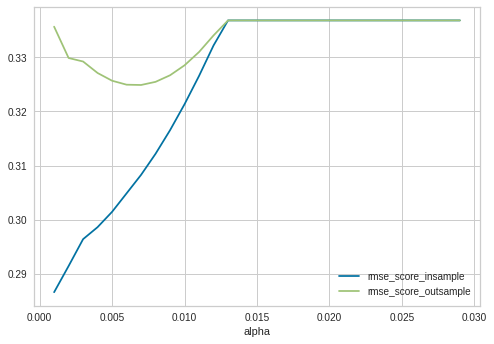

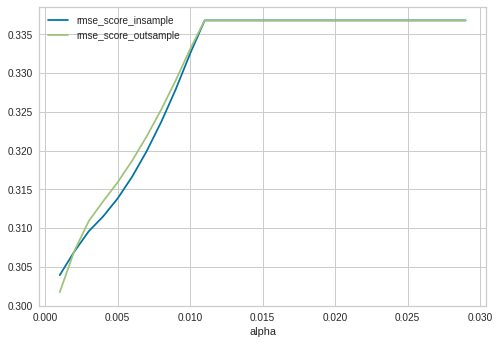

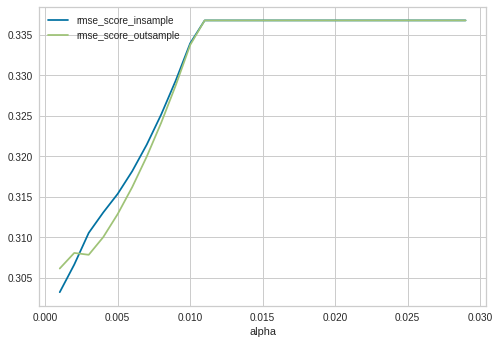

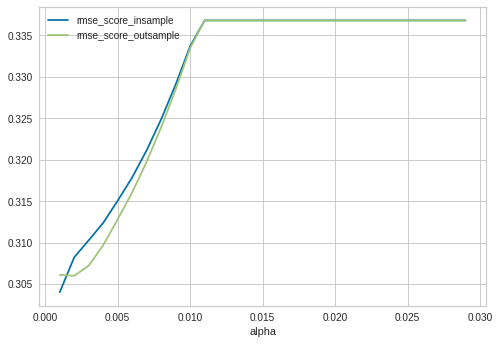

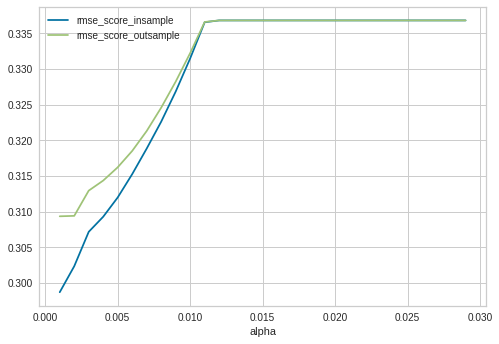

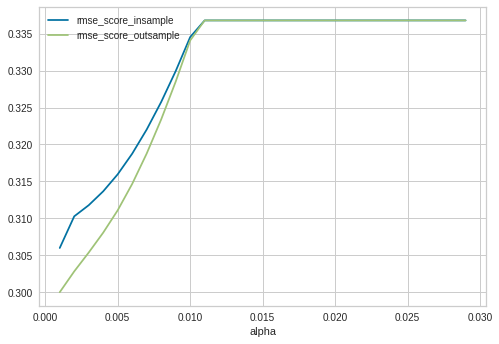

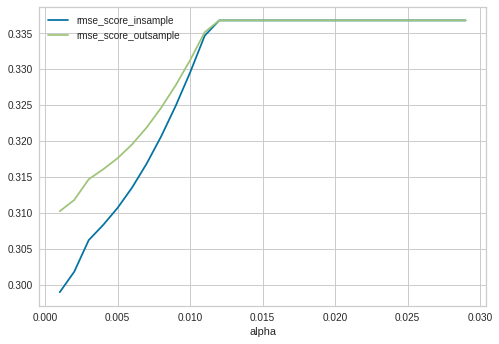

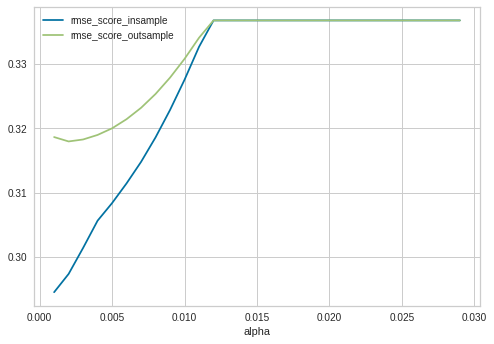

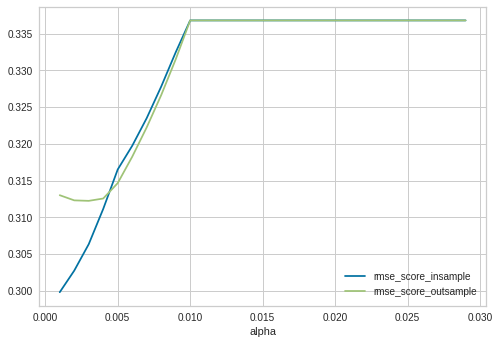

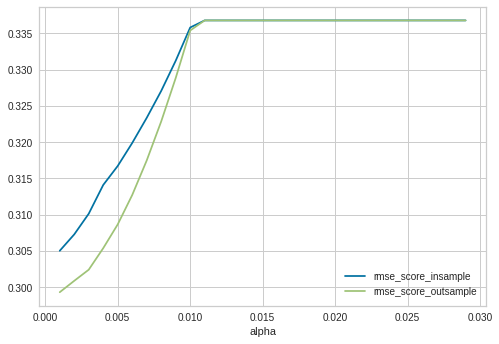

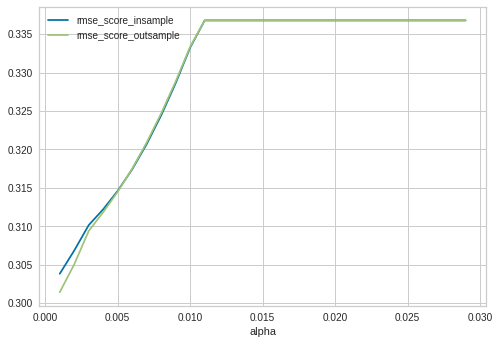

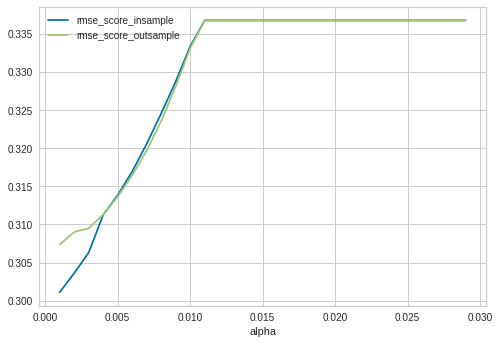

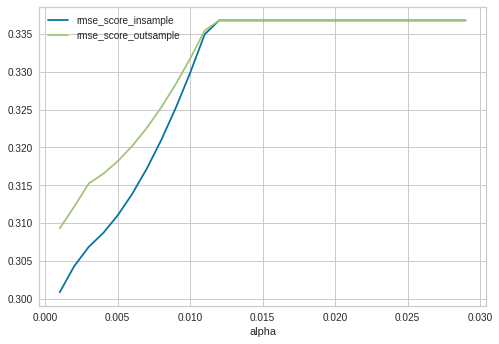

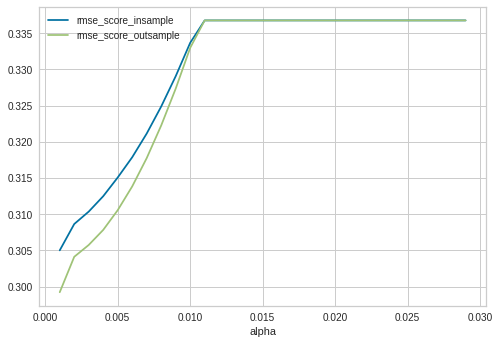

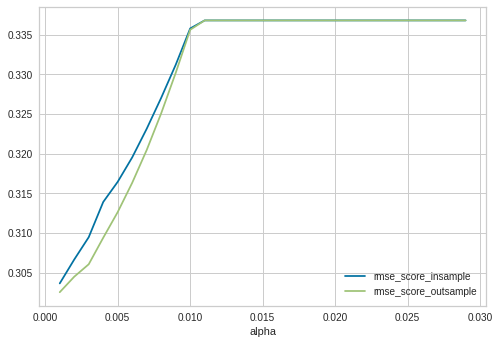

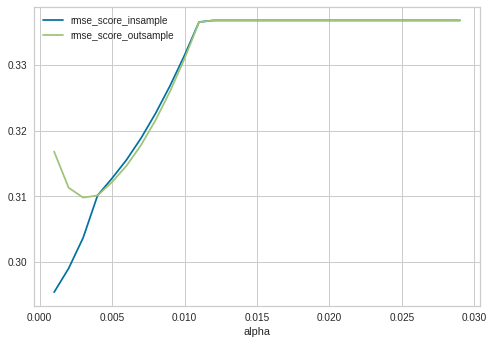

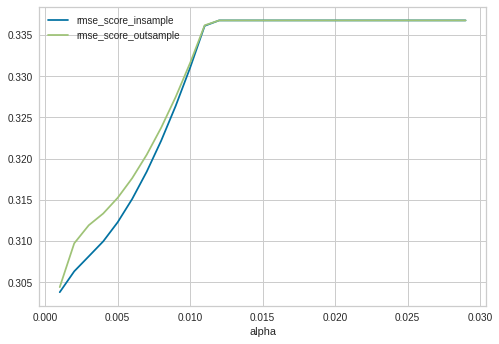

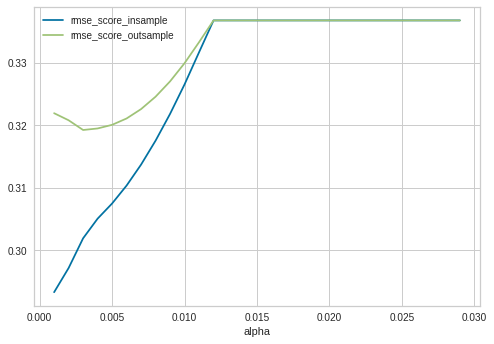

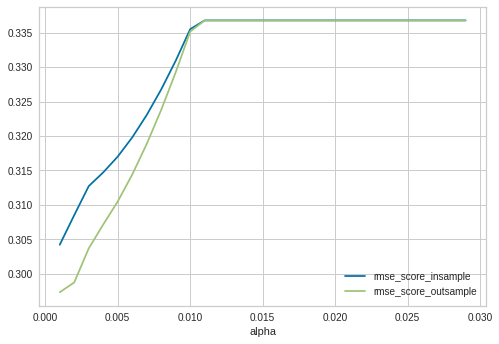

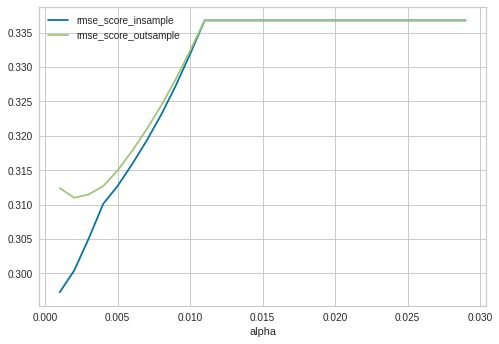

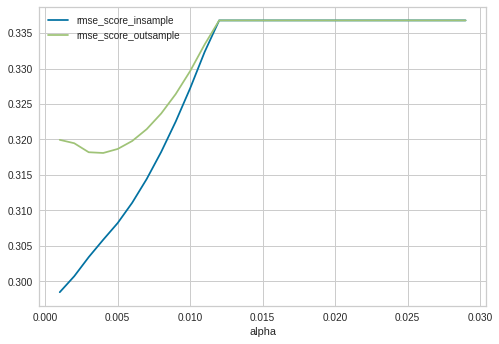

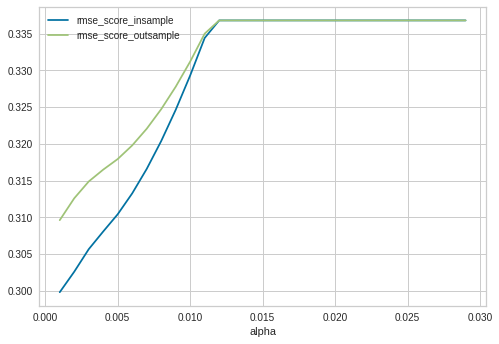

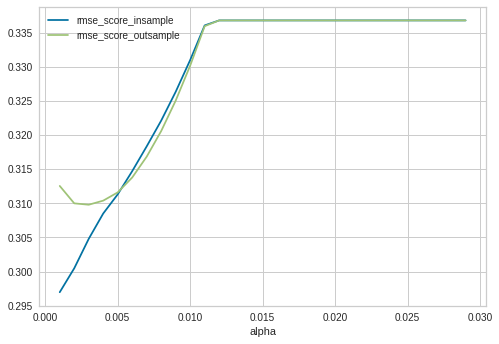

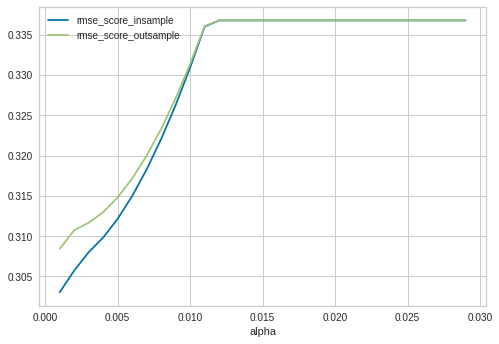

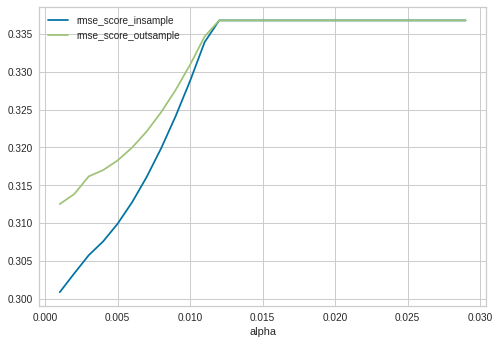

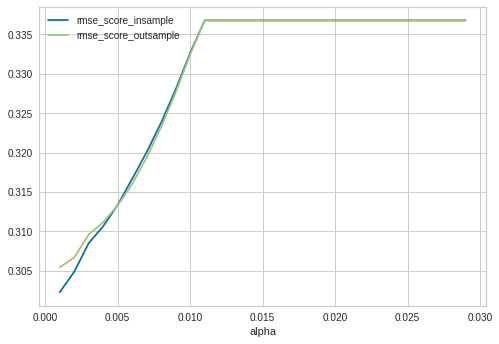

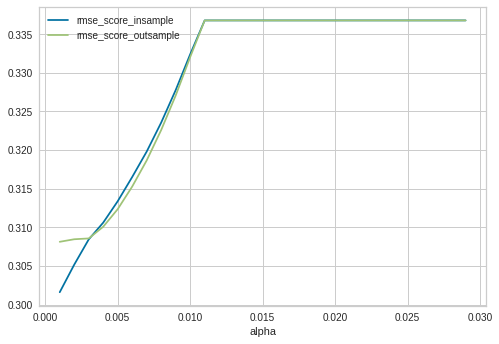

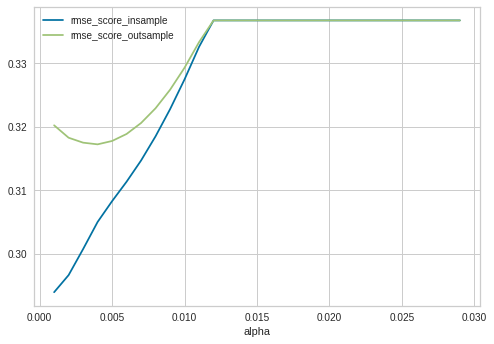

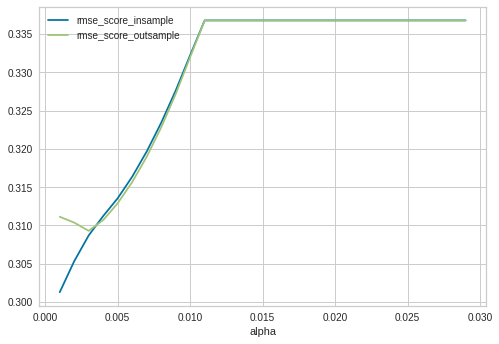

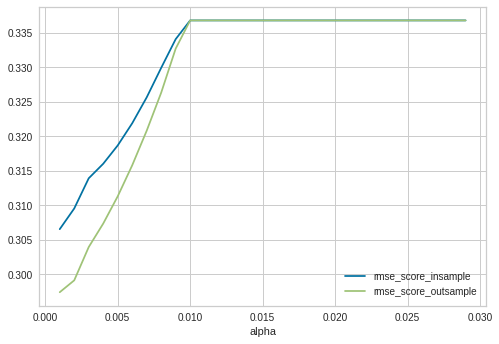

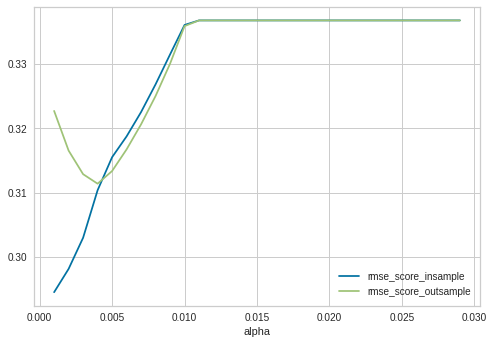

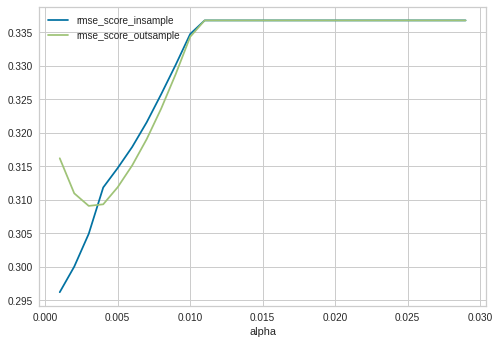

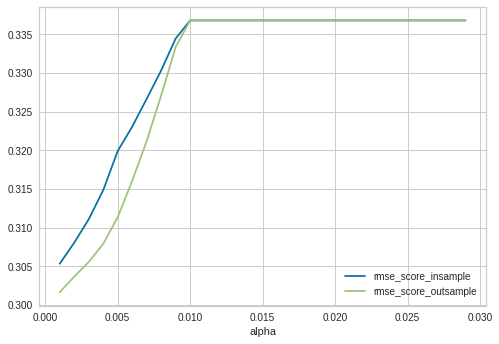

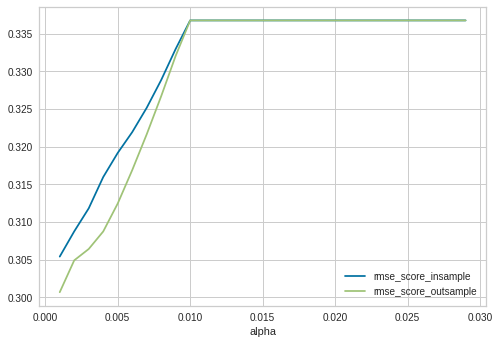

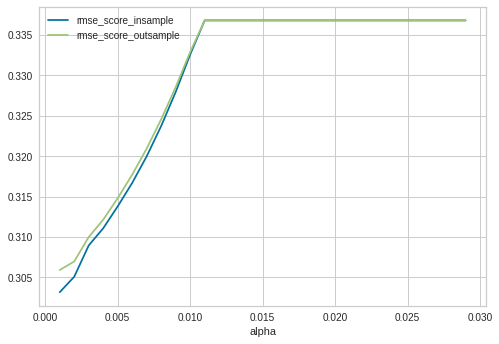

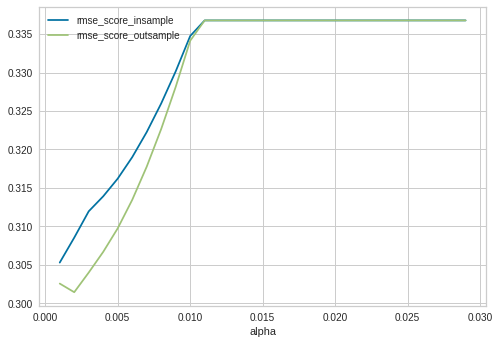

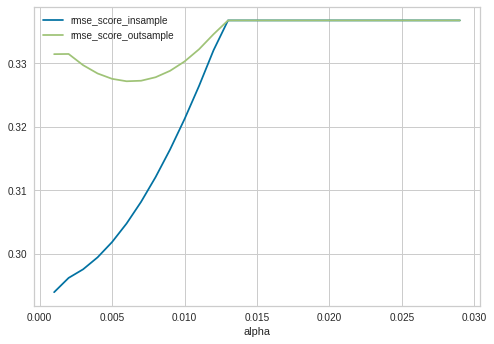

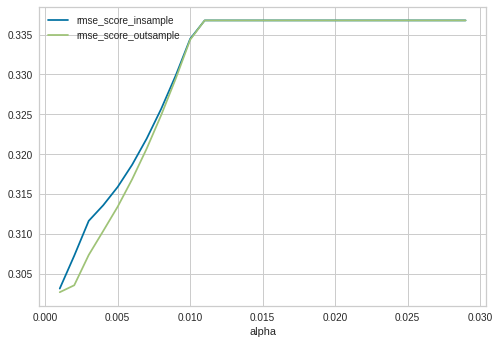

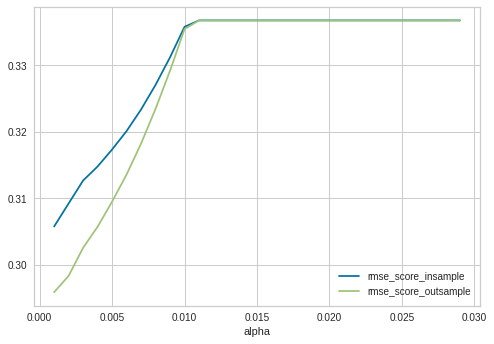

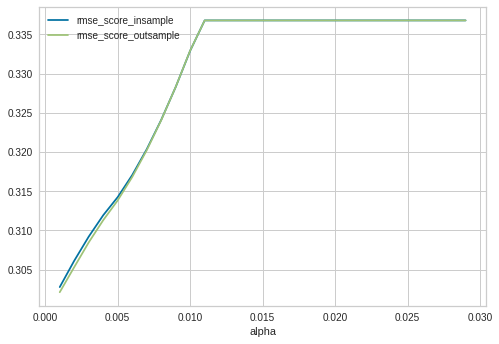

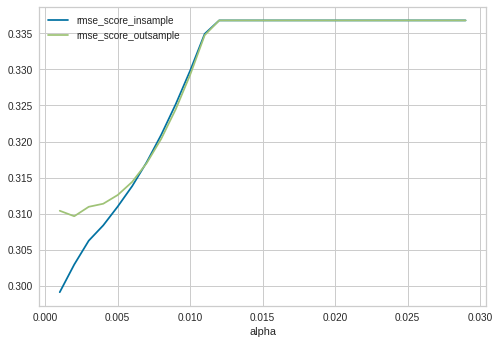

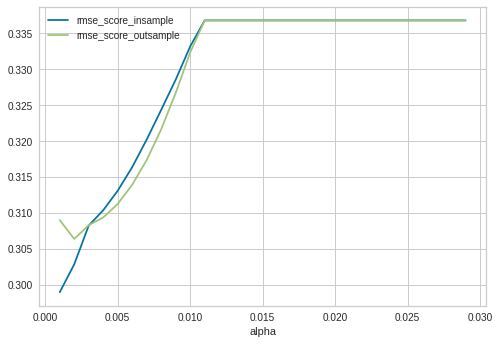

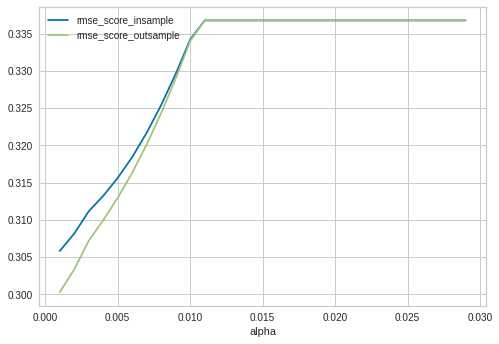

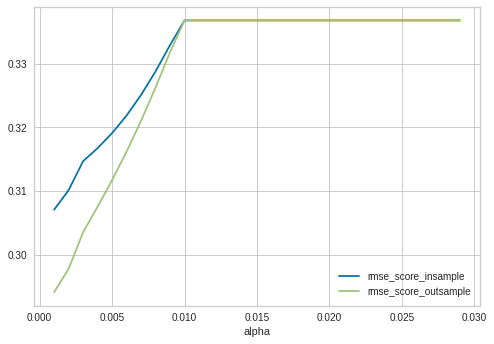

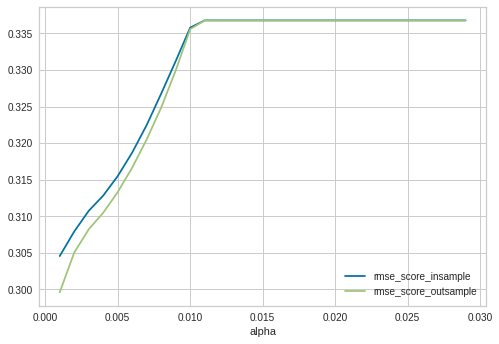

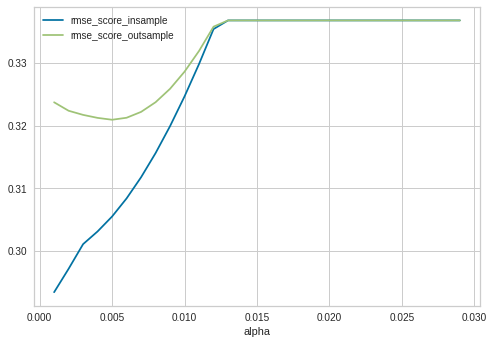

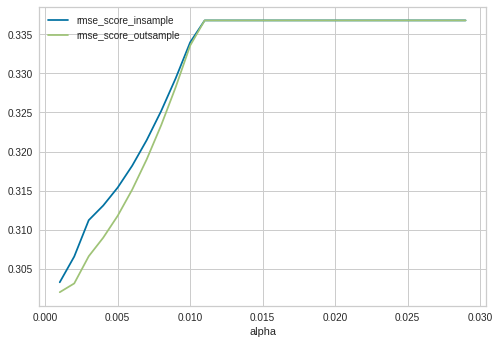

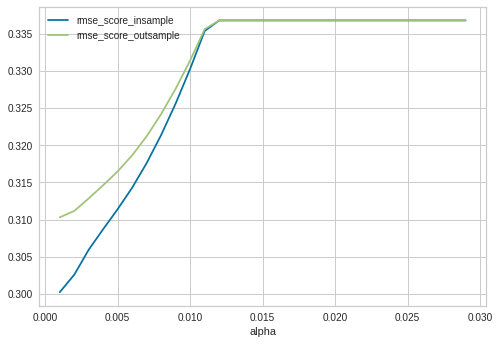


accuracy of each fold : [0.8985507246376812, 0.8695652173913043, 0.7536231884057971, 0.8840579710144928, 0.855072463768116, 0.8840579710144928, 0.782608695652174, 0.8405797101449275, 0.8115942028985508, 0.8260869565217391, 0.8985507246376812, 0.8840579710144928, 0.8840579710144928, 0.8840579710144928, 0.8405797101449275, 0.8115942028985508, 0.8985507246376812, 0.8405797101449275, 0.8115942028985508, 0.782608695652174, 0.8405797101449275, 0.8260869565217391, 0.855072463768116, 0.8260869565217391, 0.8115942028985508, 0.855072463768116, 0.782608695652174, 0.8695652173913043, 0.8115942028985508, 0.7681159420289855, 0.8695652173913043, 0.8840579710144928, 0.8260869565217391, 0.8405797101449275, 0.8695652173913043, 0.8985507246376812, 0.8115942028985508, 0.855072463768116, 0.7536231884057971, 0.855072463768116, 0.8260869565217391, 0.855072463768116, 0.7681159420289855, 0.8260869565217391, 0.8405797101449275, 0.8985507246376812, 0.8985507246376812, 0.7971014492753623, 0.8115942028985508, 0.8

In [234]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn import linear_model
from sklearn import metrics

indices = np.arange(230)
score = []
conf_matrix_list = [] 
F1_score_list = []
roc_auc_list = []
Sensitivity_list = []
Specificity_list=[]
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
fig, ax = plt.subplots()
weight= [0,1,2,3,4,5,10,15,20,50,100]
j=1
for Random in range(50):
#for i in range(20):
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size = 0.30, stratify=y, random_state = Random) #None
    X_train.shape, X_test.shape
    print('train_set' , j)
    print(indices_train)
    #print(X_train)
    #print(y_train)
    print('\ntest_set' , j)
    print(indices_test)
    #print(X_test)
    print(y_test)

    # Feature Scaling
    sc = preprocessing.StandardScaler().fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)
    print('\nhello' , j)
    print(X_train)
    #print(X_test)

    #Training the Lasso Regression model on the Training set
    #Linear Regression
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    #predictions on train data
    x_pred = lm.predict(X_train)
    x_pred = x_pred.reshape(-1,1)
    #Prediction of test data
    y_pred = lm.predict(X_test)
    y_pred= y_pred.reshape(-1,1)
    def scores_(y,x):
        print('MAE:', metrics.mean_absolute_error(y, x))
        print('MSE:', metrics.mean_squared_error(y, x))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y, x)))
        print('R2 Score:' ,metrics.r2_score(y,x))
    print('InSample_accuracy')
    scores_(y_train, x_pred)
    print('---------------------------')
    print('OutSample_accuracy')
    scores_(y_test,y_pred)

    def regularization(model,alpha_range):
        rmse_score_insample=[]
        rmse_score_outsample=[]
        r2_score_insample=[]
        r2_score_outsample=[]
        for i in alpha_range:
            regularization = model(alpha=i,normalize=True)
            regularization.fit(X_train,y_train)
            y_pred_train = regularization.predict(X_train)
            y_pred_train = y_pred_train.reshape(-1,1)
            y_pred_test=regularization.predict(X_test)
            y_pred_test = y_pred_test.reshape(-1,1)
            rmse_score_insample.append(np.sqrt(metrics.mean_squared_error(y_train,y_pred_train )))
            rmse_score_outsample.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
            r2_score_insample.append(metrics.r2_score(y_train, y_pred_train))
            r2_score_outsample.append(metrics.r2_score(y_test, y_pred_test))
        df=pd.DataFrame()
        df['alpha']=alpha_range
        df['rmse_score_insample'] = rmse_score_insample
        df['rmse_score_outsample']= rmse_score_outsample 
        df['r2_score_insample'] = r2_score_insample
        df['r2_score_outsample'] = r2_score_outsample
        return df.plot(x = 'alpha', y = ['rmse_score_insample', 'rmse_score_outsample'])
    alpha_range_lasso = np.arange(0.001,0.03,0.001)
    print(regularization(Lasso,alpha_range_lasso))
    
    print(pd.Series(lasso.coef_, index = X.columns ))
    
    #Predicting the Test set results
    print('\nPredicting the Test set results' , j)
    y_pred = classifier.predict(X_test)
    print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    
    #Confusion matrix
    print('\nConfusion matrix' , j)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    conf_matrix_list.append(cm)
#     plot_confusion_matrix(cm)
#     plt.title('Confusion matrix', y=1.1)
    
    #Accuracy
    print('\nAccuracy' , j)
    acc = accuracy_score(y_pred , y_test)
    print(acc)
    score.append(acc)
    
    # Sensitivity
    print('\nSensitivity' , j)
    Sensitivity= recall_score(y_test, y_pred)
    print(Sensitivity)
    Sensitivity_list.append(Sensitivity)
    
    # Specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
    print('\nSensitivity' , j)
    #FPR = fp / (tn + fp)
    #FNR =  fn / (tp + fn)
    TNR = tn / (tn+fp)
    #print('False Positive Rate, Logistic Regression: ', FPR)
    #print('False Negative Rate, Logistic Regression: ', FNR)
    print('False Negative Rate, Logistic Regression: ', TNR)
    Specificity_list.append(TNR)
    
    #f1_Score
    print('\nf1_score' , j)
    F1 = f1_score(y_test, y_pred)#, pos_label=1)
    print(F1)
    F1_score_list.append(F1)
    
    warnings.filterwarnings('ignore')
    print('----------------------------------------------------------------------')
    j=j+1
    
    # ROC Curve
    viz = plot_roc_curve(classifier, X_test, y_test,
                         name='ROC fold {}'.format(j),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()


mean_of_score= np.mean(score,axis=0)
mean_of_conf_matrix = sum(conf_matrix_list)
mean_of_Sensitivity = np.mean(Sensitivity_list, axis=0)
mean_of_Specificity = np.mean(Specificity_list, axis=0)
mean_of_F1_score = np.mean(F1_score_list, axis=0)

print('\naccuracy of each fold : {}'.format(score))
print('\nconfusion matrix of each fold : \n{}'.format(conf_matrix_list))
print('\nSensitivity of each fold : \n{}'.format(Sensitivity_list))
print('\nSpecificity of each fold : \n{}'.format(Specificity_list))
print('\nF1 score of each fold : {}'.format(F1_score_list))

print('mean of accuracy : {:.2f} %'.format(mean_of_score*100))
print('mean of confusion matrix : \n{}'.format(mean_of_conf_matrix))
print('mean of Sensitivity : {}'.format(mean_of_Sensitivity))
print('mean of Specificity : {}'.format(mean_of_Specificity))
print('mean of F1_score : {}'.format(mean_of_F1_score))

## Backward Elimination 

In [ ]:
# X_new = np.append(arr=np.ones((230,1)).astype(int),values = new_X1, axis = 1)
# X_new.shape

In [ ]:
# X_new_opt = X_new[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
# X_new_opt

In [ ]:
# Regressor_OLS = sm.OLS(endog=y, exog= X_new_opt)
# results = Regressor_OLS.fit()
# results.summary()

In [ ]:
# X_new_opt = X_new[:,[0,1,2,3,4,5,6,7,8,9,11]]
# Regressor_OLS = sm.OLS(endog=y, exog= X_new_opt)
# results = Regressor_OLS.fit()
# results.summary()

In [ ]:
# X_new_opt = X_new[:,[0,2,3,4,5,6,7,8,9,11]]
# Regressor_OLS = sm.OLS(endog=y, exog= X_new_opt)
# results = Regressor_OLS.fit()
# results.summary()

In [ ]:
# X_new_opt = X_new[:,[0,3,4,5,6,7,8,9,11]]
# Regressor_OLS = sm.OLS(endog=y, exog= X_new_opt)
# results = Regressor_OLS.fit()
# results.summary()

In [ ]:
# X_new_opt = X_new[:,[0,3,4,5,6,7,8,9]]
# Regressor_OLS = sm.OLS(endog=y, exog= X_new_opt)
# results = Regressor_OLS.fit()
# results.summary()

In [ ]:
# X_new_opt = X_new[:,[0,3,4,5,6,7,8]]
# Regressor_OLS = sm.OLS(endog=y, exog= X_new_opt)
# results = Regressor_OLS.fit()
# results.summary()

In [ ]:
# X_new_opt = X_new[:,[0,3,4,6,7,8]]
# Regressor_OLS = sm.OLS(endog=y, exog= X_new_opt)
# results = Regressor_OLS.fit()
# results.summary()

In [ ]:
# X_new_opt = X_new[:,[0,3,4,6,8]]
# Regressor_OLS = sm.OLS(endog=y, exog= X_new_opt)
# results = Regressor_OLS.fit()
# results.summary()

In [ ]:
# X_new_opt = X_new[:,[0,3,4,6]]
# Regressor_OLS = sm.OLS(endog=y, exog= X_new_opt)
# results = Regressor_OLS.fit()
# results.summary()

## Logistic regressor

In [ ]:
# X1_new = np.append(arr=np.ones((230,1)).astype(int),values = new_X1, axis = 1)
# X_new.shape

In [ ]:
# X_new1_opt = X1_new[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
# X_new1_opt

In [ ]:
# Log_Reg = sm.Logit(endog=y, exog= X_new1_opt)
# results = Log_Reg.fit()
# results.summary()

In [ ]:
# X_new1_opt = X_new[:,[0,2,3,4,5,6,7,8,9,10,11]]
# Log_Reg = sm.Logit(endog=y, exog= X_new1_opt)
# results = Log_Reg.fit()
# results.summary()

In [ ]:
# X_new1_opt = X_new[:,[0,3,4,5,6,7,8,9,10,11]]
# Log_Reg = sm.Logit(endog=y, exog= X_new1_opt)
# results = Log_Reg.fit()
# results.summary()

In [ ]:
# X_new1_opt = X_new[:,[0,4,5,6,7,8,9,10,11,12]]
# Log_Reg = sm.Logit(endog=y, exog= X_new1_opt)
# results = Log_Reg.fit()
# results.summary()

In [ ]:
# X_new1_opt = X_new[:,[0,4,6,7,8,9,10,11,12]]
# Log_Reg = sm.Logit(endog=y, exog= X_new1_opt)
# results = Log_Reg.fit()
# results.summary()

In [ ]:
# X_new1_opt = X_new[:,[0,4,6,7,8,9,11,12]]
# Log_Reg = sm.Logit(endog=y, exog= X_new1_opt)
# results = Log_Reg.fit()
# results.summary()

In [ ]:
# X_new1_opt = X_new[:,[0,4,6,7,8,9,11]]
# Log_Reg = sm.Logit(endog=y, exog= X_new1_opt)
# results = Log_Reg.fit()
# results.summary()

In [ ]:
# X_new1_opt = X_new[:,[0,4,6,7,8,11]]
# Log_Reg = sm.Logit(endog=y, exog= X_new1_opt)
# results = Log_Reg.fit()
# results.summary()

In [ ]:
# X_new1_opt = X_new[:,[0,4,6,7,8]]
# Log_Reg = sm.Logit(endog=y, exog= X_new1_opt)
# results = Log_Reg.fit()
# results.summary()

In [ ]:
# X_new1_opt = X_new[:,[0,4,6,8]]
# Log_Reg = sm.Logit(endog=y, exog= X_new1_opt)
# results = Log_Reg.fit()
# results.summary()

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

In [ ]:
#print(X_train)

In [ ]:
#print(y_train)

In [ ]:
#print(X_test)

In [ ]:
#print(y_test)

## Feature Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X1_train)
# X_test = sc.transform(X1_test)

In [ ]:
#print(X_train)

In [ ]:
#print(X_test)

## Training the Logistic Regression model on the Training set

In [ ]:
# from sklearn.linear_model import LogisticRegression
# weight= [0.05,0.1,0.5,1,2,5,10,15,20,50,100]
# for x in weight:
#     class_weight=[{0:x , 1:1+x}]
#     for j in class_weight:
#         print(class_weight)
#         classifier = LogisticRegression(random_state=5, n_jobs=-1, class_weight=j) #class_weight= {0:1, 1:4}) or #'balanced' {0:1, 1:3}
#         classifier.fit(X_train, y_train) #, sample_weight=np.where(y_train==1,4,1))
#         y_pred = classifier.predict(X_test)
#         cm = confusion_matrix(y_test, y_pred)
#         print(cm)
#         accuracy= accuracy_score(y_test, y_pred)
#         print(accuracy)
#         f1 = f1_score(y_test, y_pred)
#         print(f1)

In [ ]:
# from sklearn.model_selection import GridSearchCV

# #Set the range of class weights
# weights = np.linspace(0.05,0.95,20)

# gsc = GridSearchCV(
#     estimator=LogisticRegression(),
#     param_grid={
#         'class_weight': [{0: x, 1: 1.0-x} for x in weights]
#     },
#      scoring='f1',
#     cv=3
# )
# grid_result = gsc.fit(X_train, y_train)

# print("Best parameters : %s" % grid_result.best_params_)

# # Plot the weights vs f1 score
# dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
#                        'weight':1-weights })
# dataz.plot(x='weight')
                        

In [ ]:
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# lr = LogisticRegression()

# #Setting the range for class weights
# weights = np.linspace(0.0,0.99,200)

# #Creating a dictionary grid for grid search
# param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

# #Fitting grid search to the train data with 5 folds
# gridsearch = GridSearchCV(estimator= lr, 
#                           param_grid= param_grid,
#                           cv=3, 
#                           n_jobs=-1, 
#                           scoring='f1',
#                           verbose=2).fit(X_train, y_train)

# #Ploting the score for different values of weight
# print("Best parameters : %s" % gridsearch.best_params_)
# sns.set_style('whitegrid')
# plt.figure(figsize=(12,8))
# weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
# sns.lineplot(weigh_data['weight'], weigh_data['score'])
# plt.xlabel('Weight for class 1')
# plt.ylabel('F1 score')
# plt.xticks([round(i/10,1) for i in range(0,11,1)])
# plt.title('Scoring for different class weights', fontsize=24)

In [ ]:
classifier = LogisticRegression(random_state=5, n_jobs=-1, class_weight= {0:1, 1:3})  # or 'balanced' {0:1, 1:3}
classifier.fit(X_train, y_train) #, sample_weight=np.where(y_train==1,4,1)) 
       

## Predicting a new result

In [ ]:
#print(classifier.predict(sc.transform([[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 139, 121, 27, 0, 1220, 0, 93, 1, 0, 0, 0]])))

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making a Cofusion Matrix 

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
plot_confusion_matrix(cm)
plt.title('Confusion matrix', y=1.1)

## Accuracy 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, y_pred)
accuracy

## FPR & FNR

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()
FPR = fp / (tn + fp)
FNR =  fn / (tp + fn)
TNR = tn / (tn+fp)
print('False Positive Rate, Logistic Regression: ', FPR)
print('False Negative Rate, Logistic Regression: ', FNR)
print('False Negative Rate, Logistic Regression: ', TNR)

## Percentage of the minority correctly classified

In [ ]:
#def return_minority_perc(y_true, y_pred):
    #return np.mean(np.where((y_true==1)&(y_pred==1),1,0))*100

In [ ]:
#print('% minority correctly classified, Regression test:', return_minority_perc(y_test, y_pred))

In [ ]:
def return_minority_perc(y_true, y_pred):
    minority_total = np.sum(y_true)
    minority_correct = np.sum(np.where((y_true==1)&(y_pred==1),1,0))
    return minority_correct / minority_total *100

In [ ]:
print('% minority correctly classified, Regression test:', return_minority_perc(y_test, y_pred))

## Precision 

In [ ]:
precision_score(y_test, y_pred)

# Recall

In [ ]:
recall_score(y_test, y_pred)#, pos_label=1)

## F1 score

In [ ]:
 f1_score(y_test, y_pred)#, pos_label=1)

## ROC

In [ ]:
print('ROC-AUC Logistic Regression test:', roc_auc_score(y_test, y_pred))

## Plot ROC-AUC

In [ ]:
LogisticRegression = plot_roc_curve(classifier, X_test, y_test)

## Plot Precision_Recall Curve 

In [ ]:
LogisticRegression = plot_precision_recall_curve(classifier, X_test, y_test)

## Full classification Report

In [ ]:
visualizer = ClassificationReport(classifier)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

## Precision and Recall, vs probability threshold

In [ ]:
visualizer = DiscriminationThreshold(classifier,n_trials=1,cv=0.5,argmax='fscore',random_state=0,is_fitted='auto',exclude = "queue_rate")
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

## K Fold Cross Validation

In [ ]:
from collections import Counter
kf = KFold(n_splits=10, random_state=None)
score = []
conf_matrix_list = [] 
F1_score_list = []
roc_auc_list = []
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
j = 1
fig, ax = plt.subplots()
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "\nTEST:", test_index)
    X0_train, X0_test = X[train_index], X[test_index]
    y0_train, y0_test = y[train_index], y[test_index]
    print(y0_test)
    
    #classifier = LogisticRegression(random_state=0, max_iter=10, n_jobs=-1, class_weight= {0:0.5, 1:1.5})
    sc = StandardScaler()
    X0_train = sc.fit_transform(X0_train)
    X0_test = sc.transform(X0_test)
           
    #Training the Logistic Regression model on the Training set
    #classifier = LogisticRegression(random_state=0, max_iter=10, n_jobs=-1, class_weight= {0:0.22, 1:0.78})#class_weight= {0:1, 1:4}) or #'balanced' {0:1, 1:3}
    classifier.fit(X0_train, y0_train) #, sample_weight=np.where(y_train==1,4,1))
    
    #Predicting the Test set results
    print('\nPredicting the Test set results' , j)
    y0_pred = classifier.predict(X0_test)
    print(np.concatenate((y0_pred.reshape(len(y0_pred),1), y0_test.reshape(len(y0_test),1)),1))
    
    #Confusion matrix
    print('\nConfusion matrix' , j)
    cm = confusion_matrix(y0_test, y0_pred)
    print(cm)
    conf_matrix_list.append(cm)
#     plot_confusion_matrix(cm)
#     plt.title('Confusion matrix', y=1.1)
    
    #Accuracy
    print('\nAccuracy' , j)
    acc = accuracy_score(y0_pred , y0_test)
    print(acc)
    score.append(acc)
    
    #f1_Score
    print('\nf1_score' , j)
    F1 = f1_score(y0_test, y0_pred)#, pos_label=1)
    print(F1)
    F1_score_list.append(F1)
    warnings.filterwarnings('ignore')
    print('----------------------------------------------------------------------')
    j=j+1
    
    # ROC Curve
    viz = plot_roc_curve(classifier, X0_test, y0_test,
                         name='ROC fold {}'.format(j),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()


mean_of_score= np.mean(score,axis=0)
mean_of_conf_matrix = sum(conf_matrix_list)
mean_of_F1_score = np.mean(F1_score_list, axis=0)

print('\naccuracy of each fold : {}'.format(score))
print('\nconfusion matrix of each fold : \n{}'.format(conf_matrix_list))
print('F1 score of each fold : {}'.format(F1_score_list))

print('mean of accuracy : {:.2f} %'.format(mean_of_score*100))
print('mean of confusion matrix : \n{}'.format(mean_of_conf_matrix))
print('mean of F1_score : {}'.format(mean_of_F1_score))

In [ ]:
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10, random_state=None)
#kf = KFold(10)
for score in ["accuracy", "f1"]:
    result = cross_val_score(classifier, X, y, cv = kf, scoring=score)
    print(result)
    print(np.mean(result)*100)
    print("Avg : {:.2f} %".format(result.mean()*100))

In [ ]:
unique, counts = np.unique(y0_test, return_counts=True)
dict(zip(unique, counts))

## LOOCV

In [ ]:
# from collections import Counter
# loocv = LeaveOneOut()
# score = []
# conf_matrix_list = [] 
# F1_score_list = []
# roc_auc_list = []
# tprs = []
# aucs = []
# mean_fpr = np.linspace(0,1,100)
# j = 1
# fig, ax = plt.subplots()
# for train_index, test_index in loocv.split(X):
#     print("TRAIN:", train_index, "\nTEST:", test_index)
#     X0_train, X0_test = X[train_index], X[test_index]
#     y0_train, y0_test = y[train_index], y[test_index]
    
#     #classifier = LogisticRegression(random_state=0, max_iter=10, n_jobs=-1, class_weight= {0:0.22, 1:0.78})
#     sc = StandardScaler()
#     X0_train = sc.fit_transform(X0_train)
#     X0_test = sc.transform(X0_test)
           
#     #Training the Logistic Regression model on the Training set
#     #classifier = LogisticRegression(random_state=0, max_iter=10, n_jobs=-1, class_weight= {0:0.22, 1:0.78})#class_weight= {0:1, 1:4}) or #'balanced' {0:1, 1:3}
#     classifier.fit(X0_train, y0_train) #, sample_weight=np.where(y_train==1,4,1))
    
#     #Predicting the Test set results
#     print('\nPredicting the Test set results' , j)
#     y0_pred = classifier.predict(X0_test)
#     print(np.concatenate((y0_pred.reshape(len(y0_pred),1), y0_test.reshape(len(y0_test),1)),1))
    
#     #Confusion matrix
#     print('\nConfusion matrix' , j)
#     cm = confusion_matrix(y0_test, y0_pred)
#     print(cm)
#     conf_matrix_list.append(cm)
# #     plot_confusion_matrix(cm)
# #     plt.title('Confusion matrix', y=1.1)
    
#     #Accuracy
#     print('\nAccuracy' , j)
#     acc = accuracy_score(y0_pred , y0_test)
#     print(acc)
#     score.append(acc)
    
#     #f1_Score
#     print('\nf1_score' , j)
#     F1 = f1_score(y0_test, y0_pred)#, pos_label=1)
#     print(F1)
#     F1_score_list.append(F1)
#     warnings.filterwarnings('ignore')
#     print('----------------------------------------------------------------------')
#     j=j+1
    
#     # ROC Curve
#     viz = plot_roc_curve(classifier, X0_test, y0_test,
#                          name='ROC fold {}'.format(j),
#                          alpha=0.3, lw=1, ax=ax)
#     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     aucs.append(viz.roc_auc)

# ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#         label='Chance', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# ax.plot(mean_fpr, mean_tpr, color='b',
#         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#         lw=2, alpha=.8)

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

# ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
#        title="Receiver operating characteristic example")
# ax.legend(loc="lower right")
# plt.show()


# mean_of_score= np.mean(score,axis=0)
# mean_of_conf_matrix = sum(conf_matrix_list)
# mean_of_F1_score = np.mean(F1_score_list, axis=0)

# print('\naccuracy of each fold : {}'.format(score))
# print('\nconfusion matrix of each fold : \n{}'.format(conf_matrix_list))
# print('F1 score of each fold : {}'.format(F1_score_list))

# print('mean of accuracy : {:.2f} %'.format(mean_of_score*100))
# print('mean of confusion matrix : \n{}'.format(mean_of_conf_matrix))
# print('mean of F1_score : {}'.format(mean_of_F1_score))

In [ ]:
# result = cross_val_score(classifier, X, y, scoring='f1', cv=loocv, n_jobs=-1)
# print(result)

## Stratified K Fold Cross validation 

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=None)
#rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=2,random_state=None)
score = []
conf_matrix_list = []
F1_score_list = []
roc_auc_list = []
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
j = 1
fig, ax = plt.subplots()
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "\nTEST:", test_index)
    X1_train, X1_test = X[train_index], X[test_index]
    y1_train, y1_test = y[train_index], y[test_index]
    print(y1_test)
    #classifier = LogisticRegression(random_state=0, max_iter=10, n_jobs=-1, class_weight= {0:0.22, 1:0.78})
#     classifier.fit(X1_train, y1_train)
#     y1_pred = classifier.predict(X1_test)
#     acc = accuracy_score(y1_pred, y1_test)
#     score.append(acc)
#     conf_matrix = confusion_matrix(y1_test, y1_pred)
#     conf_matrix_list.append(conf_matrix)
#     F1 = f1_score(y1_test, y1_pred)#, pos_label=1)
#     F1_score_list.append(F1)
#     warnings.filterwarnings('ignore')
    
#     classifier.fit(X1_train, y1_train)
#     viz = plot_roc_curve(classifier, X1_test, y1_test,
#                          name='ROC fold {}'.format(i),
#                          alpha=0.3, lw=1, ax=ax)
#     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     aucs.append(viz.roc_auc)

# ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#         label='Chance', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# ax.plot(mean_fpr, mean_tpr, color='b',
#         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#         lw=2, alpha=.8)

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

# ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
#        title="Receiver operating characteristic example")
# ax.legend(loc="lower right")
# plt.show()

# mean_of_score= np.mean(score,axis=0)
# mean_of_conf_matrix = sum(conf_matrix_list)
# mean_of_F1_score = np.mean(F1_score_list, axis=0)

# print('\naccuracy of each fold : {}'.format(score))
# print('\nconfusion matrix of each fold : \n{}'.format(conf_matrix_list))
# print('F1 score of each fold : {}'.format(F1_score_list))

# print('mean of accuracy : {:.2f} %'.format(mean_of_score*100))
# print('mean of confusion matrix : \n{}'.format(mean_of_conf_matrix))
# print('mean of F1_score : {}'.format(mean_of_F1_score))
    sc = StandardScaler()
    X1_train = sc.fit_transform(X1_train)
    X1_test = sc.transform(X1_test)
           
    #Training the Logistic Regression model on the Training set
    #classifier = LogisticRegression(random_state=0, max_iter=10, n_jobs=-1, class_weight= {0:0.22, 1:0.78})#class_weight= {0:1, 1:4}) or #'balanced' {0:1, 1:3}
    classifier.fit(X1_train, y1_train) #, sample_weight=np.where(y_train==1,4,1))
    
    #Predicting the Test set results
    print('\nPredicting the Test set results' , j)
    y1_pred = classifier.predict(X1_test)
    print(np.concatenate((y1_pred.reshape(len(y1_pred),1), y1_test.reshape(len(y1_test),1)),1))
    
    #Confusion matrix
    print('\nConfusion matrix' , j)
    cm = confusion_matrix(y1_test, y1_pred)
    print(cm)
    conf_matrix_list.append(cm)
#     plot_confusion_matrix(cm)
#     plt.title('Confusion matrix', y=1.1)
    
    #Accuracy
    print('\nAccuracy' , j)
    acc = accuracy_score(y1_pred , y1_test)
    print(acc)
    score.append(acc)
    
    #f1_Score
    print('\nf1_score' , j)
    F1 = f1_score(y1_test, y1_pred)#, pos_label=1)
    print(F1)
    F1_score_list.append(F1)
    warnings.filterwarnings('ignore')
    print('----------------------------------------------------------------------')
    j=j+1
    
    # ROC Curve
    viz = plot_roc_curve(classifier, X1_test, y1_test,
                         name='ROC fold {}'.format(j),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()


mean_of_score= np.mean(score,axis=0)
mean_of_conf_matrix = sum(conf_matrix_list)
mean_of_F1_score = np.mean(F1_score_list, axis=0)

print('\naccuracy of each fold : {}'.format(score))
print('\nconfusion matrix of each fold : \n{}'.format(conf_matrix_list))
print('F1 score of each fold : {}'.format(F1_score_list))

print('mean of accuracy : {:.2f} %'.format(mean_of_score*100))
print('mean of confusion matrix : \n{}'.format(mean_of_conf_matrix))
print('mean of F1_score : {}'.format(mean_of_F1_score))

In [ ]:
from sklearn.model_selection import cross_val_score
#kf = KFold(10)
accuracies = cross_val_score (classifier, X, y, scoring= 'accuracy', cv = 10)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
unique, counts = np.unique(y1_test, return_counts=True)
dict(zip(unique, counts))

## Stratified K Fold Cross validation & Shuffle 

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
score = []
conf_matrix_list = []
F1_score_list = []
roc_auc_list = []
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
fig, ax = plt.subplots()
# sss.get_n_splits(X, y)
# print(sss)
# StratifiedShuffleSplit(n_splits=10, random_state=42)
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "\nTEST:", test_index)
    X2_train, X2_test = X[train_index], X[test_index]
    y2_train, y2_test = y[train_index], y[test_index]
    classifier.fit(X2_train, y2_train)
    y2_pred = classifier.predict(X2_test)
    acc = accuracy_score(y2_pred , y2_test)
    score.append(acc)
    conf_matrix = confusion_matrix(y2_test, y2_pred)
    conf_matrix_list.append(conf_matrix)
    F1 = f1_score(y2_test, y2_pred)#, pos_label=1)
    F1_score_list.append(F1)
    warnings.filterwarnings('ignore')
    
    classifier.fit(X2_train, y2_train)
    viz = plot_roc_curve(classifier, X2_test, y2_test,
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

mean_of_score= np.mean(score,axis=0)
mean_of_conf_matrix = sum(conf_matrix_list)
mean_of_F1_score = np.mean(F1_score_list, axis=0)

print('\naccuracy of each fold : {}'.format(score))
print('\nconfusion matrix of each fold : \n{}'.format(conf_matrix_list))
print('F1 score of each fold : {}'.format(F1_score_list))

print('mean of accuracy : {:.2f} %'.format(mean_of_score*100))
print('mean of confusion matrix : \n{}'.format(mean_of_conf_matrix))
print('mean of F1_score : {}'.format(mean_of_F1_score))

In [ ]:
unique, counts = np.unique(y2_test, return_counts=True)
dict(zip(unique, counts))

## 